##### Оригинальная статья:
https://www.researchgate.net/publication/350811193_UWB-gestures_a_public_dataset_of_dynamic_hand_gestures_acquired_using_impulse_radar_sensors
https://www.nature.com/articles/s41597-021-00876-0

##### Данные:
https://figshare.com/articles/dataset/A_Public_Dataset_of_Dynamic_Hand-gestures_Acquired_using_Impulse-radar_sensors_/12652592

# Transformers(QKV Attention) for UWB-gestures (жесты):
<h3 style="text-align: left;"><b>Подготовил:</b> Степанюк Денис Борисович</h3>

Данные записаны на 3 СШП радара <b>" XETHRU by NOVELDA X4M02 290056-010 "</b> расположеных слева, по центру и справа.

8 волонтёров записали по ~ 100 экземпляров 12 жестов, где 12-й жест это полное отсутсвие движения, снятых с трёх ракурсов.

1 экземпляр представляет собой двумерную матрицу записаную следующим образом:
- 20 раз в секунду радар присылает вектор с данными длинной 189.
- Запись одного движения занимает 4.5 секунды.
- За 4.5 секунду радар присылает 90 векторов длинной 189
- Вектора склеивают в матрицу 90х189 чтобы получить " изображение ".

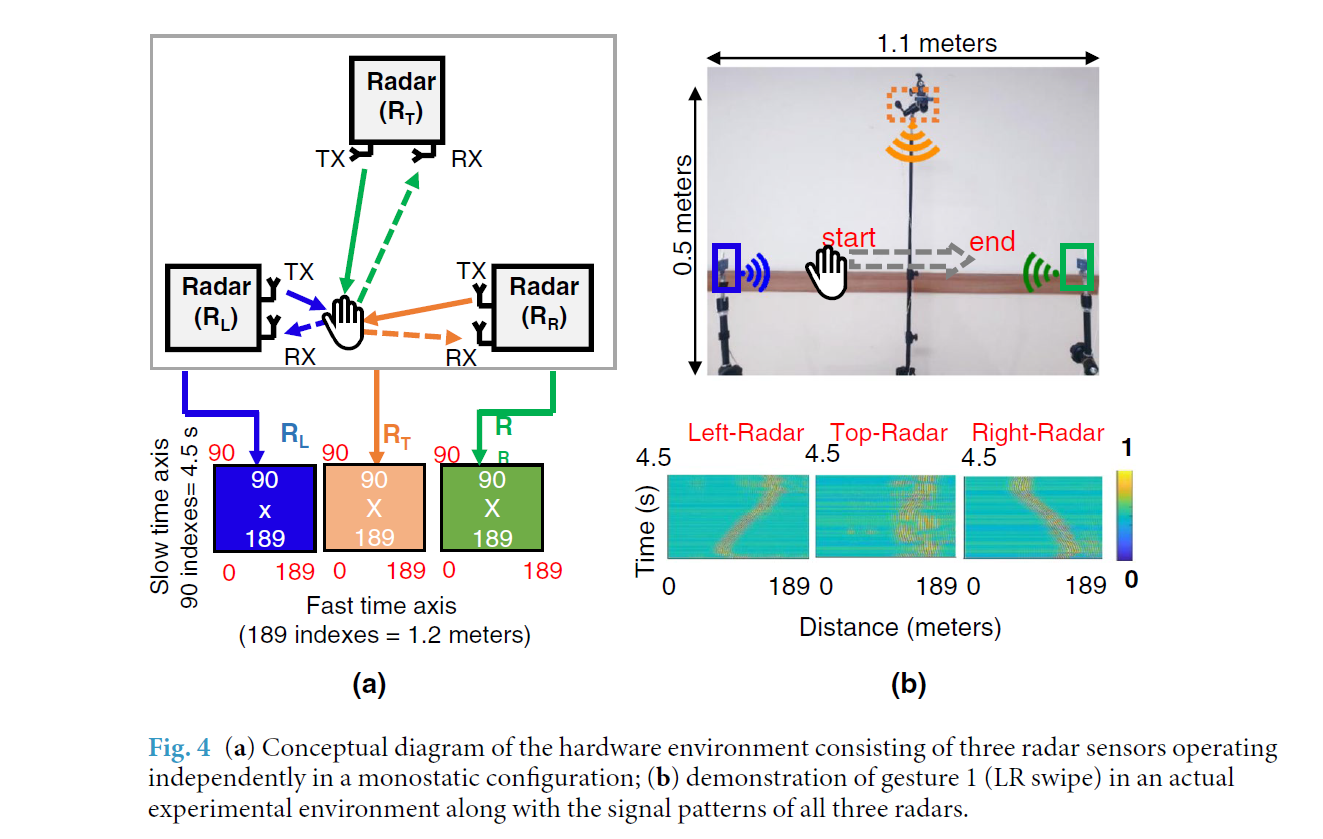

<h3 style="text-align: left;"><b>1.1 Загрузка данных:</b></h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from numpy import genfromtxt
'''
zest(x, y, z) - конвертирует CSV экземпляр записаного сигнала в 2D numpy матрицу.

person - всего 8 добровольцев приняли участие в записи данных для датасета.

nomer - каждый доброволец записал по 12 разных жестов. Для каждого жеста каждый доброволец записал по 100 экземпляров.

clean -  (True - очищенные от шумов данные / False - данные полные шумов).
'''
# Общий путь к датасету.
path = "C:\\Users\\STEPANJUK\\Desktop\\Deep Learning - Natural Language Processing\\UWB-Gestures-classification-with-CNN-main\\CSV_DataSet_Gestures\\"

def zest(path, # Общий путь к датасету.
         person, # Номер добровольца, который записывал данные (1-8).
         nomer, # Номер жеста для загрузки(1-12).
         clean, # Вид данных (True - очищенные от шумов данные / False - данные полные шумов).
         left, # Разрешение на загрузку данных с левого радара.
         center, # Разрешение на загрузку данных с центрального радара.
         right): # Разрешение на загрузку данных с правого радара.

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1:
        beta = "Removed"
    else:
        beta = "Removed_"

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    gamma = "Data_HV0"  
    if person == 3:
        gamma = "Data_HV_0"
    if person == 6:
        gamma = "HC0"   

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1 or person == 6:
        alpha = "HV_0"
    else:
        alpha = "HV0"

    # Список для данных от одного добровольца с левого радара.
    data_LeftRadar = []
    # Список для данных от одного добровольца с правого радара.
    data_RightRadar = []
    # Список для данных от одного добровольца с центрального радара.
    data_CenterRadar = []

    # Загрузить очищенные от шумов данные:
    if clean:
        # Формируем полный путь к данным от указаного добровольца с левого радара.
        path_LeftRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_ClutterRemoved_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с правого радара.
        path_RightRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_ClutterRemoved_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с центрального радара.
        path_CenterRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_ClutterRemoved_100samples.csv"
        
        # Загружаем данные с тех радаров, которые получили разрешение.
        if left:
            data_LeftRadar = genfromtxt(path_LeftRadar_clean, delimiter=',')
        if right:
            data_RightRadar = genfromtxt(path_RightRadar_clean, delimiter=',')
        if center:
            data_CenterRadar = genfromtxt(path_CenterRadar_clean, delimiter=',')

    # Загрузить данные полные шумов:
    else:
        # Формируем полный путь к данным от указаного добровольца с левого радара.
        path_LeftRadar_raw = path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_Raw_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с правого радара.
        path_RightRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_Raw_100samples.csv"
        # Формируем полный путь к данным от указаного добровольца с центрального радара.
        path_CenterRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_Raw_100samples.csv"

        # Загружаем данные с тех радаров, которые получили разрешение.
        if left:
            data_LeftRadar = genfromtxt(path_LeftRadar_raw, delimiter=',')
        if right:
            data_RightRadar = genfromtxt(path_RightRadar_raw, delimiter=',')
        if center:
            data_CenterRadar = genfromtxt(path_CenterRadar_raw, delimiter=',')

    

    return data_LeftRadar, data_RightRadar, data_CenterRadar

In [3]:
'''
Функия обьеденяет жесты от разных людей в общий массив, то есть можно обьеденить все жесты от всех людей
по категориям, по 12 массивов на каждый ракурс.
'''
def zest_upload(path, # Общий путь к датасету.
                nomer, # Номер жеста для загрузки(1-12).
                clean, # Вид данных (True - очищенные от шумов данные / False - данные полные шумов).
                left, # Разрешение на загрузку данных с левого радара.
                center, # Разрешение на загрузку данных с центрального радара.
                right): # Разрешение на загрузку данных с правого радара.
    # Список для всех данных с левого радара.
    LeftRadar_all = []
    # Список для всех данных с правого радара.
    RightRadar_all = []
    # Список для всех данных с центрального радара.
    CenterRadar_all = []

    # Пройти через данные от всех 8 добровольцев.
    for person in range(1,9):
        # Numpy матрицы со всеми данными (жестами) от одного добровольца с трёх радаров.
        LeftRadar_person, RightRadar_person, CenterRadar_person = zest(path, person, nomer, clean, left, center, right)
    
        # Меняем форму матриц с данными, которые получили разрешение на загрузку.
        if left:
            LeftRadar_person = LeftRadar_person.reshape(-1, 90, 189)
        if right:
            RightRadar_person = RightRadar_person.reshape(-1, 90, 189)
        if center:
            CenterRadar_person = CenterRadar_person.reshape(-1, 90, 189)

        # Добавляем матрицы со всеми данными (жестами) от одного добровольца к спискам с данными от всех добровольцев.
        LeftRadar_all.append(LeftRadar_person)
        RightRadar_all.append(RightRadar_person)
        CenterRadar_all.append(CenterRadar_person)


    return np.vstack(LeftRadar_all), np.vstack(RightRadar_all), np.vstack(CenterRadar_all)

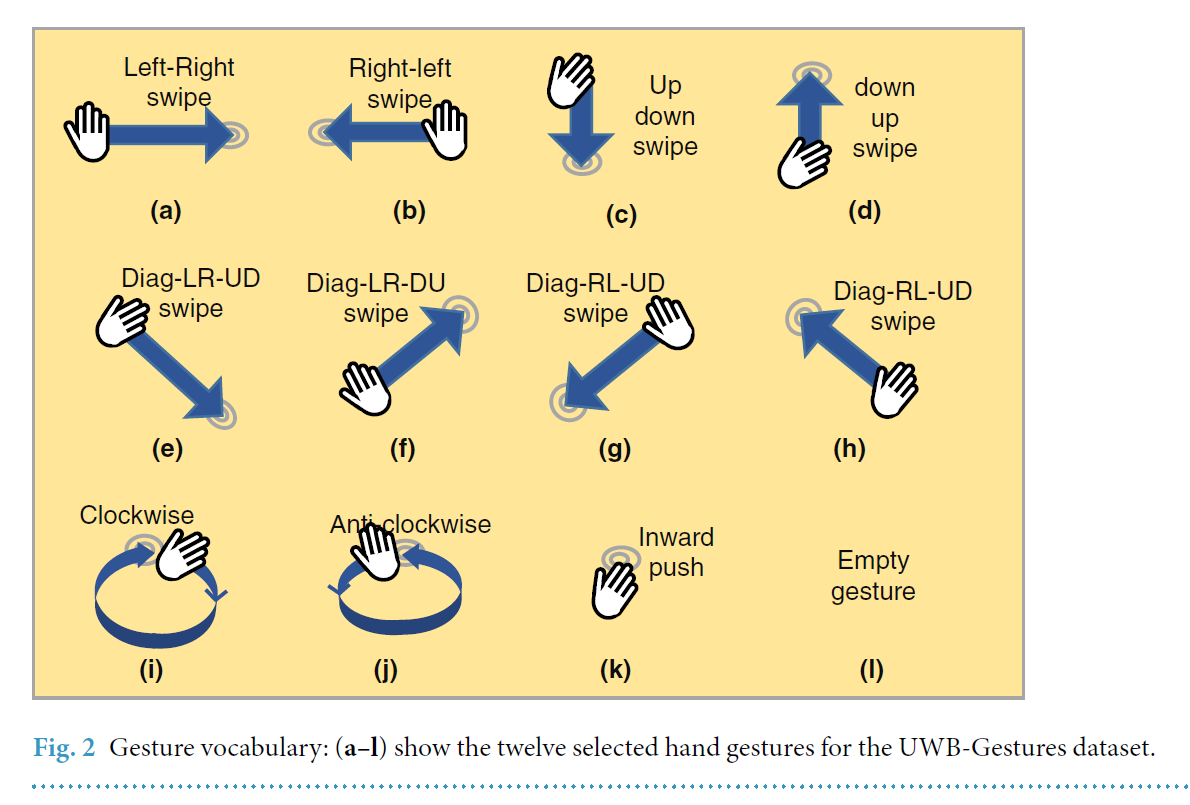

**Left-Right swipe:** ZEST_1_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Diag-RL-UD swipe:** ZEST_7_LeftRadar_clean

**Right-Left swipe:** ZEST_2_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Diag-RL-DU swipe:** ZEST_8_LeftRadar_clean

**Up-Down swipe:**    ZEST_3_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Clockwise:**        ZEST_9_LeftRadar_clean

**Down-Up swipe:**    ZEST_4_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Anti-clockwise:**   ZEST_10_LeftRadar_clean

**Diag-LR-UD swipe:** ZEST_5_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Inward push:**      ZEST_11_LeftRadar_clean

**Diag-LR-DU swipe:** ZEST_6_LeftRadar_clean    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    **Empty:**            ZEST_12_LeftRadar_clean

In [4]:
'''
Загружаем все жесты очищенные от шумов от всех добровольцев.

zest_upload(path, # Общий путь к датасету.
            nomer, # Номер жеста для загрузки(1-12).
            clean, # Вид данных (True - очищенные от шумов данные / False - данные полные шумов).
            left, # Разрешение на загрузку данных с левого радара.
            center, # Разрешение на загрузку данных с центрального радара.
            right): # Разрешение на загрузку данных с правого радара.
'''

ZEST_1_LeftRadar_clean, _, _ = zest_upload(path, 1, True, True, False, False)

ZEST_2_LeftRadar_clean, _, _ = zest_upload(path, 2, True, True, False, False)

ZEST_3_LeftRadar_clean, _, _ = zest_upload(path, 3, True, True, False, False)

ZEST_4_LeftRadar_clean, _, _ = zest_upload(path, 4, True, True, False, False)

ZEST_5_LeftRadar_clean, _, _ = zest_upload(path, 5, True, True, False, False)

ZEST_6_LeftRadar_clean, _, _ = zest_upload(path, 6, True, True, False, False)

ZEST_7_LeftRadar_clean, _, _ = zest_upload(path, 7, True, True, False, False)

ZEST_8_LeftRadar_clean, _, _ = zest_upload(path, 8, True, True, False, False)

ZEST_9_LeftRadar_clean, _, _ = zest_upload(path, 9, True, True, False, False)

ZEST_10_LeftRadar_clean, _, _ = zest_upload(path, 10, True, True, False, False)

ZEST_11_LeftRadar_clean, _, _ = zest_upload(path, 11, True, True, False, False)

ZEST_12_LeftRadar_clean, _, _ = zest_upload(path, 12, True, True, False, False)

In [5]:
print(ZEST_1_LeftRadar_clean.shape)

(800, 90, 189)


<h3 style="text-align: left;"><b>1.2 Отображение данных:</b></h3>

In [6]:
from matplotlib import pyplot as plt

# Функция для отрбражения снимка с радара.
def imshow(Radar, el, title="Radar"):
    """Imshow для тензоров"""
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 12), sharey=True, sharex=True)
    
    ax.imshow(Radar[el])
    if title is not None:
        ax.set_title(title)
    ax.grid(False)

Radar (clean): gesture


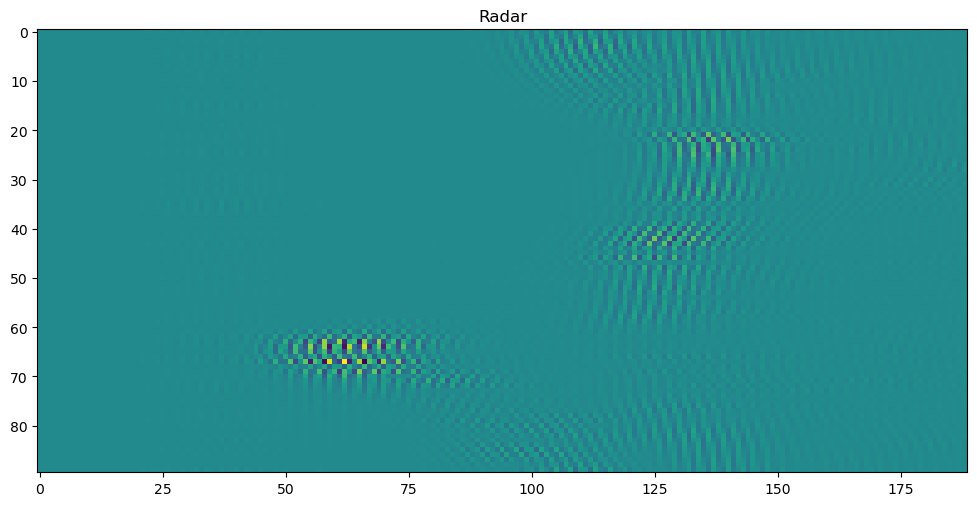

In [7]:
print("Radar (clean): gesture")
imshow(ZEST_9_LeftRadar_clean, 111)

<h3 style="text-align: left;"><b>2.1 Подготовка датасета:</b></h3>

Буду использовать только очищенные данные с левого радара.

In [8]:
# Функция принимает на вход список жестов, а возвращает список лейблов для жестов.
def prepare_Labels(Radar):
    # Создадим список с количеством снимков для каждого жеста.
    RadarShape = []
    for radar in Radar:
        RadarShape.append(radar.shape[0])
    
    # Посчитаем общее кол-во снимков всех жестов.
    RadarLenght = 0
    for i in RadarShape:
        RadarLenght += i
    
    # Матрица для записи лейблов так, чтобы каждый лейбл соответствовал по счёту своему снимку в списке жестов.
    RadarLabels = np.zeros((RadarLenght,12))

    # Индекс снимка с которого начинается новый жест в общем списке жестов.
    start_el = 0
    # Индекс последнего снимка текущего жеста в общем списке жестов.
    stop_el = 0
    # Индекс для лейбла текущего жеста.
    label = 0

    # Пройдём по каждому жесту получив кол-во снимков для него в общем списке жестов.
    for sh in range(len(RadarShape)):
        # Вектор для бинарного лейбла.
        labelArray = np.zeros(12)

        # Определим индекс последнего снимка текущего жеста
        if(sh == 0):
            stop_el += RadarShape[sh]
        else:
            # Определим индекс с которого начинается новый жест в общем списке жестов.
            start_el += RadarShape[sh-1]
            # Определим индекс последнего снимка текущего жеста
            stop_el += RadarShape[sh]
        #print(start_el, "|||", stop_el)
        # Поставим единичку в нужном месте у бинарного лейбла.
        labelArray[label] = 1
        # В списке с лейблами в нужном месте укажем бинарные лейблы для текущего жеста.
        RadarLabels[start_el:stop_el] = labelArray
        # # Индекс для лейбла текущего жеста увеличим на один.
        label += 1

    return RadarLabels 

In [9]:
# Соберу все " изображения " в один список.
LeftRadar = [
    ZEST_1_LeftRadar_clean,
    ZEST_2_LeftRadar_clean,
    ZEST_3_LeftRadar_clean,
    ZEST_4_LeftRadar_clean,
    ZEST_5_LeftRadar_clean,
    ZEST_6_LeftRadar_clean,
    ZEST_7_LeftRadar_clean,
    ZEST_8_LeftRadar_clean,
    ZEST_9_LeftRadar_clean,
    ZEST_10_LeftRadar_clean,
    ZEST_11_LeftRadar_clean,
    ZEST_12_LeftRadar_clean ]


'''
Labels   start_idx ||| stop_idx
  0              0 ||| (800 - 1)
  1            800 ||| (1600 - 1)
  2           1600 ||| (2400 - 1)
  3           2400 ||| (3193 - 1)
  4           3193 ||| (3993 - 1)
  5           3993 ||| (4793 - 1)
  6           4793 ||| (5593 - 1)
  7           5593 ||| (6393 - 1)
  8           6393 ||| (7193 - 1)
  9           7193 ||| (7993 - 1)
  10          7993 ||| (8793 - 1)
  11          8793 ||| (9593 - 1)
'''
# Получим матрицу бинарных лейблов.
LeftRadarLabels = prepare_Labels(LeftRadar)

# Из общего списка снимков жестов сделаем матрицу.
LeftRadar = np.vstack(LeftRadar)

Тип данных у бинарного лейбла: float64
Бинарный лейбл: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Форма тензора с лейблами: (9593, 12)
Форма тензора со всеми снимками с радара: (9593, 90, 189)


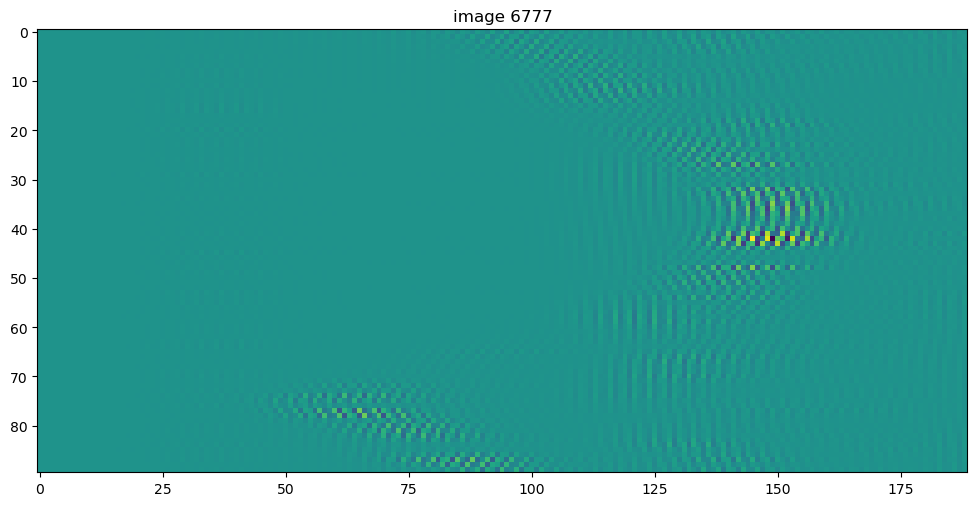

In [10]:
print(f'Тип данных у бинарного лейбла: {LeftRadarLabels[8888].dtype}')
print(f'Бинарный лейбл: {LeftRadarLabels[8888]}')
print(f'Форма тензора с лейблами: {LeftRadarLabels.shape}')
print(f'Форма тензора со всеми снимками с радара: {LeftRadar.shape}')
imshow(LeftRadar,6777, 'image 6777')

<h3 style="text-align: left;"><b>2.2 Группировка изображений по принципу train and test:</b></h3>


In [11]:
from sklearn.model_selection import train_test_split

'''
Разделим фотографии для обучающего датасета на две группы, тренировочные и тестовые.
Radar_train - 7674
Radar_test - 1919
Labels_train - 7674
Labels_test - 1919
'''
Radar_train, Radar_test, Labels_train, Labels_test = train_test_split(LeftRadar, LeftRadarLabels, test_size=0.2)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


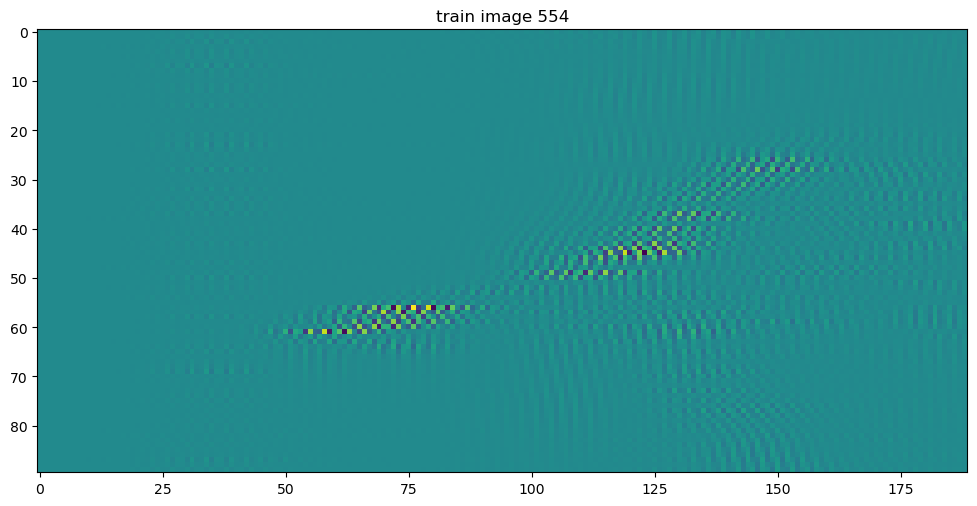

In [12]:
print(Labels_train[777])
imshow(Radar_train, 777, 'train image 554')

<h3 style="text-align: left;"><b>2.3 Подготовка даталоадеров:</b></h3>


In [13]:
from torch.utils.data import DataLoader

train_loader = DataLoader(list(zip(Radar_train.reshape(-1, 1, 90, 189), Labels_train)), batch_size=64, shuffle=True)
test_loader = DataLoader(list(zip(Radar_test.reshape(-1, 1, 90, 189), Labels_test)), batch_size=64, shuffle=True)

for images, labels in train_loader:
    print(f'Форма бача с изображениями: {images.shape}')  # Должно быть что-то вроде (batch_size, 1, 90, 189) для одноканальных изображений
    print(f'Форма бача с лейблами: {labels.shape}')
    break
    

Форма бача с изображениями: torch.Size([64, 1, 90, 189])
Форма бача с лейблами: torch.Size([64, 12])


# Шаг 3 (Создаём функции train, evaluate и history_plot):

In [14]:
import torch
import torch.nn as nn
from typing import List
from tqdm.auto import tqdm

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

# работаем на видеокарте
device = torch.device("cuda")
print('DEVICE: ', device)

CUDA is available!  Training on GPU ...
DEVICE:  cuda


In [23]:
def evaluate(model, criterion, eval_dataloader) -> float:
    """
    Calculate accuracy on validation dataloader.
    """
    # Переводим модель в режим для оценки предсказаний
    model.eval()
    val_loss = 0

    # Без расчёта производных.
    with torch.no_grad():
        # Пройти по бачам валидационного даталоадера.
        for batch in tqdm(eval_dataloader, desc=f'Validation epoch'):
            # Распакуем батч, получим данные из него.
            images, labels = batch
            # Передадим данные в модель, посчитаем логиты предсказаний для всех классов.
            logits, attention = model(images.reshape(-1, 90, 189).to(torch.float32).to(device))
            #binary_logits = logits.argmax(dim=-1).to(device)

            # Индексы предсказаных классов (от 0 до 11).
            idx = logits.argmax(dim=1)
            # Создаем нулевой тензор той же формы, что и logits.
            binary_logits = torch.zeros_like(logits, dtype=torch.int64).to(device)
            # По индексу на место предсказаного класса ставив '1' в нулевой тензор.
            for i, bl in enumerate(binary_logits):
                bl[idx[i]] = 1

            # Расчитать функцию потерь "CrossEntropyLoss"
            vloss = criterion(logits, labels.to(device))

            # Сумма значений функции потерь для валидационных данных.
            val_loss += vloss.item() 
        
        # Сохранить значения функции потерь "CrossEntropyLoss"  для текущей эпохи.
        history_valid_loss = (val_loss / len(eval_dataloader))
        # Сохранить значения метрики accuracy для текущей эпохи.
        history_valid_acc = (binary_logits == labels.to(device)).float().mean().item()

        return history_valid_loss, history_valid_acc

In [24]:
def train(
        model: nn.Module,         # Модель
        criterion: nn.Module,     # Функция потерь
        optimizer: torch.optim.Optimizer, # оптимизатор 
        num_epochs: int,          # Кол-во эпох
        train_loader: DataLoader, # Тренировочные данные
        val_loader: DataLoader,   # Валидационные данные
        device=device, # устройство на котором производятся рассчёты
        scheduler = torch.optim.lr_scheduler.LambdaLR, # планировщик уменьшения коэфицента LR
        scheduler_step = 5, # Шаг уменьшения коэфицента LR по эпохам.
        ) -> [List[float], List[float]]:

    # Список CrossEntropyLoss для всех эпох.
    history_loss = {'train':[], 'valid':[]}
    # Список метрики accuracy для всех эпох.
    history_acc = {'train':[], 'valid':[]}

    # Пройти по эпохам.
    for epoch in range(num_epochs):
        # Переводим модель в режим для обучения
        model.train()
        # Сумма значений функции потерь для тренировочных данных.
        tr_loss = 0

        # Пройти по бачам тренировочного даталоадера.
        for i, batch in enumerate(tqdm(train_loader, desc=f'Training epoch {epoch}')):
            # Обнулим производные.
            optimizer.zero_grad()

            # Распакуем батч, получим данные из него.
            images, labels = batch
            
            # Передадим данные в модель, посчитаем логиты предсказаний для всех классов.
            logits, attention = model(images.reshape(-1, 90, 189).to(torch.float32).to(device))
            # Индексы предсказаных классов (от 0 до 11).
            idx = logits.argmax(dim=1)
            # Создаем нулевой тензор той же формы, что и logits.
            binary_logits = torch.zeros_like(logits, dtype=torch.int64).to(device)
            # По индексу на место предсказаного класса ставив '1' в нулевой тензор.
            for i, bl in enumerate(binary_logits):
                bl[idx[i]] = 1

            # Расчитать функцию потерь "CrossEntropyLoss"
            loss = criterion(logits, labels.to(device))

            # Сумма значений функции потерь для тренировочных данных.
            tr_loss += loss.item()
            
            # Расчитать производные.
            loss.backward()
            # Сделать шаг обучения.
            optimizer.step()
            
        # Уменьшение коэфицента LR.
        if (epoch+1) % scheduler_step == 0 and scheduler is not None:
            print(f'EPOCH {epoch+1} Scheduler LR', optimizer.param_groups[0]["lr"])
            scheduler.step()

        # Сохранить значения функции потерь "CrossEntropyLoss"  для текущей эпохи.
        history_loss['train'].append(tr_loss / len(train_loader))
        # Сохранить значения метрики accuracy для текущей эпохи.
        history_acc['train'].append((binary_logits == labels.to(device)).float().mean().item())

        # Переводим модель в режим для оценки предсказаний
        model.eval()
        # Проводим оценку модели.
        history_valid_loss, history_valid_acc = evaluate(model, criterion, val_loader)

        # Сохранить значения функции потерь "CrossEntropyLoss"  для текущей эпохи.
        history_loss['valid'].append(history_valid_loss)
        # Сохранить значения метрики accuracy для текущей эпохи.
        history_acc['valid'].append(history_valid_acc)

        print('EPOCH {}:'.format(epoch + 1), "\n*TRAIN loss:", tr_loss / len(train_loader),
                  "*TRAIN Accuracy:", (binary_logits == labels.to(device)).float().mean().item(),
                  "\n*EVAL loss:", history_valid_loss,
                  "*EVAL Accuracy:", history_valid_acc,
                  '\n','-'*100)
    return history_loss, history_acc

### Функция для отображения графика обучения.

In [17]:
def history_plot(history_loss, history_acc, name):
    print(f"Лучшая accuracy на валидации: {(max(history_acc['valid']) * 100):.2f}")
    fig, ax = plt.subplots(1,2, figsize=(15, 5))

    ax[0].plot(history_loss['train'], label="train_loss",color='orange')
    ax[0].plot(history_loss['valid'], label="val_loss",color='green')
    ax[0].legend(['train', 'valid'])
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel("loss")
    plt.grid()

    ax[1].plot(history_acc['train'], label="train_acc",color='orange')
    ax[1].plot(history_acc['valid'], label="val_acc",color='green')
    ax[1].legend(['train', 'valid'])
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel("accuracy")
    plt.grid()

    fig.suptitle(f'History of "{name}" model')
    plt.show()

# Шаг 4 (Модель):

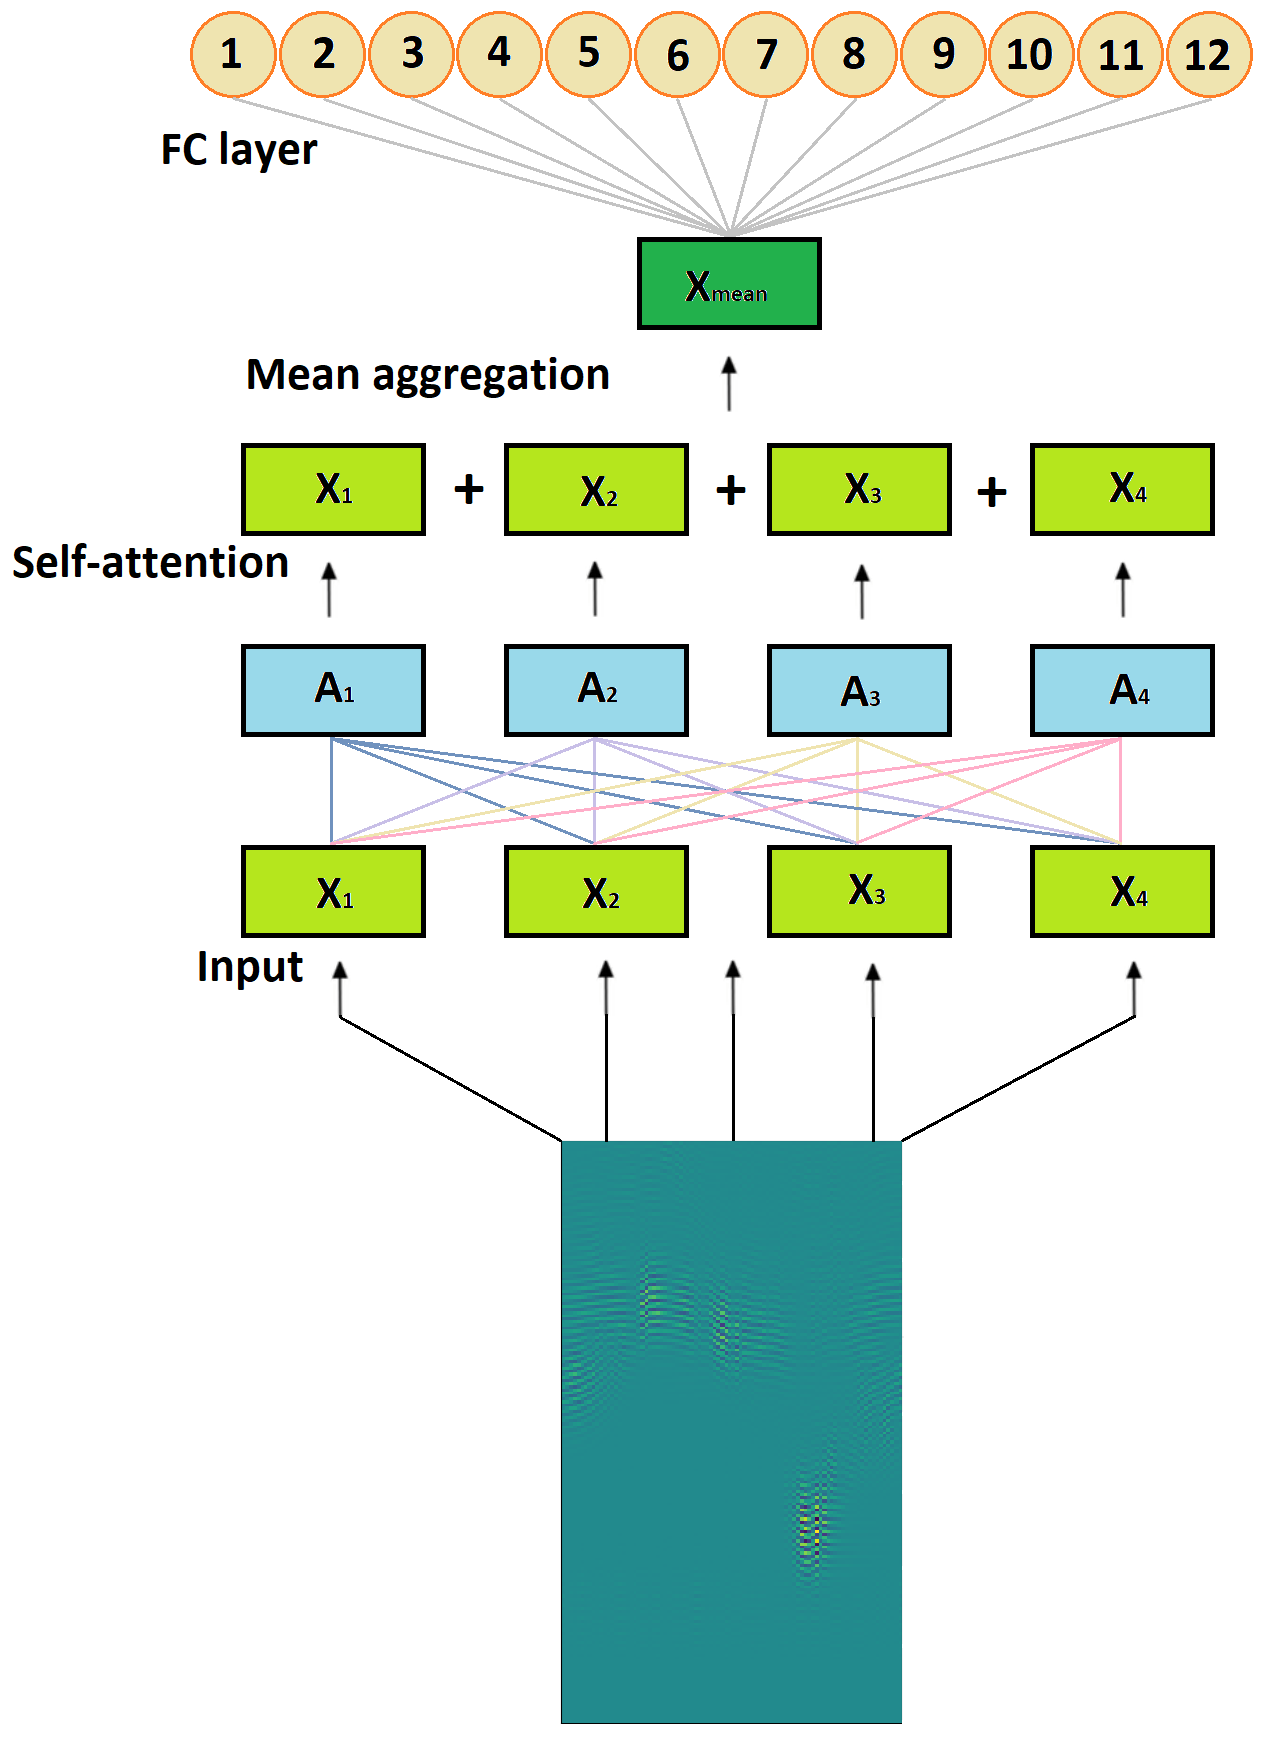

$$ \text{Attention}(Q, K, V) = \text{Softmax} \big( \frac{QK^T}{\sqrt{d_k}} \big)V $$

Вектора ***Queries***, ***Keys*** и ***Values*** это вектора входной последовательности пропущенные через три разных полносвязных слоя чтобы выделить из них разную информацию.

***Queries*** - запрос


Вектор ***Q*** - вектор входной последовательности пропущенный через полносвязный слой ***Queries*** от лица которого идёт обращение ко всем векторам входной последовательности пропущеным через полносвязный слой **Keys**,  чтобы получить информацию о том как вектор ***Q*** связан со всеми векторами входной последовательности.


***Keys*** - ключ

Вектор ***K*** - вектор входной последовательности пропущенный через полносвязный слой ***Keys*** к которому обращается вектор ***Q*** чтобы выявить какую информацию вектор ***K***  может отдать о том как они связаны.


**$ {QK^T} $** - скалярное произведение вектора ***Q*** на вектор ***K***, числовое значение (коэфицент) отражающие как сильно связаны между собой вектор ***Q*** с вектором ***K***.


***Values*** - значения

Вектор ***V*** - вектор входной последовательности пропущенный через полносвязный слой ***Values*** чтобы выделить из него полезную информацию. В дальнейшем каждый вектор ***V*** будет умножен на соответствующий коэфицент **$ {QK^T} $**, после чего все отмаштабированные вектора ***V*** будут сложены между собой чтобы сформировать новый вектор содержащий обобщённую информацию обо всех векторах. Данный вектор встанет на место вектора ***Q***.

# Слой MultiHead QKV Attention

In [18]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, 
                    hid_dim, # Размерность входного вектора.
                    n_heads, # Кол-во голов attention.
                    dropout, # Коэфицент для слоя dropout.
                    device): # устройство на котором производятся рассчёты.
        super().__init__()
        # Проверка на то, что размер входного вектора делится на кол-во голов attention без остатка.
        assert hid_dim % n_heads == 0
        
        # Размерность входного вектора.
        self.hid_dim = hid_dim
        # Кол-во голов attention.
        self.n_heads = n_heads
        # Размерность каждой головы attention.
        self.head_dim = hid_dim // n_heads

        # Линнейные слои, которые из входной последовательности векторов должны выделить:
        ## Векторы *Q* - запросы
        ### информацию из каждого вектора от лица которого идёт обращение ко всем векторам входной последовательности (включая его самого),
        ### которая поможет выявить как сильно они связаны между собой.
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        ## Векторы *К* - ключи
        ### информацию из каждого вектора входной последовательности к которым идёт обращение,
        ### которая поможет выявить как сильно они связаны между собой.
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        
        ## Векторы *V* - значения
        ### полезную информацию из каждого вектора, которая будет полезна для классификации.
        self.fc_v = nn.Linear(hid_dim, hid_dim)


        # Линнейный слой через который пропускаем вектора агрегированые при 
        # помощи 'MultiHead QKV Attention' чтобы получить выходные вектора.
        self.fc_o = nn.Linear(hid_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)
        
        # Число для масштабирования скалярного произведения векторов *Q* и *K*.
        # Квадратный корень из размерности головы attention.
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

    def forward(self, query, key, value, mask = None):
        # Размер бача.
        batch_size = query.shape[0]

        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]

        # Выделить из входной последовательности векторов информацию для запросов.
        Q = self.fc_q(query) #Q = [batch size, query len, hid dim]
        # Выделить из входной последовательности векторов информацию для ключей к запросам.
        K = self.fc_k(key) #K = [batch size, key len, hid dim]
        # Выделить из входной последовательности векторов информацию, которая будет полезна для классификации.
        V = self.fc_v(value) #V = [batch size, value len, hid dim]

        # Разбить вектора *Q* запросов, *К* ключей, *V* значений на вектора для разных голов.
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3) #Q = [batch size, n heads, query len, head dim]
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3) #K = [batch size, n heads, key len, head dim]
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3) #V = [batch size, n heads, value len, head dim]

        # Посчитать масштабированное скалярное произведение векторов *Q* и *K*.
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale #energy = [batch size, n heads, query len, key len]

        if mask is not None:
            mask = mask[:, None, None, :]
            energy = energy.masked_fill(mask == 0, -1e10)

        # Получить матрицы attention для входных последовательностей векторов.
        attention = torch.softmax(energy, dim = -1) #attention = [batch size, n heads, query len, key len]

        # Получить вектора агрегированые при помощи 'MultiHead QKV Attention' из входной последовательности векторов.
        x = torch.matmul(self.dropout(attention), V) #x = [batch size, n heads, query len, head dim]

        # Обьеденить выходы из разных голов attention.
        x = x.permute(0, 2, 1, 3).contiguous() #x = [batch size, query len, n heads, head dim]
        x = x.view(batch_size, -1, self.hid_dim) #x = [batch size, query len, hid dim]
        
        # Получить выходные вектора агрегированые при помощи 'MultiHead QKV Attention' и пропущенные через полносвязный слой.
        x = self.fc_o(x) #x = [batch size, query len, hid dim]

        return x, attention

# Однослойный трансформер

In [19]:
class SelfAttentionBasedClassifier(nn.Module):
  def __init__(self, 
               hid_dim, # входная размерность.
               cnt_class=12, # Кол-во классов для предсказания.
               device=device, # устройство на котором производятся рассчёты
               n_heads=1): # Кол-во голов attention.
    super().__init__()
    # входная размерность.
    self.hid_dim = hid_dim
    # устройство на котором производятся рассчёты.
    self.device = device
    # Кол-во классов для предсказания.
    self.cnt_class = cnt_class
    # Слой Multi Head Attention.
    self.attn = MultiHeadAttentionLayer(hid_dim=self.hid_dim, n_heads=n_heads, dropout=0, device=self.device)
    # Предсказывающий линейный слой.
    self.classifier_head = nn.Linear(self.hid_dim, self.cnt_class)

  def forward(self, x, mask = None):
    # Передаём на вход Multi Head Attention слоя входную последовательность векторов.
    # На выходе получим вектора агрегированые при помощи 'MultiHead QKV Attention' и матрицы attention для входных последовательностей векторов.
    x, attention = self.attn(x, x, x, mask=mask)

    # Агрегируем вектора полученнык на выходе 'MultiHead QKV Attention' по среднему значению.
    x = x.mean(dim=1)

    # Получим предсказания из агрегированого по среднему значению вектора.
    x = self.classifier_head(x)

    # Вернём предсказания и матрицу attention.
    return x, attention

## Одна голова attention

### Создадим экзепмляр модели.

In [20]:
model_one_head_Attention_singlelayer = SelfAttentionBasedClassifier(
                                                hid_dim=189, # входная размерность.
                                                cnt_class=12, # Кол-во классов для предсказания.
                                                device=device, # устройство на котором производятся рассчёты
                                                n_heads=1).to(device) # Кол-во голов attention. (Делители 189: 1, 3, 7, 9, 21, 27, 63, 189.)

# Функция потерь "CrossEntropyLoss".
criterion_one_head_Attention_singlelayer = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_one_head_Attention_singlelayer = torch.optim.Adam(model_one_head_Attention_singlelayer.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_one_head_Attention_singlelayer = torch.optim.lr_scheduler.LambdaLR(optimizer_one_head_Attention_singlelayer, lr_lambda=lambda_scheduler)

### Обучим модель.

In [25]:
epochs = 200

losses_one_head_Attention_singlelayer, accuracies_one_head_Attention_singlelayer = train(
                                                model = model_one_head_Attention_singlelayer, # Модель
                                                criterion = criterion_one_head_Attention_singlelayer,     # Функция потерь
                                                optimizer = optimizer_one_head_Attention_singlelayer, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_one_head_Attention_singlelayer,  # планировщик уменьшения коэфицента LR
                                                scheduler_step = 5) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.487623979327879 *TRAIN Accuracy: 0.8419539928436279 
*EVAL loss: 2.4873541071045175 *EVAL Accuracy: 0.8412697911262512 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 2.3739509356996793 *TRAIN Accuracy: 0.8563218116760254 
*EVAL loss: 2.2368758181294814 *EVAL Accuracy: 0.8492063283920288 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 2.1819688999219946 *TRAIN Accuracy: 0.8620689511299133 
*EVAL loss: 2.1492485223883433 *EVAL Accuracy: 0.8650793433189392 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 2.116677620488385 *TRAIN Accuracy: 0.8649425506591797 
*EVAL loss: 2.0766297278973975 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 2.061843763982725 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 2.055069915065778 *EVAL Accuracy: 0.873015820980072 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 2.0339877184951365 *TRAIN Accuracy: 0.8735632300376892 
*EVAL loss: 2.032089195177426 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 2.0167277716168845 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.9923626863249597 *EVAL Accuracy: 0.8624338507652283 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 1.9988477007961438 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 2.005307784882526 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 1.9648507548297998 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.9399009593127439 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 1.9435296426840334 *TRAIN Accuracy: 0.8620689511299133 
*EVAL loss: 1.9362155080238734 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 1.9323575413535121 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.9204327298001305 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 1.9154643846049537 *TRAIN Accuracy: 0.8735632300376892 
*EVAL loss: 1.8929566173713643 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 1.9008334749736377 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.8964954306016288 *EVAL Accuracy: 0.8677248358726501 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 1.899419988644145 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.8772856516345373 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 1.8847154744479797 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.8730057697730869 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 1.875162377046093 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.852475425458335 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 1.8563315161951472 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.8413360036220137 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 1.8494119318916802 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.8136265427587361 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 1.8266611020715664 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.7991565439774972 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 1.8181544878316698 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.797014808172725 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 1.8058678793237701 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.7793493891541619 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 1.792941747392556 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.780805227030273 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 1.7877089006604303 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7879778156577606 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 1.7874729298671308 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7959559412149175 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 1.784487533545601 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.766990588654436 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 1.7769715049055077 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.7705610117594417 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 1.7744245957395155 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.7690581458350814 *EVAL Accuracy: 0.8703703284263611 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 1.7747158689179379 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.758626389986638 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 1.770737558002268 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7548402894519561 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 1.7679169808908937 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7567821476234475 *EVAL Accuracy: 0.8650793433189392 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 1.7631314357426098 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7617588283395593 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 1.7607016949651564 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.7543158759859763 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 1.7616078535364053 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.7572326935313631 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 1.7613074725066975 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7556566478655633 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 1.75748197269331 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7679114620318794 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 1.7566852928955954 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.743660672051038 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 1.751226187302246 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.7411358805542543 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 1.7496105864991616 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.7447655671462032 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 1.7489808262867905 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.746231847843116 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 1.7492626299671896 *TRAIN Accuracy: 0.8706896305084229 
*EVAL loss: 1.7383450579390998 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 1.750612420118348 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.7533727325782011 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 1.7464778034533037 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.7395435780668604 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 1.7433902496673281 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.7451787629915927 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 1.7392517896343533 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7363658273244138 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 1.7408137709143228 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.7365554542214905 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 1.7392234866208254 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.7333217615869225 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 1.737504034491426 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7316970645869445 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 1.7354786944873906 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.7272648736723972 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 1.7339872703629564 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.7356524871866663 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 1.73315262901868 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.727521089462813 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 50:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 51: 
*TRAIN loss: 1.728277328938409 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7295182344178222 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 51:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 52: 
*TRAIN loss: 1.7280429485421318 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.7215588550434522 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 52:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 53: 
*TRAIN loss: 1.725461472841347 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7356062026573151 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 53:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 54: 
*TRAIN loss: 1.7255680417272343 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.7266814300214528 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 54:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 55 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 55: 
*TRAIN loss: 1.7217631892657588 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.724548608853803 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 55:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 56: 
*TRAIN loss: 1.7213965342924793 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7174456667850273 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 56:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 57: 
*TRAIN loss: 1.7213018168868073 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.7280782303417053 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 57:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 58: 
*TRAIN loss: 1.7183101532958576 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.7247959159650932 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 58:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 59: 
*TRAIN loss: 1.719027772656887 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.7204042877828114 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 59:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 60 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 60: 
*TRAIN loss: 1.7151698795982449 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.7179842058854133 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 60:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 61: 
*TRAIN loss: 1.7146516721944123 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.7089140133302438 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 61:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 62: 
*TRAIN loss: 1.7138256914449443 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.717625827125045 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 62:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 63: 
*TRAIN loss: 1.7145330889785257 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7096960259952143 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 63:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 64: 
*TRAIN loss: 1.7111412505286132 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.7080322693924477 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 64:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 65 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 65: 
*TRAIN loss: 1.7055122011321353 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.709819107995928 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 65:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 66: 
*TRAIN loss: 1.7046276742792996 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.7053386487801077 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 66:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 67: 
*TRAIN loss: 1.7038464263628115 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7087166113562302 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 67:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 68: 
*TRAIN loss: 1.7018188715421787 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.7083333575094117 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 68:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 69: 
*TRAIN loss: 1.701184282651398 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.7022695869836164 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 69:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 70 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 70: 
*TRAIN loss: 1.7017206889395262 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.7014615542686256 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 70:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 71: 
*TRAIN loss: 1.6991139357731138 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7045118993411392 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 71:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 72: 
*TRAIN loss: 1.6973279707825184 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.699325140013841 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 72:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 73: 
*TRAIN loss: 1.69514115306921 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.708229319459337 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 73:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 74: 
*TRAIN loss: 1.6956337712999208 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.7030930299901073 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 74:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 75 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 75: 
*TRAIN loss: 1.6947482281683415 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7160473869751243 *EVAL Accuracy: 0.873015820980072 
 ----------------------------------------------------------------------------------------------------


Training epoch 75:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 76: 
*TRAIN loss: 1.6924107453297041 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.7018011101711594 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 76:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 77: 
*TRAIN loss: 1.6935193496714065 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6966260083168467 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 77:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 78: 
*TRAIN loss: 1.6934349657056655 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.697346221674517 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 78:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 79: 
*TRAIN loss: 1.69079832831501 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.699170313774627 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 79:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 80 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 80: 
*TRAIN loss: 1.6907955675264184 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.7032169786526417 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 80:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 81: 
*TRAIN loss: 1.6891012223016668 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6976533817117365 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 81:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 82: 
*TRAIN loss: 1.687124485598988 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6964579565625233 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 82:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 83: 
*TRAIN loss: 1.687827371627333 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6950800967369188 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 83:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 84: 
*TRAIN loss: 1.6877522215883471 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6968665313872233 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 84:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 85 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 85: 
*TRAIN loss: 1.6866462402580753 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6963381555915042 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 85:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 86: 
*TRAIN loss: 1.6875415964925835 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.695621490907725 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 86:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 87: 
*TRAIN loss: 1.6865623037623256 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6958249818244762 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 87:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 88: 
*TRAIN loss: 1.6853073313609175 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.701182946889003 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 88:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 89: 
*TRAIN loss: 1.6854569209690702 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6981590654762495 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 89:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 90 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 90: 
*TRAIN loss: 1.6842027348126514 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.696242003240499 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 90:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 91: 
*TRAIN loss: 1.6825784989261205 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.690869046408546 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 91:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 92: 
*TRAIN loss: 1.684565447640728 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.693627186219001 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 92:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 93: 
*TRAIN loss: 1.6829261176072137 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6921283180218178 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 93:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 94: 
*TRAIN loss: 1.6825433513766752 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6953935017924109 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 94:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 95 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 95: 
*TRAIN loss: 1.6814005089117048 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.694170340395808 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 95:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 96: 
*TRAIN loss: 1.6821121786657764 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.6939967528731694 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 96:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 97: 
*TRAIN loss: 1.6814605746904712 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.6951845353064379 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 97:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 98: 
*TRAIN loss: 1.6807487316260825 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6936106194239064 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 98:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 99: 
*TRAIN loss: 1.6798543887960686 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6940148316335057 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 99:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 100 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 100: 
*TRAIN loss: 1.6806254616171157 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6938880826548013 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 100:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 101: 
*TRAIN loss: 1.6809394281144223 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6961603377509509 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 101:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 102: 
*TRAIN loss: 1.68087550794051 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6962187776406907 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 102:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 103: 
*TRAIN loss: 1.6802935645433459 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.692462557248188 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 103:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 104: 
*TRAIN loss: 1.6789620630671105 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.693755283923344 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 104:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 105 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 105: 
*TRAIN loss: 1.6774637697074992 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6982324244785323 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 105:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 106: 
*TRAIN loss: 1.6777907831227765 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6901053005274556 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 106:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 107: 
*TRAIN loss: 1.6781890344953616 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6945866674635408 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 107:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 108: 
*TRAIN loss: 1.6774107440042032 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.691531444482467 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 108:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 109: 
*TRAIN loss: 1.6784009556212314 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.689436722563204 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 109:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 110 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 110: 
*TRAIN loss: 1.6767020383454823 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6884274741294432 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 110:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 111: 
*TRAIN loss: 1.6776941687977451 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.690083669870803 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 111:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 112: 
*TRAIN loss: 1.6763238476326292 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6929867039265012 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 112:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 113: 
*TRAIN loss: 1.6773166177672338 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6914878973943934 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 113:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 114: 
*TRAIN loss: 1.6761804664186455 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.690895280810336 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 114:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 115 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 115: 
*TRAIN loss: 1.6768649355868563 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.688883300325678 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 115:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 116: 
*TRAIN loss: 1.6760083894392033 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.68912404806028 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 116:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 117: 
*TRAIN loss: 1.6750886585106008 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6929325067340066 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 117:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 118: 
*TRAIN loss: 1.6755577367875991 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.697321327819312 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 118:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 119: 
*TRAIN loss: 1.6773353023381428 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6893917856642324 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 119:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 120 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 120: 
*TRAIN loss: 1.674551278317966 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.691851129460685 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 120:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 121: 
*TRAIN loss: 1.6759130373111888 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6896482856506028 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 121:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 122: 
*TRAIN loss: 1.6747325301721214 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.691124297639359 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 122:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 123: 
*TRAIN loss: 1.6742789836692957 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6894984981833934 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 123:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 124: 
*TRAIN loss: 1.6756206760777865 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6889832493774704 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 124:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 125 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 125: 
*TRAIN loss: 1.6740362591052416 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6897775210134336 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 125:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 126: 
*TRAIN loss: 1.6742324713780037 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.6884751386322514 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 126:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 127: 
*TRAIN loss: 1.6731999523322203 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.68847634511876 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 127:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 128: 
*TRAIN loss: 1.6736822606640038 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6895168904895592 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 128:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 129: 
*TRAIN loss: 1.6738068231840875 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6887978622309385 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 129:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 130 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 130: 
*TRAIN loss: 1.6739179421477846 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6889621847091971 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 130:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 131: 
*TRAIN loss: 1.673333189387373 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.6894981218995226 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 131:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 132: 
*TRAIN loss: 1.6727616220052792 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.6879706186806385 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 132:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 133: 
*TRAIN loss: 1.6732412091288864 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6879361135592463 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 133:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 134: 
*TRAIN loss: 1.6726498408205057 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.68952833023283 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 134:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 135 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 135: 
*TRAIN loss: 1.6733152937470532 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.689692207182478 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 135:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 136: 
*TRAIN loss: 1.6723793318212496 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6870871154207028 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 136:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 137: 
*TRAIN loss: 1.6724528786193837 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.687280978924864 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 137:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 138: 
*TRAIN loss: 1.6719694770654203 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6889302570869829 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 138:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 139: 
*TRAIN loss: 1.6722131534717228 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6889241325849307 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 139:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 140 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 140: 
*TRAIN loss: 1.6720386670383944 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6865516642231557 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 140:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 141: 
*TRAIN loss: 1.6719035572553476 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6875805108266277 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 141:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 142: 
*TRAIN loss: 1.6717674476014073 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6879020985348987 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 142:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 143: 
*TRAIN loss: 1.6724423443688712 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.6868930647465743 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 143:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 144: 
*TRAIN loss: 1.6721015382068374 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.688736689901962 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 144:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 145 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 145: 
*TRAIN loss: 1.6715574531674904 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6886094083589775 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 145:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 146: 
*TRAIN loss: 1.6709611449401882 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6879954848939724 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 146:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 147: 
*TRAIN loss: 1.6712596489265574 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6886510590372685 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 147:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 148: 
*TRAIN loss: 1.671299535958332 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6877272097222549 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 148:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 149: 
*TRAIN loss: 1.6709279175369984 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.6861147205205416 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 149:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 150 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 150: 
*TRAIN loss: 1.6709595000696786 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6860363784755408 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 150:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 151: 
*TRAIN loss: 1.670998840711474 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6889564520225955 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 151:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 152: 
*TRAIN loss: 1.6705805381785828 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6872609060341002 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 152:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 153: 
*TRAIN loss: 1.670131328380983 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6873767325817342 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 153:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 154: 
*TRAIN loss: 1.6702347227972318 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6873849017565021 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 154:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 155 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 155: 
*TRAIN loss: 1.6704552670832782 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.688416271893074 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 155:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 156: 
*TRAIN loss: 1.6702891561809998 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6864631183791734 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 156:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 157: 
*TRAIN loss: 1.6702050202083443 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6878073589454414 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 157:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 158: 
*TRAIN loss: 1.670532461216014 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6867380780776382 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 158:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 159: 
*TRAIN loss: 1.6702204194931827 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6870403949315822 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 159:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 160 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 160: 
*TRAIN loss: 1.6702898118849487 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.68566319092819 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 160:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 161: 
*TRAIN loss: 1.6701156732710933 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.686330638303955 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 161:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 162: 
*TRAIN loss: 1.6696896597074464 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6893839514903148 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 162:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 163: 
*TRAIN loss: 1.670282366348158 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6875594811866692 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 163:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 164: 
*TRAIN loss: 1.6696156937241822 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6886451369433397 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 164:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 165 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 165: 
*TRAIN loss: 1.6699735189718778 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6871633861057154 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 165:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 166: 
*TRAIN loss: 1.6695262472710195 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.6858128601019147 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 166:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 167: 
*TRAIN loss: 1.6697938425784293 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6865686759805998 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 167:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 168: 
*TRAIN loss: 1.6691300879968793 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.686119339174559 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 168:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 169: 
*TRAIN loss: 1.6695771815542335 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6860885062944624 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 169:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 170 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 170: 
*TRAIN loss: 1.6692965000704894 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6858914436909285 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 170:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 171: 
*TRAIN loss: 1.6694562204038743 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.686133591120033 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 171:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 172: 
*TRAIN loss: 1.6691544412631993 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.687261964325595 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 172:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 173: 
*TRAIN loss: 1.6691355259891016 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6863204552283466 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 173:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 174: 
*TRAIN loss: 1.6695428287109813 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6859189729153792 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 174:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 175 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 175: 
*TRAIN loss: 1.6692365140187557 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.6857924395108854 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 175:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 176: 
*TRAIN loss: 1.6688847421049777 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6862639569394806 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 176:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 177: 
*TRAIN loss: 1.668765057493723 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6856102292278834 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 177:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 178: 
*TRAIN loss: 1.668883005992517 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.685984769360155 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 178:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 179: 
*TRAIN loss: 1.6686053871665303 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6859094857257702 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 179:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 180 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 180: 
*TRAIN loss: 1.668775044459833 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6865695112507297 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 180:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 181: 
*TRAIN loss: 1.6687560557019852 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6860619873402678 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 181:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 182: 
*TRAIN loss: 1.668545002073955 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.6876112991535173 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 182:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 183: 
*TRAIN loss: 1.6691242343128752 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.6857043405285885 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 183:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 184: 
*TRAIN loss: 1.6688387965093108 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.686922027309806 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 184:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 185 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 185: 
*TRAIN loss: 1.66834193075194 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.686732156112846 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 185:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 186: 
*TRAIN loss: 1.668356558832312 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.686445176693087 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 186:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 187: 
*TRAIN loss: 1.6687750227618683 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6859794454371468 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 187:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 188: 
*TRAIN loss: 1.6685141945122097 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.6856209351665254 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 188:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 189: 
*TRAIN loss: 1.668216588786769 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6858835781347152 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 189:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 190 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 190: 
*TRAIN loss: 1.6685114533999796 *TRAIN Accuracy: 0.8649425506591797 
*EVAL loss: 1.6861293033743456 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 190:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 191: 
*TRAIN loss: 1.6682619471868114 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.6857355059304349 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 191:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 192: 
*TRAIN loss: 1.6681239394306924 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6854455325511737 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 192:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 193: 
*TRAIN loss: 1.6684197361298552 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6853751980149108 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 193:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 194: 
*TRAIN loss: 1.6682466227956672 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6853623239825326 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 194:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 195 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 195: 
*TRAIN loss: 1.6682509149142275 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.6855017005324053 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 195:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 196: 
*TRAIN loss: 1.6680033646494377 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.68573838477877 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 196:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 197: 
*TRAIN loss: 1.667974182717401 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6870935637074773 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 197:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 198: 
*TRAIN loss: 1.6680417209055989 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6851482241845424 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 198:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 199: 
*TRAIN loss: 1.66782907388888 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6854561413355762 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 199:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 200 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 200: 
*TRAIN loss: 1.668270631577058 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6853980445070154 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


### История обучения

Лучшая accuracy на валидации: 91.80


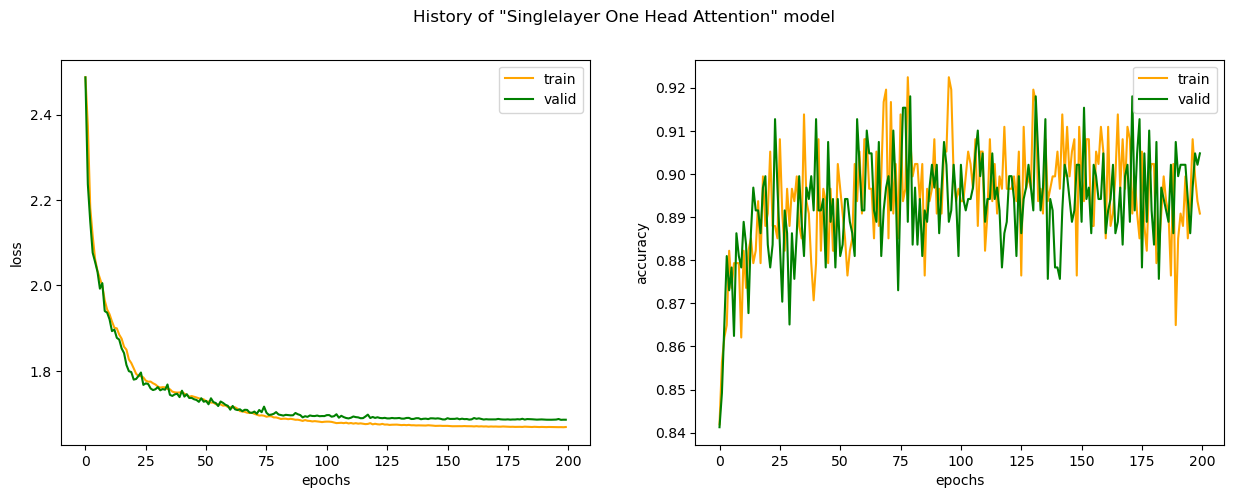

In [26]:
history_plot(losses_one_head_Attention_singlelayer, 
             accuracies_one_head_Attention_singlelayer, 
             'Singlelayer One Head Attention')

## Семь голов attention

### Создадим экзепмляр модели.

In [29]:
model_seven_head_Attention_singlelayer = SelfAttentionBasedClassifier(
                                                hid_dim=189, # входная размерность.
                                                cnt_class=12, # Кол-во классов для предсказания.
                                                device=device, # устройство на котором производятся рассчёты
                                                n_heads=7).to(device) # Кол-во голов attention. (Делители 189: 1, 3, 7, 9, 21, 27, 63, 189.)

# Функция потерь "CrossEntropyLoss".
criterion_seven_head_Attention_singlelayer = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_seven_head_Attention_singlelayer = torch.optim.Adam(model_seven_head_Attention_singlelayer.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_seven_head_Attention_singlelayer = torch.optim.lr_scheduler.LambdaLR(optimizer_seven_head_Attention_singlelayer, lr_lambda=lambda_scheduler)

### Обучим модель.

In [30]:
epochs = 200

losses_seven_head_Attention_singlelayer, accuracies_seven_head_Attention_singlelayer = train(
                                                model = model_seven_head_Attention_singlelayer, # Модель
                                                criterion = criterion_seven_head_Attention_singlelayer,     # Функция потерь
                                                optimizer = optimizer_seven_head_Attention_singlelayer, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_seven_head_Attention_singlelayer,  # планировщик уменьшения коэфицента LR
                                                scheduler_step = 5) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.4872343677791884 *TRAIN Accuracy: 0.8563218116760254 
*EVAL loss: 2.4865574427008155 *EVAL Accuracy: 0.8386242985725403 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 2.4471653802254374 *TRAIN Accuracy: 0.8505747318267822 
*EVAL loss: 2.2893051346542226 *EVAL Accuracy: 0.8597883582115173 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 2.2101956918662022 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 2.1692280443964242 *EVAL Accuracy: 0.8597883582115173 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 2.1319620963423915 *TRAIN Accuracy: 0.8620689511299133 
*EVAL loss: 2.1199970980307343 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 2.0778163567137806 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 2.055719794821093 *EVAL Accuracy: 0.8544973134994507 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 2.0443272987704924 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 2.021260005438991 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 2.0218224651184364 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 2.0077214295123786 *EVAL Accuracy: 0.8597883582115173 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 2.0063509724818456 *TRAIN Accuracy: 0.8706896305084229 
*EVAL loss: 1.9827649962649647 *EVAL Accuracy: 0.873015820980072 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 1.9760876079210354 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.9911927366601843 *EVAL Accuracy: 0.8650793433189392 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 1.9354485347718395 *TRAIN Accuracy: 0.8735632300376892 
*EVAL loss: 1.8928387211687885 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 1.8782156991959318 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.831603951264312 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 1.821143283302863 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.8133034922738738 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 1.786869642041114 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7626541373112308 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 1.768863281893482 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.7483494753810414 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 1.7537362028380437 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.7355542253258747 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 1.7510651765951581 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.7260581444874643 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 1.7398192623516084 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.714192711270183 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 1.7284830687347337 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.7141828410046103 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 1.7194320631984334 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7564462505900555 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 1.7141541099973614 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6891387668753264 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 1.703064897323878 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6878098025601773 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 1.6973090562708948 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.6842657046647116 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 1.6896140233568964 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6950573470257406 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 1.6843458604542956 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.6836987167876754 *EVAL Accuracy: 0.8783068656921387 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 1.6747552348228925 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 1.6606991707148642 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 1.672118161650533 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6640771510305645 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 1.661872079267688 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6691504312964698 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 1.651669676678663 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.6536026811584243 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 1.6474945806811896 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6492130812354164 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 1.6367004084091346 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.645366952472599 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 1.6355095420249837 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6346910380192743 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 1.630972083077286 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6374277791921916 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 1.6206997780909196 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6305813355197212 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 1.6169247520445529 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.627110019828588 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 1.610823048183177 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.6255951321921058 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 1.603573767836988 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.6081280730179681 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 1.5975897940827082 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.614282282103669 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 1.594582411209421 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.6165510104246497 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 1.5921744615087179 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.6015627573203803 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 1.5866029666105599 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.5938823776214674 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 1.584202689520861 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.5951556147028259 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 1.5759747973714404 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.604944246159306 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 1.577374893242797 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.6060378958527228 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 1.5717437931051608 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5835891035151308 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 1.5691493881798833 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.5836840243737345 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 1.563897292753622 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.584369818208517 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 1.5662574085675192 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.595154556653563 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 1.5586987356926245 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.577239308715373 *EVAL Accuracy: 0.8862433433532715 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 1.5556227380852612 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.5730689367326687 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 1.5543573494133265 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5837563183537924 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 50:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 51: 
*TRAIN loss: 1.5488332536423735 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.5770276556798797 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 51:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 52: 
*TRAIN loss: 1.5487699934158665 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.5762410227996198 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 52:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 53: 
*TRAIN loss: 1.5456888965409776 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.5705916324908642 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 53:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 54: 
*TRAIN loss: 1.543450462188274 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5648225326745602 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 54:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 55 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 55: 
*TRAIN loss: 1.5426230397370226 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5595299702551815 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 55:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 56: 
*TRAIN loss: 1.5394996687908993 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.562958157279193 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 56:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 57: 
*TRAIN loss: 1.5334127658614036 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.5639062852530299 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 57:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 58: 
*TRAIN loss: 1.5339171018381912 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.562390255594216 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 58:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 59: 
*TRAIN loss: 1.5298733317594633 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.5566047014836655 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 59:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 60 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 60: 
*TRAIN loss: 1.5291744126672995 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.5718988794557103 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 60:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 61: 
*TRAIN loss: 1.5291715183727952 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.5515523999441863 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 61:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 62: 
*TRAIN loss: 1.524312319790303 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5609505131002293 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 62:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 63: 
*TRAIN loss: 1.5250616631760454 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5538011353450534 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 63:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 64: 
*TRAIN loss: 1.522516136477795 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5462443438283857 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 64:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 65 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 65: 
*TRAIN loss: 1.518232150128538 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5498527461719613 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 65:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 66: 
*TRAIN loss: 1.5173924979972324 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.5491434434843516 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 66:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 67: 
*TRAIN loss: 1.5165402653140214 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5445146093369793 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 67:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 68: 
*TRAIN loss: 1.514681214834749 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5476081476224985 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 68:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 69: 
*TRAIN loss: 1.5143877786559363 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.545498512188924 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 69:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 70 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 70: 
*TRAIN loss: 1.5126709356172034 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.534596878763374 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 70:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 71: 
*TRAIN loss: 1.5092507078906492 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.5388622242609573 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 71:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 72: 
*TRAIN loss: 1.5084951223264602 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5367180536862102 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 72:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 73: 
*TRAIN loss: 1.50659089263353 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.532704528943507 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 73:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 74: 
*TRAIN loss: 1.5038968842263445 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.5335124168821495 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 74:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 75 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 75: 
*TRAIN loss: 1.5043208859941024 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.5354809708883081 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 75:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 76: 
*TRAIN loss: 1.5010821924275832 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.5287171771242491 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 76:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 77: 
*TRAIN loss: 1.5003980037778335 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.5315115287744745 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 77:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 78: 
*TRAIN loss: 1.4987770302950745 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.525534149873645 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 78:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 79: 
*TRAIN loss: 1.496846109255029 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.52358407356571 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 79:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 80 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 80: 
*TRAIN loss: 1.4960857800063203 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.522413453245874 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 80:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 81: 
*TRAIN loss: 1.4944762580396385 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.5290936817827145 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 81:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 82: 
*TRAIN loss: 1.4944975976702153 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.5220896180305254 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 82:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 83: 
*TRAIN loss: 1.4913173413503336 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.5230048380916654 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 83:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 84: 
*TRAIN loss: 1.4912692071518505 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5250153455459194 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 84:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 85 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 85: 
*TRAIN loss: 1.4904010855228067 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.5187670862944338 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 85:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 86: 
*TRAIN loss: 1.4881226832766072 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.524905742451287 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 86:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 87: 
*TRAIN loss: 1.486244452852236 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5207576138211347 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 87:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 88: 
*TRAIN loss: 1.4858946516993414 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.517727125605284 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 88:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 89: 
*TRAIN loss: 1.4849567207681305 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.515637126884023 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 89:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 90 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 90: 
*TRAIN loss: 1.4819878506304454 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.51477572152359 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 90:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 91: 
*TRAIN loss: 1.480648367268844 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.509770146351763 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 91:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 92: 
*TRAIN loss: 1.479893224426348 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.5120671497879452 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 92:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 93: 
*TRAIN loss: 1.4792222433605133 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.517091395385311 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 93:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 94: 
*TRAIN loss: 1.4797404527547324 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5111429239084258 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 94:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 95 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 95: 
*TRAIN loss: 1.477706268130268 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.5121819774428296 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 95:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 96: 
*TRAIN loss: 1.47696447255412 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5070388760183988 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 96:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 97: 
*TRAIN loss: 1.4743289119435252 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.5067510440173602 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 97:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 98: 
*TRAIN loss: 1.4731401872407561 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5075002553126378 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 98:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 99: 
*TRAIN loss: 1.472445611359791 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5081502849284407 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 99:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 100 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 100: 
*TRAIN loss: 1.471647310967781 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.5084386176011633 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 100:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 101: 
*TRAIN loss: 1.4708646585740681 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.5037470713995864 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 101:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 102: 
*TRAIN loss: 1.469559638547458 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.5077865475676828 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 102:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 103: 
*TRAIN loss: 1.4684126569765321 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.5016058275041049 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 103:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 104: 
*TRAIN loss: 1.4685851876085292 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.5017090442925598 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 104:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 105 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 105: 
*TRAIN loss: 1.4670820285961643 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5028518690142876 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 105:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 106: 
*TRAIN loss: 1.4653769864416826 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.5016591320469768 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 106:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 107: 
*TRAIN loss: 1.464986983210052 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.4983717715518532 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 107:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 108: 
*TRAIN loss: 1.463569164416831 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.4985397098531348 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 108:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 109: 
*TRAIN loss: 1.4637317000907026 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5025719986549462 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 109:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 110 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 110: 
*TRAIN loss: 1.462356042689527 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.4997443272181057 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 110:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 111: 
*TRAIN loss: 1.4608571971424673 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4981280517505537 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 111:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 112: 
*TRAIN loss: 1.461246670654618 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4975581109346556 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 112:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 113: 
*TRAIN loss: 1.4612202131525127 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4959734119688908 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 113:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 114: 
*TRAIN loss: 1.4586530598314191 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.4955347699302413 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 114:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 115 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 115: 
*TRAIN loss: 1.4588070998453222 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4949980529597264 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 115:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 116: 
*TRAIN loss: 1.457813747609668 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.493777638752883 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 116:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 117: 
*TRAIN loss: 1.4562549367831314 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4914263708430444 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 117:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 118: 
*TRAIN loss: 1.4561878219286986 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4904191414378711 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 118:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 119: 
*TRAIN loss: 1.455347169250829 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.4924213082148527 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 119:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 120 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 120: 
*TRAIN loss: 1.4546885225975152 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.493289286194212 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 120:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 121: 
*TRAIN loss: 1.454415307284701 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4906640631719423 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 121:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 122: 
*TRAIN loss: 1.4530847908545608 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4894041313477786 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 122:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 123: 
*TRAIN loss: 1.4527097414397359 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4948329146654435 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 123:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 124: 
*TRAIN loss: 1.4523686542401562 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4875036048577632 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 124:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 125 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 125: 
*TRAIN loss: 1.4508911451435484 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4878288116975114 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 125:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 126: 
*TRAIN loss: 1.4504896482846152 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4882450369116202 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 126:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 127: 
*TRAIN loss: 1.4492880619271167 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4910076979478057 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 127:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 128: 
*TRAIN loss: 1.4489269145426735 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4876716363813536 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 128:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 129: 
*TRAIN loss: 1.4483171578029956 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4863813489801732 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 129:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 130 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 130: 
*TRAIN loss: 1.4481486088813884 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.4861830589656801 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 130:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 131: 
*TRAIN loss: 1.4468247443225233 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4865428608318174 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 131:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 132: 
*TRAIN loss: 1.4465636521984488 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4861002271492945 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 132:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 133: 
*TRAIN loss: 1.4465568597573155 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4843649377525545 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 133:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 134: 
*TRAIN loss: 1.4452516200939132 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.4874318718027473 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 134:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 135 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 135: 
*TRAIN loss: 1.445139459847854 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4865812525509494 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 135:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 136: 
*TRAIN loss: 1.4448785061764002 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.4854447474473793 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 136:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 137: 
*TRAIN loss: 1.4439439192970183 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4819391366509762 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 137:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 138: 
*TRAIN loss: 1.4433859746704563 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4829469695931663 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 138:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 139: 
*TRAIN loss: 1.4434721659636232 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.486386503515397 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 139:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 140 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 140: 
*TRAIN loss: 1.442940915338876 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4811715836356643 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 140:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 141: 
*TRAIN loss: 1.4413927351475502 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4854029661088057 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 141:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 142: 
*TRAIN loss: 1.4415541558050755 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4832314879209128 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 142:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 143: 
*TRAIN loss: 1.4414674077896437 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.481085863652826 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 143:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 144: 
*TRAIN loss: 1.4404934388050599 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.4833946610079563 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 144:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 145 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 145: 
*TRAIN loss: 1.4409174868180703 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4790990612813817 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 145:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 146: 
*TRAIN loss: 1.4398062206241151 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4799606038179303 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 146:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 147: 
*TRAIN loss: 1.4391839869292928 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4815557342791577 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 147:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 148: 
*TRAIN loss: 1.438847605190304 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.479156847699706 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 148:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 149: 
*TRAIN loss: 1.438204660789174 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4812155783461598 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 149:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 150 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 150: 
*TRAIN loss: 1.438182535574631 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.4796971271299142 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 150:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 151: 
*TRAIN loss: 1.4374895672578771 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.477664731613601 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 151:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 152: 
*TRAIN loss: 1.4370777560097665 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4782185144246445 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 152:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 153: 
*TRAIN loss: 1.4369123147614047 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.4803359568786267 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 153:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 154: 
*TRAIN loss: 1.4365511027024849 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4773848555798752 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 154:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 155 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 155: 
*TRAIN loss: 1.436447845261618 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.4766336076727915 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 155:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 156: 
*TRAIN loss: 1.4356404199457924 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.4774018774603939 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 156:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 157: 
*TRAIN loss: 1.435399089311961 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4764703369887153 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 157:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 158: 
*TRAIN loss: 1.435218937583076 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4784905506459152 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 158:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 159: 
*TRAIN loss: 1.4347888072292743 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4763968894840958 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 159:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 160 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 160: 
*TRAIN loss: 1.4342120342418454 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4760105917741413 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 160:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 161: 
*TRAIN loss: 1.4342095045747534 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.4760003560508181 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 161:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 162: 
*TRAIN loss: 1.4341357801306172 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.474773268358417 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 162:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 163: 
*TRAIN loss: 1.4335447752257278 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.4751615595939827 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 163:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 164: 
*TRAIN loss: 1.4334074865487776 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.47442026577308 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 164:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 165 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 165: 
*TRAIN loss: 1.4330876738841174 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.4746716917153206 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 165:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 166: 
*TRAIN loss: 1.4328721236733981 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.473972446988923 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 166:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 167: 
*TRAIN loss: 1.432148571829883 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4746952265088058 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 167:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 168: 
*TRAIN loss: 1.4319945485054761 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4737560826650988 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 168:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 169: 
*TRAIN loss: 1.4317605109991856 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4733457588569083 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 169:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 170 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 170: 
*TRAIN loss: 1.4318073587643583 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4733539394180502 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 170:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 171: 
*TRAIN loss: 1.4311919952538974 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4727943045080072 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 171:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 172: 
*TRAIN loss: 1.4308081002180066 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4735467895459218 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 172:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 173: 
*TRAIN loss: 1.430538518987685 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4731350584149032 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 173:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 174: 
*TRAIN loss: 1.4304487164058557 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4726804709640473 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 174:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 175 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 175: 
*TRAIN loss: 1.430223516014512 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4721378947276313 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 175:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 176: 
*TRAIN loss: 1.429968806202362 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4720598683537995 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 176:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 177: 
*TRAIN loss: 1.4296658425021636 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.4736051832257817 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 177:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 178: 
*TRAIN loss: 1.4295803593497822 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4707033180541607 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 178:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 179: 
*TRAIN loss: 1.4291564537915527 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4712841181338296 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 179:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 180 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 180: 
*TRAIN loss: 1.4290771495608614 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4713764564455714 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 180:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 181: 
*TRAIN loss: 1.4285605464589102 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.47102020132188 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 181:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 182: 
*TRAIN loss: 1.4286723605823355 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.4716603926493954 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 182:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 183: 
*TRAIN loss: 1.428323184318828 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.4713619731975611 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 183:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 184: 
*TRAIN loss: 1.4284201384305406 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.471055519272536 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 184:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 185 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 185: 
*TRAIN loss: 1.4280697779489768 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4705614318897993 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 185:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 186: 
*TRAIN loss: 1.427777625849676 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.4715043252157656 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 186:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 187: 
*TRAIN loss: 1.427740191212637 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.4711335818059452 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 187:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 188: 
*TRAIN loss: 1.4274927614663373 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4709212780353405 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 188:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 189: 
*TRAIN loss: 1.4272804748714272 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4703864978842858 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 189:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 190 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 190: 
*TRAIN loss: 1.4271344002134712 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4699497729194397 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 190:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 191: 
*TRAIN loss: 1.426704443464695 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.4694281684525337 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 191:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 192: 
*TRAIN loss: 1.4265990218123967 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.4697770219071289 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 192:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 193: 
*TRAIN loss: 1.4264914232055168 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4690350341466252 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 193:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 194: 
*TRAIN loss: 1.4262802333707874 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4697834083178802 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 194:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 195 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 195: 
*TRAIN loss: 1.4260765893987932 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.4689818818576887 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 195:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 196: 
*TRAIN loss: 1.4261000599570157 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4692529263803626 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 196:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 197: 
*TRAIN loss: 1.4257637309971665 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4691584222607894 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 197:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 198: 
*TRAIN loss: 1.42545798176572 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.468932199490625 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 198:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 199: 
*TRAIN loss: 1.425680301270598 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.4689655992089932 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 199:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 200 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 200: 
*TRAIN loss: 1.425692077129987 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.4690202674318564 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


### История обучения

Лучшая accuracy на валидации: 93.39


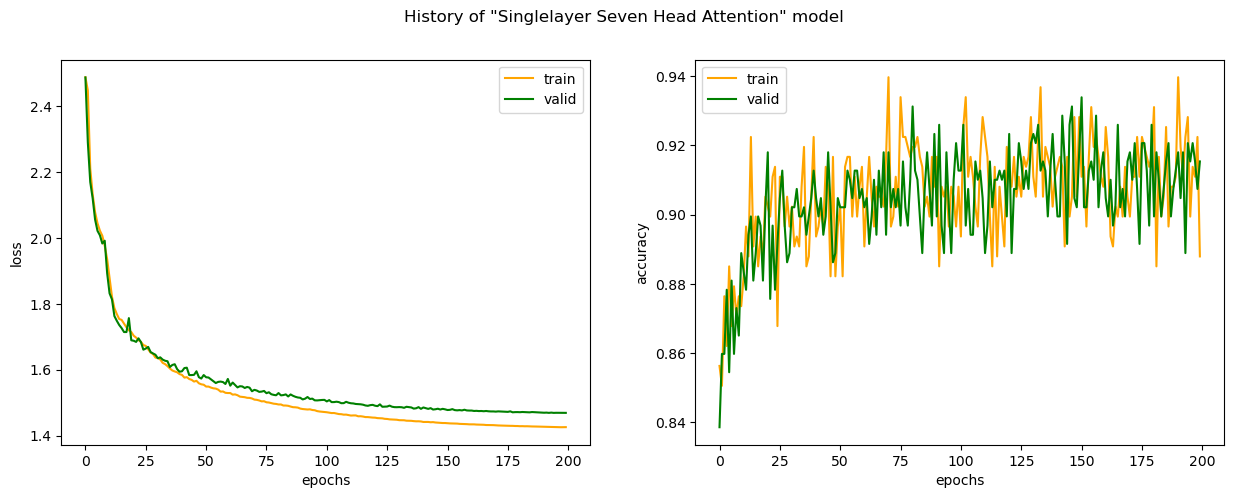

In [31]:
history_plot(losses_seven_head_Attention_singlelayer, 
             accuracies_seven_head_Attention_singlelayer, 
             'Singlelayer Seven Head Attention')

# Трёхслойный трансформер

In [32]:
class MultiLayerSelfAttentionBasedClassifier(nn.Module):
  def __init__(self, 
               hid_dim, # входная размерность.
               cnt_class=12, # Кол-во классов для предсказания.
               device=device, # устройство на котором производятся рассчёты
               n_heads=1): # Кол-во голов attention.
    super().__init__()
    # входная размерность.
    self.hid_dim = hid_dim
    # устройство на котором производятся рассчёты.
    self.device = device
    # Кол-во классов для предсказания.
    self.cnt_class = cnt_class
    # Слой Multi Head Attention.
    self.attn = MultiHeadAttentionLayer(hid_dim=self.hid_dim, n_heads=n_heads, dropout=0, device=self.device)
    # Предсказывающий линейный слой.
    self.classifier_head = nn.Linear(self.hid_dim, self.cnt_class)
    # Функция активации ReLU.
    self.relu = nn.ReLU()

  def forward(self, x, mask = None):
    # Передаём на вход Multi Head Attention слоя входную последовательность векторов.
    # На выходе получим вектора агрегированые при помощи 'MultiHead QKV Attention' и матрицы attention для входных последовательностей векторов.
    x, attention_1 = self.attn(x, x, x, mask=mask)

    # Пропустим вектора с выхода 'MultiHead QKV Attention' через функцию активации ReLU чтобы добавить нелинейность в модель.
    x = self.relu(x)

    # Передаём на вход Multi Head Attention слоя последовательность векторов с предыдущего  Multi Head Attention пропущеныз 
    # через функцию активации ReLU.
    x, attention_2 = self.attn(x, x, x, mask=mask)

    # Пропустим вектора с выхода 'MultiHead QKV Attention' через функцию активации ReLU чтобы добавить нелинейность в модель.
    x = self.relu(x)

    # Передаём на вход Multi Head Attention слоя последовательность векторов с предыдущего  Multi Head Attention пропущеныз 
    # через функцию активации ReLU.
    x, attention_3 = self.attn(x, x, x, mask=mask)

    # Агрегируем вектора полученнык на выходе последнего 'MultiHead QKV Attention' слоя по среднему значению.
    x = x.mean(dim=1)

    # Получим предсказания из агрегированого по среднему значению вектора.
    x = self.classifier_head(x)

    # Вернём предсказания и матрицы attention со всех слоёв.
    return x, [attention_1, attention_2, attention_3]

## Одна голова attention

### Создадим экзепмляр модели.

In [33]:
model_one_head_Attention_multilayer = MultiLayerSelfAttentionBasedClassifier(
                                                hid_dim=189, # входная размерность.
                                                cnt_class=12, # Кол-во классов для предсказания.
                                                device=device, # устройство на котором производятся рассчёты
                                                n_heads=1).to(device) # Кол-во голов attention. (Делители 189: 1, 3, 7, 9, 21, 27, 63, 189.)

# Функция потерь "CrossEntropyLoss".
criterion_one_head_Attention_multilayer = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_one_head_Attention_multilayer = torch.optim.Adam(model_one_head_Attention_multilayer.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_one_head_Attention_multilayer = torch.optim.lr_scheduler.LambdaLR(optimizer_one_head_Attention_multilayer, lr_lambda=lambda_scheduler)

### Обучим модель.

In [34]:
epochs = 200

losses_one_head_Attention_multilayer, accuracies_one_head_Attention_multilayer = train(
                                                model = model_one_head_Attention_multilayer, # Модель
                                                criterion = criterion_one_head_Attention_multilayer,     # Функция потерь
                                                optimizer = optimizer_one_head_Attention_multilayer, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_one_head_Attention_multilayer,  # планировщик уменьшения коэфицента LR
                                                scheduler_step = 5) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.4871459995107403 *TRAIN Accuracy: 0.8477011322975159 
*EVAL loss: 2.488336632988125 *EVAL Accuracy: 0.8571428060531616 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 2.486497633325086 *TRAIN Accuracy: 0.8477011322975159 
*EVAL loss: 2.4868541889483966 *EVAL Accuracy: 0.8439153432846069 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 2.48607217698176 *TRAIN Accuracy: 0.8419539928436279 
*EVAL loss: 2.4862511395107187 *EVAL Accuracy: 0.8465608358383179 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 2.3311699679256526 *TRAIN Accuracy: 0.8620689511299133 
*EVAL loss: 2.160053846266653 *EVAL Accuracy: 0.8571428060531616 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 2.125474099406711 *TRAIN Accuracy: 0.8649425506591797 
*EVAL loss: 2.111496536740688 *EVAL Accuracy: 0.8677248358726501 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 2.0373457853409365 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.979351843273139 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 1.9730145154891818 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.9524836484931667 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 1.956419753081091 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 1.9442881677941561 *EVAL Accuracy: 0.8703703284263611 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 1.88260875167055 *TRAIN Accuracy: 0.8735632300376892 
*EVAL loss: 1.9024947018094025 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 1.8572763997325104 *TRAIN Accuracy: 0.8649425506591797 
*EVAL loss: 1.990771462070009 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 1.8190437645765647 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.812137253293441 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 1.7584264520535968 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.7038082525179667 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 1.7105047109234497 *TRAIN Accuracy: 0.8793103694915771 
*EVAL loss: 1.649567378536008 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 1.6834552572739019 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7061426836329576 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 1.659696454148495 *TRAIN Accuracy: 0.8936781287193298 
*EVAL loss: 1.6968767840049517 *EVAL Accuracy: 0.873015820980072 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 1.6012193513492126 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.622331918909528 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 1.573017391911893 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.6407309429071215 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 1.588687484042804 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.59010558812163 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 1.54453830966061 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.5737716747632942 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 1.5359772801445004 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.5447833939923883 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 1.512660138927445 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.506568710311213 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 1.496553938792937 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5221975202726543 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 1.4957513151224378 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.5316008653297672 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 1.4788623251948747 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.4957869136192317 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 1.460008336674739 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.5010052505050173 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 1.459485448524221 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4676890636949183 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 1.4611822239555834 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4900366843694977 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 1.4428705997584503 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.5047546742813451 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 1.4415750939267977 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4651818299064223 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 1.4249432154295887 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.472538475884373 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 1.425313652911812 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.4346710219349743 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 1.4244472926748557 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.429401812383584 *EVAL Accuracy: 0.8915343880653381 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 1.3984145771536072 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.504329360447388 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 1.4090144029311424 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4122179160394432 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 1.4042175337536427 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.4070992146454666 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 1.3879529878911072 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4340477949562955 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 1.3826846172394738 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.453594943633368 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 1.3880380138335522 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.411126310549687 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 1.373884648974164 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.4015357461297417 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 1.377204718523496 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.4492207984279188 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 1.3581365576156539 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.4111166775793058 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 1.358384534892359 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.3869557905522967 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 1.348340388895192 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.4041931560529244 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 1.3515264919110637 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.3943885426236016 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 1.349396055980416 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.3856520787521807 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 1.331145299379097 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3985150834968192 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 1.3450342372846185 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3879638966321377 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 1.334185800146977 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.38889602808135 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 1.319603716843131 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.3743909471252533 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 1.3227477998044939 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.3793552438606551 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 50:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 51: 
*TRAIN loss: 1.3225604109855154 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.3747172217657775 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 51:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 52: 
*TRAIN loss: 1.3128316964646947 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.389330500136929 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 52:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 53: 
*TRAIN loss: 1.3097769450800034 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.3957894969175333 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 53:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 54: 
*TRAIN loss: 1.2971003941179156 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.363305610547339 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 54:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 55 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 55: 
*TRAIN loss: 1.2984164400545068 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.3664716005877722 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 55:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 56: 
*TRAIN loss: 1.2982516714212118 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.3504943223629018 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 56:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 57: 
*TRAIN loss: 1.2845642375412938 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3617837028357413 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 57:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 58: 
*TRAIN loss: 1.2884875463482444 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3846160558774028 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 58:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 59: 
*TRAIN loss: 1.2855319011584867 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3462603060005882 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 59:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 60 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 60: 
*TRAIN loss: 1.283788189027465 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.329759626428643 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 60:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 61: 
*TRAIN loss: 1.2710596834076033 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.331522433476251 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 61:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 62: 
*TRAIN loss: 1.2638286482765497 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.3253126135870401 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 62:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 63: 
*TRAIN loss: 1.2643254617587891 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.3743430363982159 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 63:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 64: 
*TRAIN loss: 1.257884325975828 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.359182603968929 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 64:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 65 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 65: 
*TRAIN loss: 1.252425455542656 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.377705175832913 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 65:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 66: 
*TRAIN loss: 1.264124395770181 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.3316331763338722 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 66:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 67: 
*TRAIN loss: 1.2512609581952285 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3150238277952966 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 67:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 68: 
*TRAIN loss: 1.2397711796544064 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.316990524685327 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 68:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 69: 
*TRAIN loss: 1.238343768649065 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3230006002378523 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 69:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 70 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 70: 
*TRAIN loss: 1.2470279543152105 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.3292267746982829 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 70:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 71: 
*TRAIN loss: 1.2464001837954315 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.3247690235714553 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 71:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 72: 
*TRAIN loss: 1.232901606552866 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.3314601124564789 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 72:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 73: 
*TRAIN loss: 1.2283395018621788 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.326442902378207 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 73:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 74: 
*TRAIN loss: 1.2292941210429473 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3152430183599637 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 74:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 75 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 75: 
*TRAIN loss: 1.2206280004233998 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.3053382336035242 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 75:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 76: 
*TRAIN loss: 1.2175341455381163 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3132427199538064 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 76:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 77: 
*TRAIN loss: 1.21731573463911 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.2938204052702333 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 77:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 78: 
*TRAIN loss: 1.2177999474253127 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.3126738708733847 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 78:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 79: 
*TRAIN loss: 1.2116661522446754 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2954029710732433 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 79:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 80 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 80: 
*TRAIN loss: 1.2179537299394627 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.339442212878911 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 80:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 81: 
*TRAIN loss: 1.2095288016635914 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.3001820786150866 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 81:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 82: 
*TRAIN loss: 1.207436004413627 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.3208206356217613 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 82:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 83: 
*TRAIN loss: 1.1983276132595713 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.301473925898563 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 83:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 84: 
*TRAIN loss: 1.1963201608006138 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.3022150415934293 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 84:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 85 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 85: 
*TRAIN loss: 1.1985914390298622 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3112648055806502 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 85:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 86: 
*TRAIN loss: 1.1917468185488551 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.311573063183958 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 86:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 87: 
*TRAIN loss: 1.1907457487573083 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3093318505711058 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 87:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 88: 
*TRAIN loss: 1.1972662419251514 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.295271045126161 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 88:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 89: 
*TRAIN loss: 1.1873457723899905 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.302657594818736 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 89:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 90 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 90: 
*TRAIN loss: 1.188151946447045 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.311263759770842 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 90:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 91: 
*TRAIN loss: 1.1904911961110876 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.3117109566255143 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 91:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 92: 
*TRAIN loss: 1.1771305974380006 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.2917400916160393 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 92:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 93: 
*TRAIN loss: 1.1769459324725973 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.3101298971441353 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 93:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 94: 
*TRAIN loss: 1.1788293149154874 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.296187890616326 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 94:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 95 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 95: 
*TRAIN loss: 1.1724479809596988 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.2946606834779213 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 95:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 96: 
*TRAIN loss: 1.1702494432338015 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2952939875511318 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 96:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 97: 
*TRAIN loss: 1.1795522898046378 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3043190820926813 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 97:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 98: 
*TRAIN loss: 1.169108224727793 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.3003575955059292 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 98:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 99: 
*TRAIN loss: 1.1791370900124198 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.2922115997452195 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 99:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 100 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 100: 
*TRAIN loss: 1.1627413751204234 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2918028787182188 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 100:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 101: 
*TRAIN loss: 1.1630044631111893 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2967903005220978 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 101:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 102: 
*TRAIN loss: 1.1577532957667682 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.308174493012306 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 102:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 103: 
*TRAIN loss: 1.1585943877962073 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.3175993517199127 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 103:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 104: 
*TRAIN loss: 1.1581455974971846 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.302793489383597 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 104:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 105 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 105: 
*TRAIN loss: 1.1590451050970998 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.294377810159425 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 105:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 106: 
*TRAIN loss: 1.1614636276960597 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2935796346662392 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 106:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 107: 
*TRAIN loss: 1.1544432256719803 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.3048138044431974 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 107:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 108: 
*TRAIN loss: 1.1489607815403602 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2871009388754493 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 108:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 109: 
*TRAIN loss: 1.150180377130031 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2860260382843556 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 109:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 110 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 110: 
*TRAIN loss: 1.1521423313245285 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2867125749864672 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 110:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 111: 
*TRAIN loss: 1.1474437710915155 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2823546823633716 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 111:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 112: 
*TRAIN loss: 1.1431113491064189 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2988498185391206 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 112:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 113: 
*TRAIN loss: 1.1435230209710314 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.287523920448694 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 113:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 114: 
*TRAIN loss: 1.1447942095813892 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.2845012268197755 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 114:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 115 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 115: 
*TRAIN loss: 1.144760997350267 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.2860917995601118 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 115:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 116: 
*TRAIN loss: 1.1430079454070246 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.2949732493277584 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 116:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 117: 
*TRAIN loss: 1.1364056354658145 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.3029690519939803 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 117:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 118: 
*TRAIN loss: 1.1344124220754153 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.300960808381297 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 118:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 119: 
*TRAIN loss: 1.1329619221935472 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.3107604826512071 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 119:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 120 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 120: 
*TRAIN loss: 1.138799791405952 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2903693045229987 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 120:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 121: 
*TRAIN loss: 1.1320196333094317 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2917064429438305 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 121:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 122: 
*TRAIN loss: 1.1322999536239717 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.2886536592377626 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 122:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 123: 
*TRAIN loss: 1.1289114741208197 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.2815367992958702 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 123:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 124: 
*TRAIN loss: 1.1265210188712589 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.2824790159747146 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 124:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 125 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 125: 
*TRAIN loss: 1.1293680800628028 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.2838013832733266 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 125:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 126: 
*TRAIN loss: 1.1284134835015978 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.2851395662264276 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 126:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 127: 
*TRAIN loss: 1.1247499005213657 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.3410588610412064 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 127:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 128: 
*TRAIN loss: 1.1312678258573456 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2968073382317544 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 128:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 129: 
*TRAIN loss: 1.12374098474043 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.291201344444755 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 129:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 130 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 130: 
*TRAIN loss: 1.1253713681913855 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.296678839937144 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 130:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 131: 
*TRAIN loss: 1.1211950761977276 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2910691606895304 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 131:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 132: 
*TRAIN loss: 1.1185553897768659 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.3008937872138127 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 132:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 133: 
*TRAIN loss: 1.1207119751549017 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.3092808414123938 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 133:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 134: 
*TRAIN loss: 1.1188241462854316 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2886287680105633 *EVAL Accuracy: 0.8888888359069824 
 ----------------------------------------------------------------------------------------------------


Training epoch 134:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 135 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 135: 
*TRAIN loss: 1.1211929278973436 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.2891071160556307 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 135:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 136: 
*TRAIN loss: 1.1187163236660969 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.283973163915898 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 136:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 137: 
*TRAIN loss: 1.1156645146209614 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2835780737917462 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 137:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 138: 
*TRAIN loss: 1.1144442116992088 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.2870783596429947 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 138:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 139: 
*TRAIN loss: 1.1146943744990134 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.282636315505642 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 139:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 140 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 140: 
*TRAIN loss: 1.1114073254871242 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2847637649926518 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 140:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 141: 
*TRAIN loss: 1.1117204547473647 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.2888400098603405 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 141:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 142: 
*TRAIN loss: 1.1117365324668647 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.2890879493345186 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 142:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 143: 
*TRAIN loss: 1.1106058793114628 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2935651458671729 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 143:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 144: 
*TRAIN loss: 1.1131343209198878 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.2832385018570036 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 144:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 145 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 145: 
*TRAIN loss: 1.1091381141248564 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3039686654919855 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 145:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 146: 
*TRAIN loss: 1.1105108520781006 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.2928595483910252 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 146:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 147: 
*TRAIN loss: 1.1083831347680766 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.2832054188748043 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 147:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 148: 
*TRAIN loss: 1.1066360651943696 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.29017007037972 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 148:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 149: 
*TRAIN loss: 1.1077143311877011 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2880135782441982 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 149:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 150 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 150: 
*TRAIN loss: 1.106127126007544 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2871335145859844 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 150:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 151: 
*TRAIN loss: 1.1045657834001275 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2917682703589712 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 151:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 152: 
*TRAIN loss: 1.1056423710764607 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2920679219932427 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 152:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 153: 
*TRAIN loss: 1.102740015857472 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2911591725851954 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 153:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 154: 
*TRAIN loss: 1.1028061224235481 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2917124577027248 *EVAL Accuracy: 0.899470865726471 
 ----------------------------------------------------------------------------------------------------


Training epoch 154:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 155 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 155: 
*TRAIN loss: 1.1029297208995146 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2855121960385838 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 155:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 156: 
*TRAIN loss: 1.1043320829321677 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.288126129707176 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 156:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 157: 
*TRAIN loss: 1.1000179880508851 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2865560701263525 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 157:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 158: 
*TRAIN loss: 1.1017761446402807 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2890298240026055 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 158:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 159: 
*TRAIN loss: 1.0999603493957804 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.292726248157812 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 159:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 160 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 160: 
*TRAIN loss: 1.0987368214848772 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.290367317770879 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 160:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 161: 
*TRAIN loss: 1.098419661996408 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2958908168719463 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 161:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 162: 
*TRAIN loss: 1.0970313988033882 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2915558296803316 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 162:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 163: 
*TRAIN loss: 1.09674559722653 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.290755034253329 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 163:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 164: 
*TRAIN loss: 1.097753744794357 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.3070082727495473 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 164:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 165 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 165: 
*TRAIN loss: 1.0983235395801245 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.285676540008442 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 165:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 166: 
*TRAIN loss: 1.0949129322268791 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.2888182389068443 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 166:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 167: 
*TRAIN loss: 1.0950988553237695 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.2855800311897105 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 167:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 168: 
*TRAIN loss: 1.0949413993264705 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.284951563763058 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 168:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 169: 
*TRAIN loss: 1.0951013676310515 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.289899846158926 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 169:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 170 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 170: 
*TRAIN loss: 1.094149602888349 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2869011928877312 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 170:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 171: 
*TRAIN loss: 1.0927846809250086 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.3016411322542596 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 171:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 172: 
*TRAIN loss: 1.09510397951721 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2854265161028986 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 172:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 173: 
*TRAIN loss: 1.0923322085954792 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2901685349940197 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 173:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 174: 
*TRAIN loss: 1.092944185053967 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.29763690628052 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 174:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 175 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 175: 
*TRAIN loss: 1.0913814017973837 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2879013025002015 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 175:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 176: 
*TRAIN loss: 1.091140420976201 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.2908360332678006 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 176:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 177: 
*TRAIN loss: 1.092822782733325 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2875444789616843 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 177:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 178: 
*TRAIN loss: 1.0911852474198531 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2857616521696125 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 178:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 179: 
*TRAIN loss: 1.0912672042470781 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.303613731288078 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 179:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 180 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 180: 
*TRAIN loss: 1.090328947692293 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2961262771815703 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 180:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 181: 
*TRAIN loss: 1.090435136901378 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.293449346091662 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 181:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 182: 
*TRAIN loss: 1.091224788915447 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.2913082893816508 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 182:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 183: 
*TRAIN loss: 1.0886156937573277 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.291448857417275 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 183:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 184: 
*TRAIN loss: 1.088439882833189 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.291432172479833 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 184:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 185 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 185: 
*TRAIN loss: 1.089337373209215 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.2910309733035568 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 185:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 186: 
*TRAIN loss: 1.0895116146929393 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.290543144070122 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 186:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 187: 
*TRAIN loss: 1.0881326059295602 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.2863214826298848 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 187:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 188: 
*TRAIN loss: 1.086176656645579 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.2886045356881624 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 188:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 189: 
*TRAIN loss: 1.0869175889743097 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2919925796396552 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 189:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 190 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 190: 
*TRAIN loss: 1.0861075648481024 *TRAIN Accuracy: 0.9109195470809937 
*EVAL loss: 1.2872438313201455 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 190:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 191: 
*TRAIN loss: 1.087009006117971 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2898529062875248 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 191:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 192: 
*TRAIN loss: 1.0863363283085656 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2864404271533476 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 192:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 193: 
*TRAIN loss: 1.0860305252669638 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2873590465295275 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 193:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 194: 
*TRAIN loss: 1.0860329120675296 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.2914627222284136 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 194:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 195 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 195: 
*TRAIN loss: 1.0861684416113129 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2908932226004957 *EVAL Accuracy: 0.89682537317276 
 ----------------------------------------------------------------------------------------------------


Training epoch 195:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 196: 
*TRAIN loss: 1.085380062982285 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2880091149627073 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 196:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 197: 
*TRAIN loss: 1.0854222711903847 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.292343961380878 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 197:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 198: 
*TRAIN loss: 1.0847369425667872 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2938062520593008 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 198:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 199: 
*TRAIN loss: 1.0845244248589008 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2914290166543902 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 199:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 200 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 200: 
*TRAIN loss: 1.0845610280492053 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.2915419724595394 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


### История обучения

Лучшая accuracy на валидации: 94.44


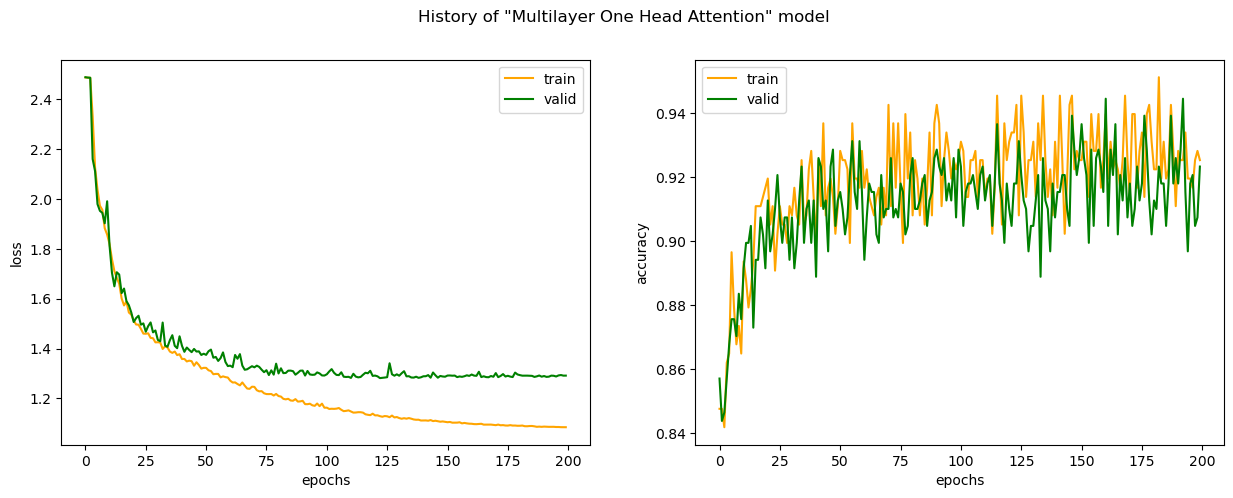

In [35]:
history_plot(losses_one_head_Attention_multilayer, 
             accuracies_one_head_Attention_multilayer, 
             'Multilayer One Head Attention')

## Семь голов attention

### Создадим экзепмляр модели.

In [36]:
model_seven_head_Attention_multilayer = MultiLayerSelfAttentionBasedClassifier(
                                                hid_dim=189, # входная размерность.
                                                cnt_class=12, # Кол-во классов для предсказания.
                                                device=device, # устройство на котором производятся рассчёты
                                                n_heads=7).to(device) # Кол-во голов attention. (Делители 189: 1, 3, 7, 9, 21, 27, 63, 189.)

# Функция потерь "CrossEntropyLoss".
criterion_seven_head_Attention_multilayer = nn.CrossEntropyLoss()

LR = 0.001
# Коэфицент уменьшения LR по эпохам.
SCHEDULER_LAMBDA_PARAM = 0.9
# Оптимизатор.
optimizer_seven_head_Attention_multilayer = torch.optim.Adam(model_seven_head_Attention_multilayer.parameters(), lr=LR)
# Планировщик уменьшения коэфицента LR.
lambda_scheduler = lambda x: SCHEDULER_LAMBDA_PARAM ** x
scheduler_seven_head_Attention_multilayer = torch.optim.lr_scheduler.LambdaLR(optimizer_seven_head_Attention_multilayer, lr_lambda=lambda_scheduler)

### Обучим модель.

In [37]:
epochs = 200

losses_seven_head_Attention_multilayer, accuracies_seven_head_Attention_multilayer = train(
                                                model = model_seven_head_Attention_multilayer, # Модель
                                                criterion = criterion_seven_head_Attention_multilayer,     # Функция потерь
                                                optimizer = optimizer_seven_head_Attention_multilayer, # оптимизатор 
                                                num_epochs = epochs,          # Кол-во эпох
                                                train_loader = train_loader, # Тренировочные данные
                                                val_loader = test_loader,    # Валидационные данные
                                                scheduler = scheduler_seven_head_Attention_multilayer,  # планировщик уменьшения коэфицента LR
                                                scheduler_step = 5) # Шаг уменьшения коэфицента LR по эпохам.

Training epoch 0:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 1: 
*TRAIN loss: 2.487713519352135 *TRAIN Accuracy: 0.8505747318267822 
*EVAL loss: 2.4885115212864344 *EVAL Accuracy: 0.8544973134994507 
 ----------------------------------------------------------------------------------------------------


Training epoch 1:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 2: 
*TRAIN loss: 2.486181546528235 *TRAIN Accuracy: 0.8419539928436279 
*EVAL loss: 2.4874549693097827 *EVAL Accuracy: 0.8571428060531616 
 ----------------------------------------------------------------------------------------------------


Training epoch 2:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 3: 
*TRAIN loss: 2.4863810126584065 *TRAIN Accuracy: 0.8419539928436279 
*EVAL loss: 2.486177278114926 *EVAL Accuracy: 0.8359788060188293 
 ----------------------------------------------------------------------------------------------------


Training epoch 3:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 4: 
*TRAIN loss: 2.410618669983289 *TRAIN Accuracy: 0.8477011322975159 
*EVAL loss: 2.188838766627728 *EVAL Accuracy: 0.8624338507652283 
 ----------------------------------------------------------------------------------------------------


Training epoch 4:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 5 Scheduler LR 0.001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 5: 
*TRAIN loss: 2.1586164794634795 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 2.153445933658196 *EVAL Accuracy: 0.873015820980072 
 ----------------------------------------------------------------------------------------------------


Training epoch 5:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 6: 
*TRAIN loss: 2.0578010624087453 *TRAIN Accuracy: 0.8678160905838013 
*EVAL loss: 2.0551028104070896 *EVAL Accuracy: 0.8677248358726501 
 ----------------------------------------------------------------------------------------------------


Training epoch 6:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 7: 
*TRAIN loss: 2.004509328505558 *TRAIN Accuracy: 0.8563218116760254 
*EVAL loss: 1.9566197251853295 *EVAL Accuracy: 0.8835978507995605 
 ----------------------------------------------------------------------------------------------------


Training epoch 7:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 8: 
*TRAIN loss: 1.932920278555303 *TRAIN Accuracy: 0.8764367699623108 
*EVAL loss: 1.9339946809270478 *EVAL Accuracy: 0.8650793433189392 
 ----------------------------------------------------------------------------------------------------


Training epoch 8:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 9: 
*TRAIN loss: 1.884740176309425 *TRAIN Accuracy: 0.8879310488700867 
*EVAL loss: 1.8466030278544325 *EVAL Accuracy: 0.8809523582458496 
 ----------------------------------------------------------------------------------------------------


Training epoch 9:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 10 Scheduler LR 0.0009000000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 10: 
*TRAIN loss: 1.8542160061997137 *TRAIN Accuracy: 0.8850574493408203 
*EVAL loss: 1.7629101778977587 *EVAL Accuracy: 0.8756613731384277 
 ----------------------------------------------------------------------------------------------------


Training epoch 10:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 11: 
*TRAIN loss: 1.7493066560783734 *TRAIN Accuracy: 0.8821839094161987 
*EVAL loss: 1.6995536347491593 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 11:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 12: 
*TRAIN loss: 1.668312075992166 *TRAIN Accuracy: 0.8908045887947083 
*EVAL loss: 1.6598896153253722 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 12:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 13: 
*TRAIN loss: 1.5980662136895667 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.5331933160593936 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 13:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 14: 
*TRAIN loss: 1.5467479643750197 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.5906912789584629 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 14:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 15 Scheduler LR 0.0008100000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 15: 
*TRAIN loss: 1.4790850730403258 *TRAIN Accuracy: 0.8965517282485962 
*EVAL loss: 1.524338497216724 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 15:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 16: 
*TRAIN loss: 1.463565226604708 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.4351067337185994 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 16:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 17: 
*TRAIN loss: 1.419024425151512 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.4225788792896281 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 17:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 18: 
*TRAIN loss: 1.3888934531462713 *TRAIN Accuracy: 0.9022988677024841 
*EVAL loss: 1.422037578901546 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 18:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 19: 
*TRAIN loss: 1.3930643697498488 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.3539651810386708 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 19:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 20 Scheduler LR 0.0007290000000000002


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 20: 
*TRAIN loss: 1.3879243806691322 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.379150521849604 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 20:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 21: 
*TRAIN loss: 1.341926152475665 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.3830161679739144 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 21:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 22: 
*TRAIN loss: 1.3157096285454248 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3693524203605478 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 22:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 23: 
*TRAIN loss: 1.3127116490917452 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.3333323297879622 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 23:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 24: 
*TRAIN loss: 1.2887435801962162 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3271691668411763 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 24:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 25 Scheduler LR 0.0006561000000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 25: 
*TRAIN loss: 1.2903461391023217 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.3065395607732482 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 25:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 26: 
*TRAIN loss: 1.2653845252726508 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.3369808989063217 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 26:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 27: 
*TRAIN loss: 1.272449810224502 *TRAIN Accuracy: 0.8994252681732178 
*EVAL loss: 1.3174847680663953 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 27:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 28: 
*TRAIN loss: 1.2471619223163266 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.319190778307685 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 28:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 29: 
*TRAIN loss: 1.2365248551179262 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.2810840063247364 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 29:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 30 Scheduler LR 0.00059049


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 30: 
*TRAIN loss: 1.2208336897246825 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2629677819380951 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 30:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 31: 
*TRAIN loss: 1.2203537193736953 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.298728558162185 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 31:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 32: 
*TRAIN loss: 1.2119540768480332 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.2922842458643744 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 32:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 33: 
*TRAIN loss: 1.1970616265653788 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.2436097857282784 *EVAL Accuracy: 0.9021163582801819 
 ----------------------------------------------------------------------------------------------------


Training epoch 33:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 34: 
*TRAIN loss: 1.2048085364539887 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.230565551893513 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 34:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 35 Scheduler LR 0.000531441


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 35: 
*TRAIN loss: 1.1731939700184157 *TRAIN Accuracy: 0.9051724076271057 
*EVAL loss: 1.2770996159598424 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 35:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 36: 
*TRAIN loss: 1.1607805027995255 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.2309524242815302 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 36:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 37: 
*TRAIN loss: 1.1637446360283732 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.2155733794993577 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 37:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 38: 
*TRAIN loss: 1.146727165057524 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.2095390820871752 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 38:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 39: 
*TRAIN loss: 1.1408744519034002 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.222561701051237 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 39:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 40 Scheduler LR 0.0004782969000000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 40: 
*TRAIN loss: 1.1379286985484498 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.3242060923716743 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 40:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 41: 
*TRAIN loss: 1.126676029592702 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.387367482398555 *EVAL Accuracy: 0.8941798806190491 
 ----------------------------------------------------------------------------------------------------


Training epoch 41:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 42: 
*TRAIN loss: 1.127999389465571 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1829612879600195 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 42:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 43: 
*TRAIN loss: 1.1095644358591084 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.1732786573329734 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 43:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 44: 
*TRAIN loss: 1.1116183966603315 *TRAIN Accuracy: 0.9137930870056152 
*EVAL loss: 1.1771391853711015 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 44:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 45 Scheduler LR 0.0004304672100000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 45: 
*TRAIN loss: 1.0913814934349206 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.2539807835211643 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 45:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 46: 
*TRAIN loss: 1.0818593815586832 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1651315097405084 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 46:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 47: 
*TRAIN loss: 1.058636943343372 *TRAIN Accuracy: 0.9166666865348816 
*EVAL loss: 1.1389827213568906 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 47:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 48: 
*TRAIN loss: 1.0531248306501988 *TRAIN Accuracy: 0.9224137663841248 
*EVAL loss: 1.1813999870447538 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 48:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 49: 
*TRAIN loss: 1.0625330333023948 *TRAIN Accuracy: 0.9080459475517273 
*EVAL loss: 1.1350439765311888 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 49:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 50 Scheduler LR 0.0003874204890000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 50: 
*TRAIN loss: 1.0462061479597118 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.1414309115123256 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 50:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 51: 
*TRAIN loss: 1.0416980866595902 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1573836771468942 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 51:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 52: 
*TRAIN loss: 1.0134981104540617 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.1149217882582747 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 52:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 53: 
*TRAIN loss: 1.0113527568008671 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1345711467343245 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 53:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 54: 
*TRAIN loss: 1.0026339754396096 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1293472117119532 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 54:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 55 Scheduler LR 0.0003486784401000001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 55: 
*TRAIN loss: 0.9972132867004906 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1458333266949257 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 55:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 56: 
*TRAIN loss: 0.9867819431304615 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1036724625983254 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 56:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 57: 
*TRAIN loss: 0.9768853222372674 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.1151247447559316 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 57:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 58: 
*TRAIN loss: 0.9732568965888947 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.115345975887697 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 58:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 59: 
*TRAIN loss: 0.9586953448085372 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1072143865757063 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 59:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 60 Scheduler LR 0.0003138105960900001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 60: 
*TRAIN loss: 0.969538932040572 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.0914001572163448 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 60:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 61: 
*TRAIN loss: 0.9545601049312303 *TRAIN Accuracy: 0.9195402264595032 
*EVAL loss: 1.0870778570146602 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 61:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 62: 
*TRAIN loss: 0.9424418943388423 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.094618161882507 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 62:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 63: 
*TRAIN loss: 0.9507070178891759 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1020377729046902 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 63:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 64: 
*TRAIN loss: 0.9311351424469788 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1055997665002417 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 64:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 65 Scheduler LR 0.0002824295364810001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 65: 
*TRAIN loss: 0.9398849145351718 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.0937004087828333 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 65:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 66: 
*TRAIN loss: 0.9243167236824544 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.1186865358376636 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 66:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 67: 
*TRAIN loss: 0.9143109751167258 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.0773383510563896 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 67:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 68: 
*TRAIN loss: 0.9128626477915383 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.1340556873167114 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 68:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 69: 
*TRAIN loss: 0.9084324712724776 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.106762718657052 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 69:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 70 Scheduler LR 0.0002541865828329001


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 70: 
*TRAIN loss: 0.9076157346841857 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.075172009060858 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 70:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 71: 
*TRAIN loss: 0.9015953150356616 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.0888406491551825 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 71:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 72: 
*TRAIN loss: 0.8904328968047849 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.110441120214092 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 72:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 73: 
*TRAIN loss: 0.8886336664108668 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1220346140310582 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 73:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 74: 
*TRAIN loss: 0.8892013861316067 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.0851784652707392 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 74:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 75 Scheduler LR 0.0002287679245496101


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 75: 
*TRAIN loss: 0.8894499584102505 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1135323123571406 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 75:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 76: 
*TRAIN loss: 0.8746457665644436 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.0886857100603857 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 76:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 77: 
*TRAIN loss: 0.8656760622677224 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.0982435305430025 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 77:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 78: 
*TRAIN loss: 0.8706813001851373 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.102676585238583 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 78:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 79: 
*TRAIN loss: 0.8645107914533 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1030245931438576 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 79:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 80 Scheduler LR 0.0002058911320946491


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 80: 
*TRAIN loss: 0.8632059351057009 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1237564657920194 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 80:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 81: 
*TRAIN loss: 0.8647610625458431 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1146175375980256 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 81:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 82: 
*TRAIN loss: 0.8506642386932073 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.0989732382216082 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 82:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 83: 
*TRAIN loss: 0.8567721578379078 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1016528049103167 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 83:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 84: 
*TRAIN loss: 0.8500066333505806 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.1144025475086596 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 84:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 85 Scheduler LR 0.00018530201888518417


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 85: 
*TRAIN loss: 0.845576304194415 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1119358944666302 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 85:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 86: 
*TRAIN loss: 0.8354314681237404 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 1.0960065716514233 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 86:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 87: 
*TRAIN loss: 0.8320357987288032 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1235999747749417 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 87:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 88: 
*TRAIN loss: 0.833739593321217 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.1227830662964051 *EVAL Accuracy: 0.9497354030609131 
 ----------------------------------------------------------------------------------------------------


Training epoch 88:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 89: 
*TRAIN loss: 0.8274784840261182 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.101327036489189 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 89:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 90 Scheduler LR 0.00016677181699666576


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 90: 
*TRAIN loss: 0.8268286391646694 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.1264731622188902 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 90:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 91: 
*TRAIN loss: 0.8247522760431452 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1081747992869404 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 91:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 92: 
*TRAIN loss: 0.8249319962870794 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.1245368936232167 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 92:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 93: 
*TRAIN loss: 0.8222213255272234 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.1110732616330834 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 93:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 94: 
*TRAIN loss: 0.8183986882705078 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1115695828964494 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 94:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 95 Scheduler LR 0.00015009463529699917


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 95: 
*TRAIN loss: 0.8130064909236356 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1146177080244533 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 95:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 96: 
*TRAIN loss: 0.8102992363331889 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1196527860738752 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 96:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 97: 
*TRAIN loss: 0.8069003013383463 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1121371673379614 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 97:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 98: 
*TRAIN loss: 0.8009402142663264 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1147105289898618 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 98:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 99: 
*TRAIN loss: 0.8001938322359717 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.149147596591695 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 99:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 100 Scheduler LR 0.0001350851717672993


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 100: 
*TRAIN loss: 0.810871445805718 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1400711182341798 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 100:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 101: 
*TRAIN loss: 0.7976077160918891 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1162744119572197 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 101:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 102: 
*TRAIN loss: 0.7973462910313994 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.1300649558551894 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 102:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 103: 
*TRAIN loss: 0.7916715394532431 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.133793614987457 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 103:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 104: 
*TRAIN loss: 0.794850311519857 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.1887281555655178 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 104:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 105 Scheduler LR 0.00012157665459056935


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 105: 
*TRAIN loss: 0.7909364305865892 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.121165580130717 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 105:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 106: 
*TRAIN loss: 0.7884666684090003 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.1362015473130989 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 106:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 107: 
*TRAIN loss: 0.780502977130858 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1334903689423932 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 107:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 108: 
*TRAIN loss: 0.7821593859560617 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1300401062551166 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 108:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 109: 
*TRAIN loss: 0.7762478407492046 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.124955648710568 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 109:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 110 Scheduler LR 0.00010941898913151242


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 110: 
*TRAIN loss: 0.7772956328927992 *TRAIN Accuracy: 0.9396551847457886 
*EVAL loss: 1.1437998763657609 *EVAL Accuracy: 0.9497354030609131 
 ----------------------------------------------------------------------------------------------------


Training epoch 110:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 111: 
*TRAIN loss: 0.7736908162326537 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1405430089954045 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 111:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 112: 
*TRAIN loss: 0.7716129796231453 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1636091685137235 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 112:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 113: 
*TRAIN loss: 0.7718454478334434 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1425534818033372 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 113:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 114: 
*TRAIN loss: 0.7720086872254662 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1450949856368087 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 114:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 115 Scheduler LR 9.847709021836118e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 115: 
*TRAIN loss: 0.7679798176532642 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.137245364158496 *EVAL Accuracy: 0.9603174328804016 
 ----------------------------------------------------------------------------------------------------


Training epoch 115:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 116: 
*TRAIN loss: 0.7636790327728062 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1374675397005762 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 116:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 117: 
*TRAIN loss: 0.7635872754528431 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1710523543379663 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 117:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 118: 
*TRAIN loss: 0.7622705186804263 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1372277963543012 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 118:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 119: 
*TRAIN loss: 0.7574826277138996 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1539020573314005 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 119:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 120 Scheduler LR 8.862938119652506e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 120: 
*TRAIN loss: 0.7579751436944229 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1584927495211994 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 120:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 121: 
*TRAIN loss: 0.7600012233463611 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1332116296017896 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 121:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 122: 
*TRAIN loss: 0.7545698106023047 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1456965062750215 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 122:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 123: 
*TRAIN loss: 0.7523088880489178 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1608469040136478 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 123:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 124: 
*TRAIN loss: 0.7543508137209703 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1596282692498268 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 124:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 125 Scheduler LR 7.976644307687256e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 125: 
*TRAIN loss: 0.751284068949673 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1622714847493083 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 125:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 126: 
*TRAIN loss: 0.7477028847914619 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.156126021926537 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 126:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 127: 
*TRAIN loss: 0.7486320658625127 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 1.154280667943868 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 127:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 128: 
*TRAIN loss: 0.7478385348557443 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1526741173182873 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 128:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 129: 
*TRAIN loss: 0.7417050923904067 *TRAIN Accuracy: 0.9252873659133911 
*EVAL loss: 1.1613871570631547 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 129:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 130 Scheduler LR 7.17897987691853e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 130: 
*TRAIN loss: 0.742388107700752 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1487396202240843 *EVAL Accuracy: 0.9550264477729797 
 ----------------------------------------------------------------------------------------------------


Training epoch 130:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 131: 
*TRAIN loss: 0.7390629576609719 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.149611875139014 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 131:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 132: 
*TRAIN loss: 0.7440421873505685 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.1568687731776397 *EVAL Accuracy: 0.952380895614624 
 ----------------------------------------------------------------------------------------------------


Training epoch 132:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 133: 
*TRAIN loss: 0.7382074101826699 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.167144463848483 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 133:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 134: 
*TRAIN loss: 0.7379227526065649 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1514983569118575 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 134:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 135 Scheduler LR 6.461081889226677e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 135: 
*TRAIN loss: 0.7349102567417538 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.158636703165416 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 135:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 136: 
*TRAIN loss: 0.7341108833344907 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1596462031998163 *EVAL Accuracy: 0.9153438806533813 
 ----------------------------------------------------------------------------------------------------


Training epoch 136:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 137: 
*TRAIN loss: 0.7343855466049314 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1717439852176383 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 137:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 138: 
*TRAIN loss: 0.7318804141368959 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.1590864500364624 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 138:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 139: 
*TRAIN loss: 0.7292861405608136 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.166383699293356 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 139:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 140 Scheduler LR 5.8149737003040094e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 140: 
*TRAIN loss: 0.7319109792665832 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1578047876793522 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 140:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 141: 
*TRAIN loss: 0.7281438713318131 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1585017259193557 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 141:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 142: 
*TRAIN loss: 0.7269192066917497 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.179280865819207 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 142:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 143: 
*TRAIN loss: 0.725911887505081 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1612282942762209 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 143:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 144: 
*TRAIN loss: 0.7289407300403621 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.1699471558889967 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 144:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 145 Scheduler LR 5.233476330273609e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 145: 
*TRAIN loss: 0.7253929378878788 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1655214935685692 *EVAL Accuracy: 0.952380895614624 
 ----------------------------------------------------------------------------------------------------


Training epoch 145:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 146: 
*TRAIN loss: 0.7239985898853537 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1654601751662155 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 146:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 147: 
*TRAIN loss: 0.7208548090473849 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1921974717331976 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 147:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 148: 
*TRAIN loss: 0.7220858254122878 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.1714965168349525 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 148:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 149: 
*TRAIN loss: 0.719211390277836 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1726376323653354 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 149:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 150 Scheduler LR 4.7101286972462485e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 150: 
*TRAIN loss: 0.7209164941993311 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.166005636868731 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 150:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 151: 
*TRAIN loss: 0.7194800752670414 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.170325044719281 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 151:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 152: 
*TRAIN loss: 0.7154409225039838 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.172129908384995 *EVAL Accuracy: 0.9206348657608032 
 ----------------------------------------------------------------------------------------------------


Training epoch 152:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 153: 
*TRAIN loss: 0.71829344205914 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1776363441936626 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 153:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 154: 
*TRAIN loss: 0.7167386280764177 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1729488361750386 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 154:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 155 Scheduler LR 4.239115827521624e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 155: 
*TRAIN loss: 0.712995014936998 *TRAIN Accuracy: 0.9741379022598267 
*EVAL loss: 1.1900167617246902 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 155:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 156: 
*TRAIN loss: 0.7142947518470238 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1836730034577745 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 156:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 157: 
*TRAIN loss: 0.7124928700618135 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1905633807139837 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 157:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 158: 
*TRAIN loss: 0.7138080569822954 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.1745646834980215 *EVAL Accuracy: 0.9074074029922485 
 ----------------------------------------------------------------------------------------------------


Training epoch 158:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 159: 
*TRAIN loss: 0.7120867714283974 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1877554520026703 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 159:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 160 Scheduler LR 3.8152042447694614e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 160: 
*TRAIN loss: 0.7098023522068109 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.183470245149922 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 160:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 161: 
*TRAIN loss: 0.711122280704194 *TRAIN Accuracy: 0.9655172228813171 
*EVAL loss: 1.1761991318891576 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 161:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 162: 
*TRAIN loss: 0.7076666117062825 *TRAIN Accuracy: 0.9798850417137146 
*EVAL loss: 1.1759332564711087 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 162:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 163: 
*TRAIN loss: 0.7104169966994748 *TRAIN Accuracy: 0.9454023241996765 
*EVAL loss: 1.174367558675089 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 163:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 164: 
*TRAIN loss: 0.7082125982348297 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1813112572339315 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 164:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 165 Scheduler LR 3.433683820292515e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 165: 
*TRAIN loss: 0.710677380333252 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1836600923396887 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 165:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 166: 
*TRAIN loss: 0.7058216366583872 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.1806012493545974 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 166:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 167: 
*TRAIN loss: 0.7065685015923798 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1821978970379254 *EVAL Accuracy: 0.9232804179191589 
 ----------------------------------------------------------------------------------------------------


Training epoch 167:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 168: 
*TRAIN loss: 0.7041073472703846 *TRAIN Accuracy: 0.9683908224105835 
*EVAL loss: 1.17946828393937 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 168:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 169: 
*TRAIN loss: 0.7059175409402095 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1922598914440088 *EVAL Accuracy: 0.9100528955459595 
 ----------------------------------------------------------------------------------------------------


Training epoch 169:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 170 Scheduler LR 3.090315438263264e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 170: 
*TRAIN loss: 0.7037430528075679 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1842965474949212 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 170:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 171: 
*TRAIN loss: 0.7043337865282454 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1859199008394041 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 171:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 172: 
*TRAIN loss: 0.7034549117683383 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.1834546591742305 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 172:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 173: 
*TRAIN loss: 0.7022754685612747 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.199762464191566 *EVAL Accuracy: 0.9126983880996704 
 ----------------------------------------------------------------------------------------------------


Training epoch 173:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 174: 
*TRAIN loss: 0.7017022534244421 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1842868182186637 *EVAL Accuracy: 0.9312168955802917 
 ----------------------------------------------------------------------------------------------------


Training epoch 174:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 175 Scheduler LR 2.7812838944369376e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 175: 
*TRAIN loss: 0.7009899230647333 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1940569743842955 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 175:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 176: 
*TRAIN loss: 0.6997937382847422 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1928031597095639 *EVAL Accuracy: 0.9497354030609131 
 ----------------------------------------------------------------------------------------------------


Training epoch 176:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 177: 
*TRAIN loss: 0.6994158830233927 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1898333813510051 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 177:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 178: 
*TRAIN loss: 0.6995384640431006 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.183459881423972 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 178:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 179: 
*TRAIN loss: 0.6989575313937891 *TRAIN Accuracy: 0.9511494040489197 
*EVAL loss: 1.1908216610175044 *EVAL Accuracy: 0.9470899105072021 
 ----------------------------------------------------------------------------------------------------


Training epoch 179:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 180 Scheduler LR 2.5031555049932436e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 180: 
*TRAIN loss: 0.6987761240878357 *TRAIN Accuracy: 0.931034505367279 
*EVAL loss: 1.1909437706472763 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 180:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 181: 
*TRAIN loss: 0.6988898597506937 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1919104912392673 *EVAL Accuracy: 0.9179893732070923 
 ----------------------------------------------------------------------------------------------------


Training epoch 181:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 182: 
*TRAIN loss: 0.6972848869008949 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 1.1862352982636408 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


Training epoch 182:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 183: 
*TRAIN loss: 0.6965499648699063 *TRAIN Accuracy: 0.9568965435028076 
*EVAL loss: 1.1950525204039324 *EVAL Accuracy: 0.9047618508338928 
 ----------------------------------------------------------------------------------------------------


Training epoch 183:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 184: 
*TRAIN loss: 0.6973405554793175 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1946278757960727 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 184:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 185 Scheduler LR 2.2528399544939195e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 185: 
*TRAIN loss: 0.6957241080674648 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1909798810587076 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 185:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 186: 
*TRAIN loss: 0.6949654569954746 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.1958925879897715 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 186:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 187: 
*TRAIN loss: 0.6963716537091277 *TRAIN Accuracy: 0.9425287246704102 
*EVAL loss: 1.1913565893069402 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 187:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 188: 
*TRAIN loss: 0.6952378427655458 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.1903584932345095 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 188:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 189: 
*TRAIN loss: 0.6939460664860742 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.210236438709282 *EVAL Accuracy: 0.9259259104728699 
 ----------------------------------------------------------------------------------------------------


Training epoch 189:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 190 Scheduler LR 2.0275559590445276e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 190: 
*TRAIN loss: 0.6943878205916021 *TRAIN Accuracy: 0.977011501789093 
*EVAL loss: 1.211797523339878 *EVAL Accuracy: 0.9417989253997803 
 ----------------------------------------------------------------------------------------------------


Training epoch 190:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 191: 
*TRAIN loss: 0.6933714490824585 *TRAIN Accuracy: 0.9626436829566956 
*EVAL loss: 1.2025262276582018 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 191:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 192: 
*TRAIN loss: 0.6946432488718636 *TRAIN Accuracy: 0.9712643623352051 
*EVAL loss: 1.1942324710708179 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 192:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 193: 
*TRAIN loss: 0.6923969595841111 *TRAIN Accuracy: 0.954023003578186 
*EVAL loss: 1.198849540620744 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 193:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 194: 
*TRAIN loss: 0.6923536621200419 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1946973619597705 *EVAL Accuracy: 0.9338623881340027 
 ----------------------------------------------------------------------------------------------------


Training epoch 194:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 195 Scheduler LR 1.824800363140075e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 195: 
*TRAIN loss: 0.691548581855552 *TRAIN Accuracy: 0.9482758641242981 
*EVAL loss: 1.1944624297403779 *EVAL Accuracy: 0.9444444179534912 
 ----------------------------------------------------------------------------------------------------


Training epoch 195:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 196: 
*TRAIN loss: 0.6913908456003702 *TRAIN Accuracy: 0.9339080452919006 
*EVAL loss: 1.202026630984933 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 196:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 197: 
*TRAIN loss: 0.691086596469646 *TRAIN Accuracy: 0.9655172228813171 
*EVAL loss: 1.2002426980554637 *EVAL Accuracy: 0.9391534328460693 
 ----------------------------------------------------------------------------------------------------


Training epoch 197:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 198: 
*TRAIN loss: 0.6912281250403803 *TRAIN Accuracy: 0.9281609058380127 
*EVAL loss: 1.19715615610677 *EVAL Accuracy: 0.9365078806877136 
 ----------------------------------------------------------------------------------------------------


Training epoch 198:   0%|          | 0/120 [00:00<?, ?it/s]

Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 199: 
*TRAIN loss: 0.6918706284931709 *TRAIN Accuracy: 0.9367815852165222 
*EVAL loss: 1.1962148926343381 *EVAL Accuracy: 0.9550264477729797 
 ----------------------------------------------------------------------------------------------------


Training epoch 199:   0%|          | 0/120 [00:00<?, ?it/s]

EPOCH 200 Scheduler LR 1.6423203268260675e-05


Validation epoch:   0%|          | 0/30 [00:00<?, ?it/s]

EPOCH 200: 
*TRAIN loss: 0.69027476100305 *TRAIN Accuracy: 0.9597700834274292 
*EVAL loss: 1.1948669708166961 *EVAL Accuracy: 0.9285714030265808 
 ----------------------------------------------------------------------------------------------------


### История обучения

Лучшая accuracy на валидации: 96.03


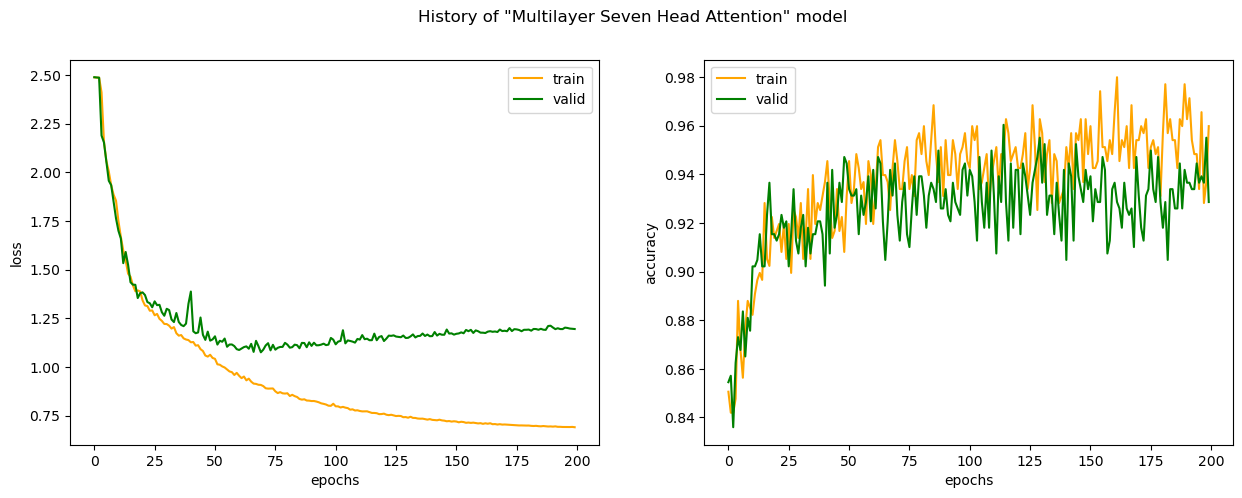

In [38]:
history_plot(losses_seven_head_Attention_multilayer, 
             accuracies_seven_head_Attention_multilayer, 
             'Multilayer Seven Head Attention')

<h3 style="text-align: left;"><b>4.2 Предсказание для отдельного экземпляра из тестовой выборки:</b></h3>

In [39]:
def predict(model, image_example) -> float:
    # Переводим модель в режим для оценки предсказаний
    model.eval()
    # Без расчёта производных.
    with torch.no_grad():
        # Передадим данные в модель, посчитаем логиты предсказаний для всех классов.
        logits, attention = model(torch.from_numpy(image_example).reshape(-1, 90, 189).to(torch.float32).to(device))

        # Индексы предсказаных классов (от 0 до 11).
        idx = logits.argmax(dim=1)
        # Создаем нулевой тензор той же формы, что и logits.
        binary_logits = torch.zeros_like(logits, dtype=torch.int64).to(device)
        # По индексу на место предсказаного класса ставив '1' в нулевой тензор.
        for i, bl in enumerate(binary_logits):
            bl[idx[i]] = 1

    # Вернём предсказания и матрицы attention со всех слоёв.
    return binary_logits, attention

In [40]:
# Изображение, которое будем классифицировать.
image_example = Radar_test.reshape(-1, 1, 90, 189)[777]
# Правильный ответ.
label_example = Labels_test[777]
print(f'Правильный ответ: {label_example}')

Правильный ответ: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


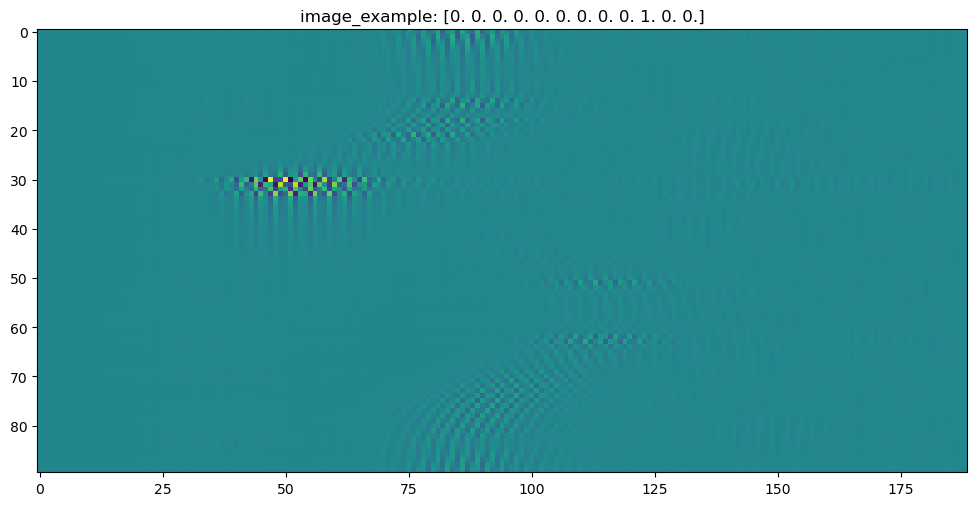

In [41]:
# Изображение, которое будем классифицировать.
imshow(image_example, 0, f'image_example: {label_example}')

In [42]:
prediction_one_head_singlelayer, attention_one_head_singlelayer = predict(model_one_head_Attention_singlelayer, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ One Head Singlelayer: {prediction_one_head_singlelayer}')

Правильный ответ: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Ответ One Head Singlelayer: tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0')


In [43]:
prediction_seven_head_singlelayer, attention_seven_head_singlelayer = predict(model_seven_head_Attention_singlelayer, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ Seven Head Singlelayer: {prediction_seven_head_singlelayer}')

Правильный ответ: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Ответ Seven Head Singlelayer: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], device='cuda:0')


In [44]:
prediction_one_head_multilayer, attention_one_head_multilayer = predict(model_one_head_Attention_multilayer, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ One Head Multilayer: {prediction_one_head_multilayer}')

Правильный ответ: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Ответ One Head Multilayer: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], device='cuda:0')


In [46]:
prediction_seven_head_multilayer, attention_seven_head_multilayer = predict(model_seven_head_Attention_multilayer, image_example)
print(f'Правильный ответ: {label_example}')
print(f'Ответ Seven Head Multilayer: {prediction_seven_head_multilayer}')

Правильный ответ: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Ответ Seven Head Multilayer: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], device='cuda:0')


<h3 style="text-align: left;"><b>4.3 Отрисуем карты внимания:</b></h3>

In [177]:
def draw_attention_maps(attention_maps):
    layers_num = len(attention_maps)
    maps_num = attention_maps[0].reshape(-1, 90, 90).shape[0]

    for layer in range(layers_num):
        for maps in range(maps_num):
            n = (layer+1)*(maps+1)

            attention = attention_maps[layer].reshape(-1, 90, 90)

            fig, ax = plt.subplots(1, 1, figsize=(9, 9))

            im = ax.imshow(attention[maps].cpu().detach().numpy(), cmap='coolwarm')
            ax.set_title(f'Layer: {layer+1} Head: {maps+1}')

            ax.set_xticks(range(90))  # Устанавливаем числовые индексы
            ax.set_yticks(range(90))  
            
            plt.tight_layout()
            plt.show() 

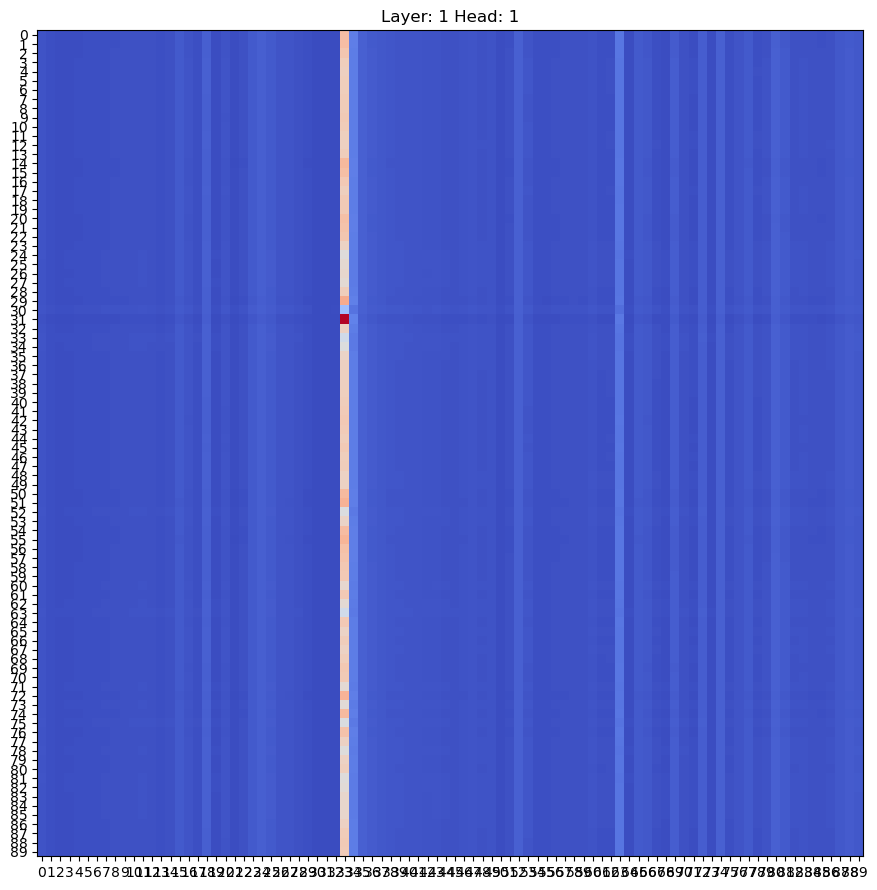

In [178]:
draw_attention_maps(attention_one_head_singlelayer)

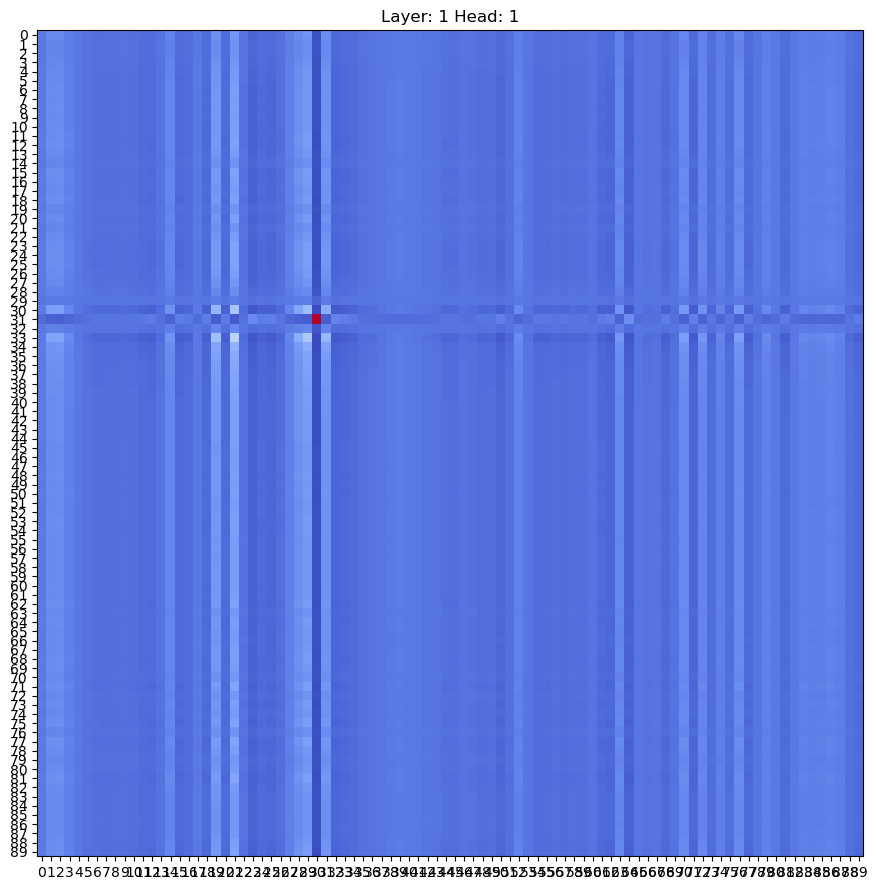

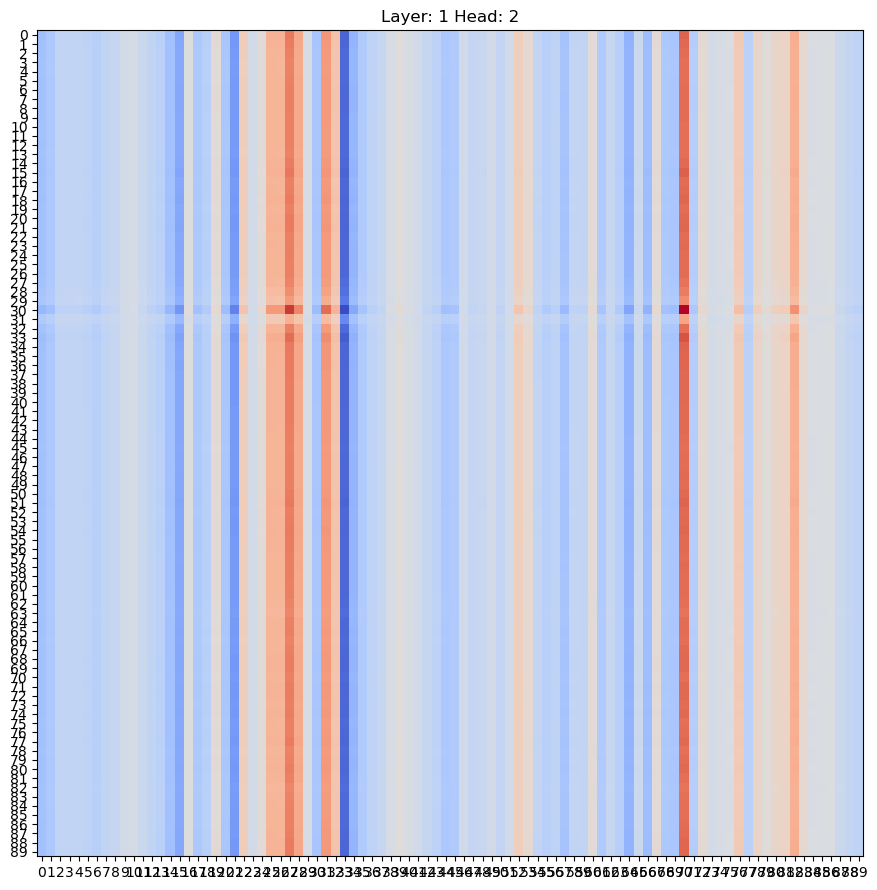

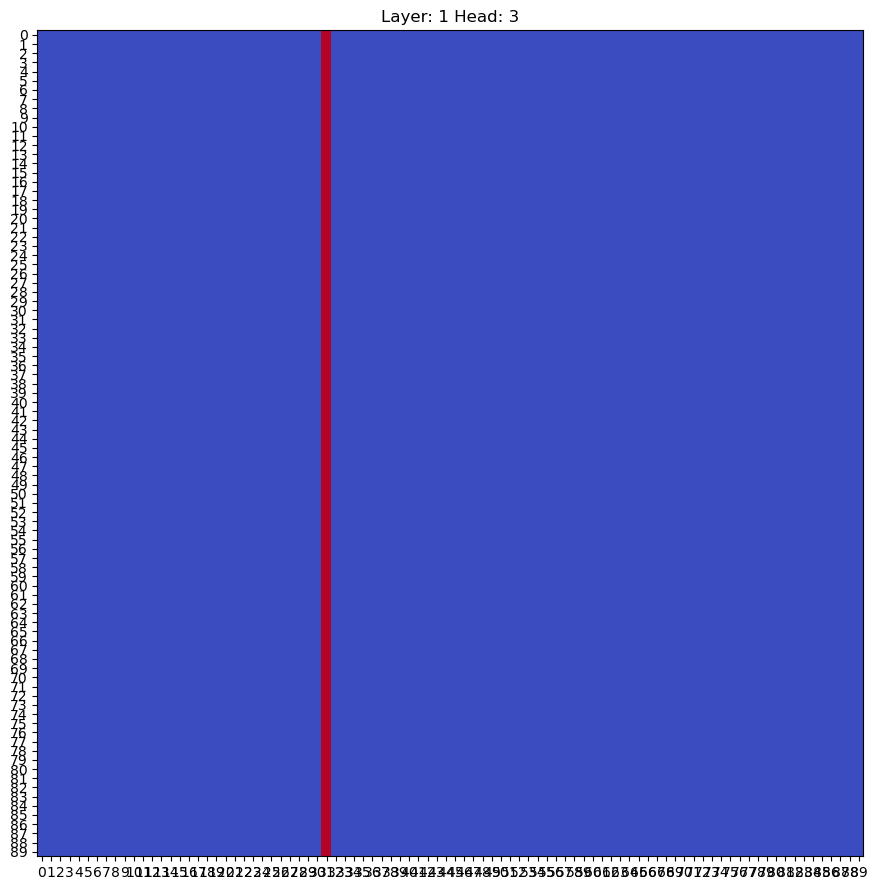

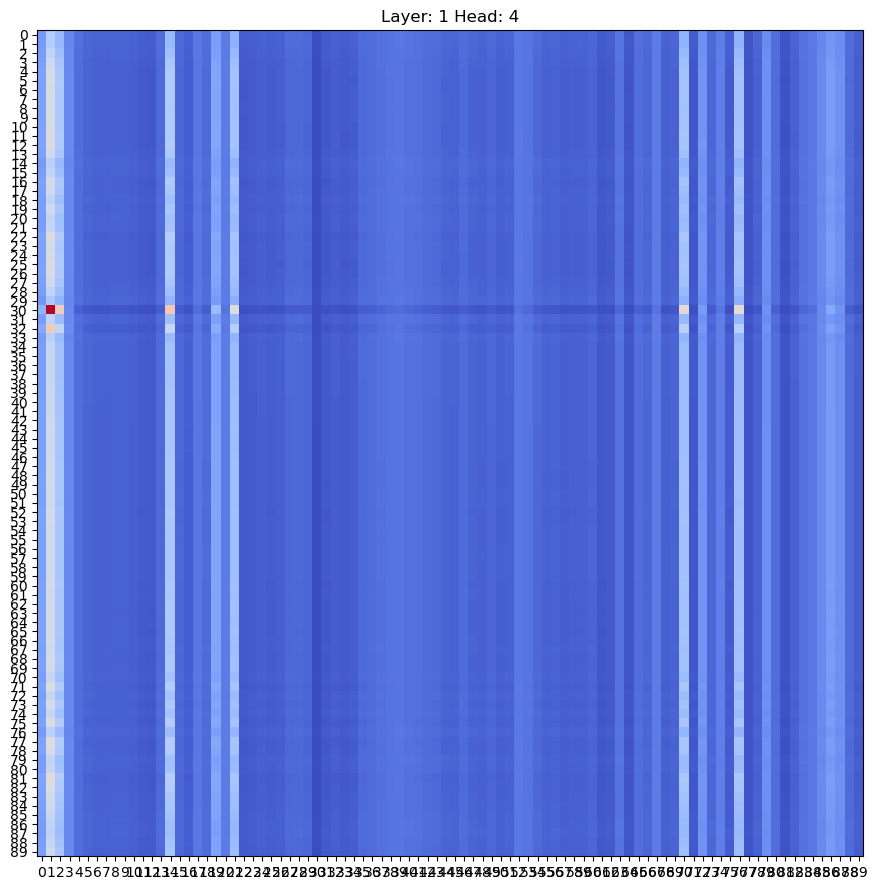

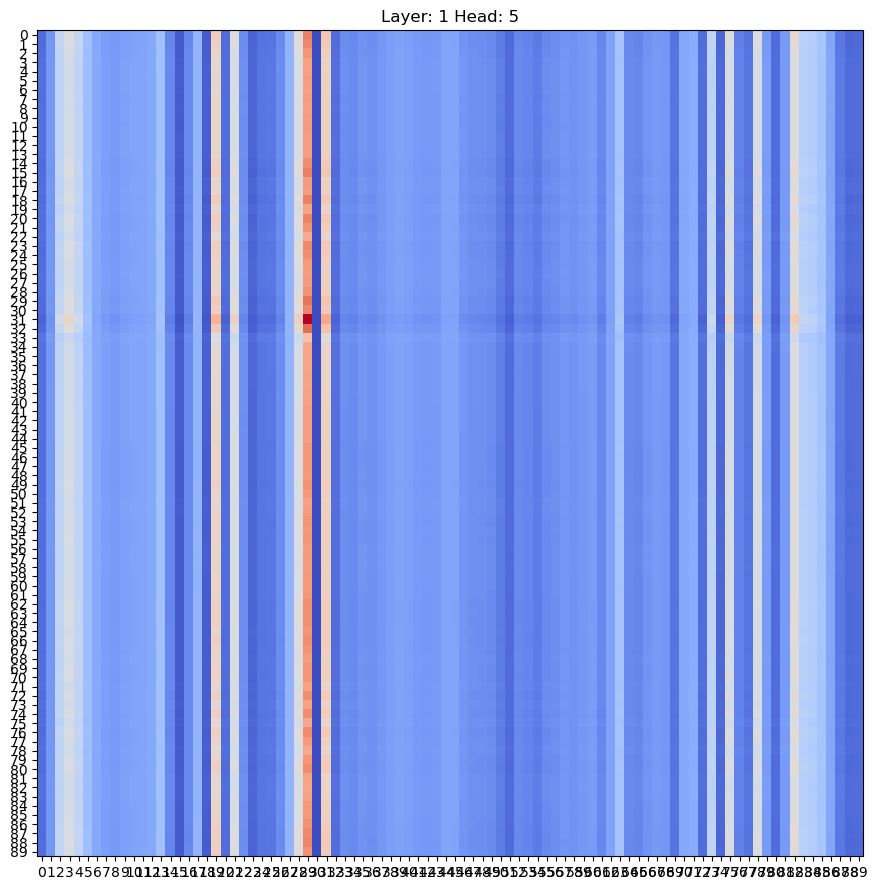

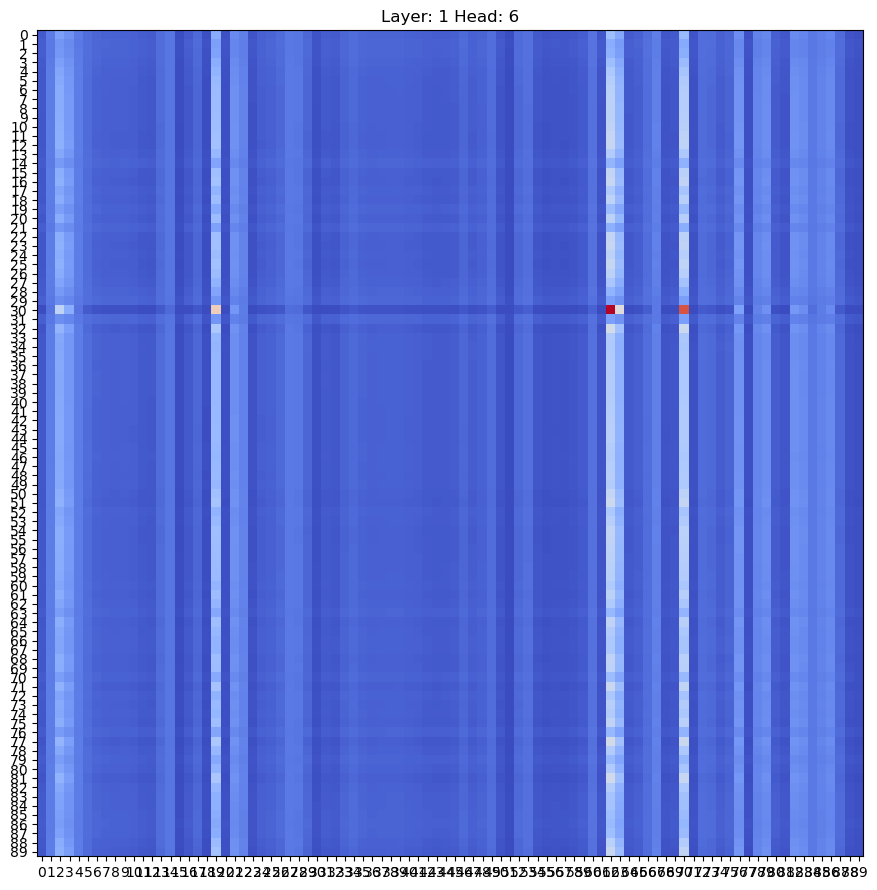

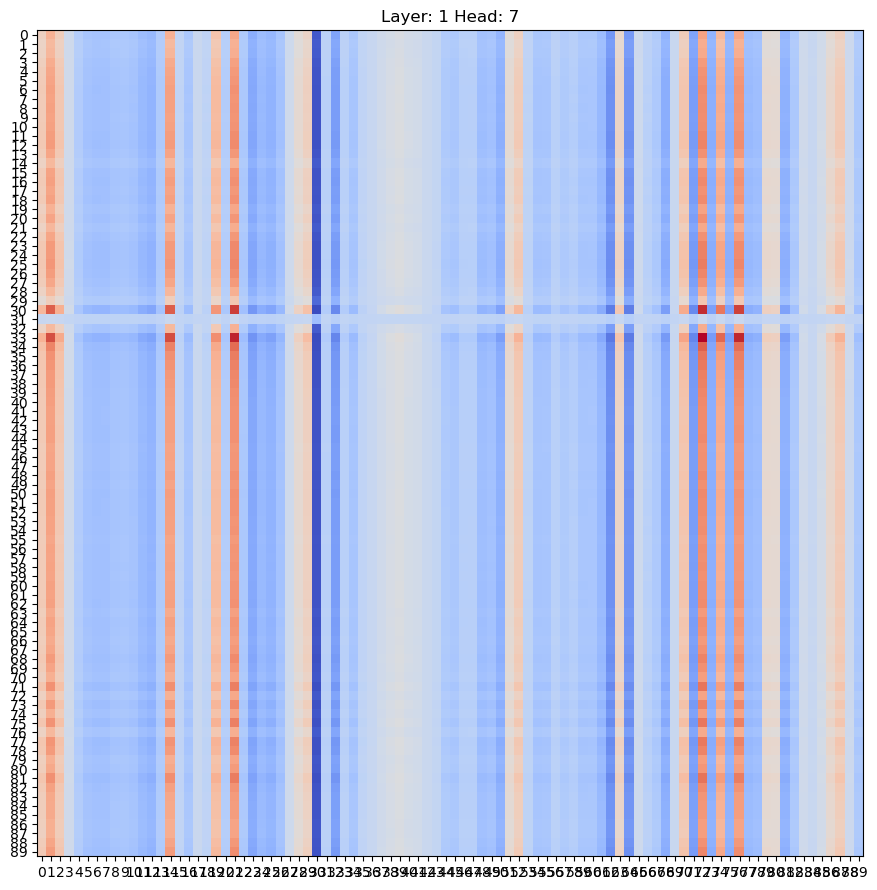

In [179]:
draw_attention_maps(attention_seven_head_singlelayer)

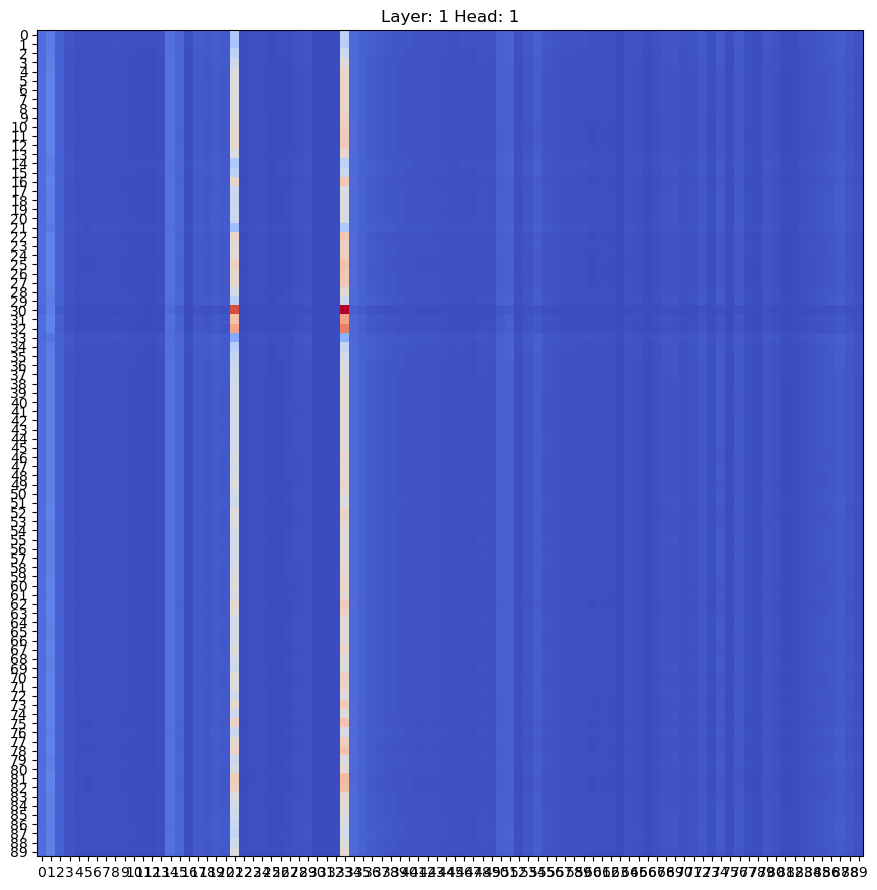

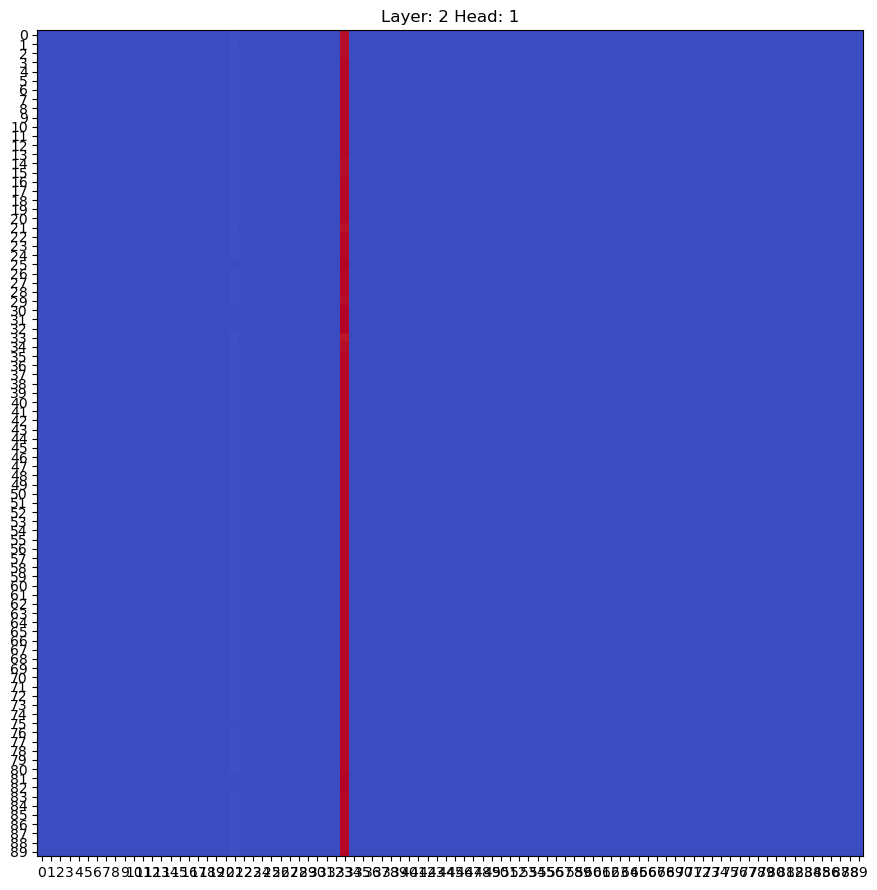

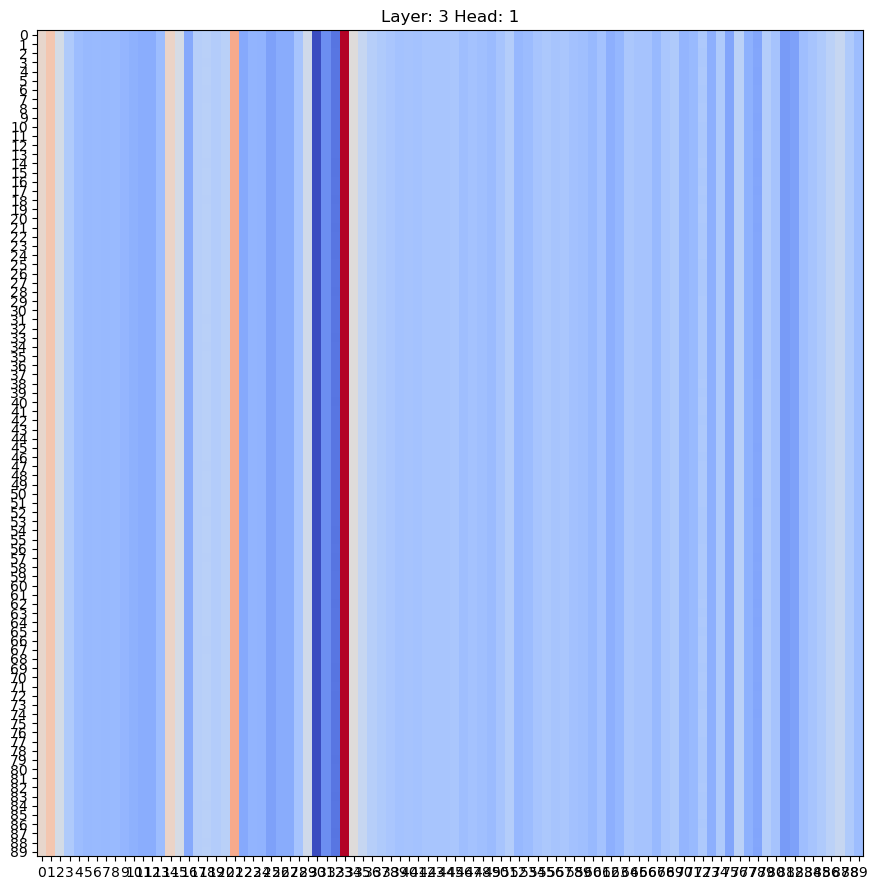

In [180]:
draw_attention_maps(attention_one_head_multilayer)

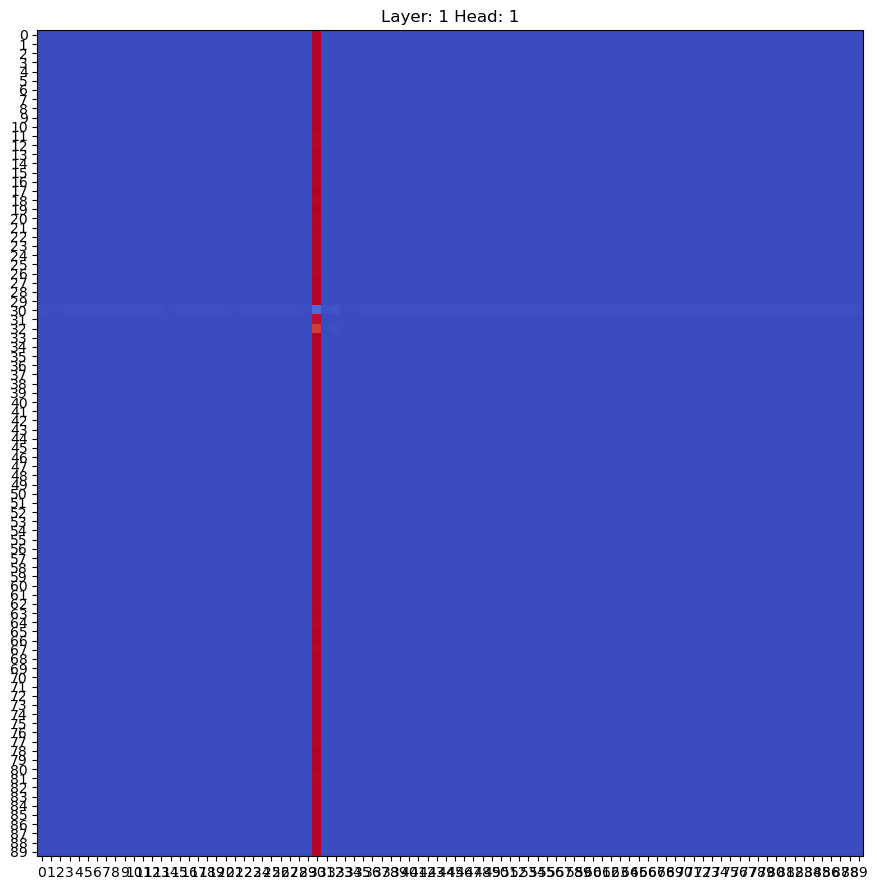

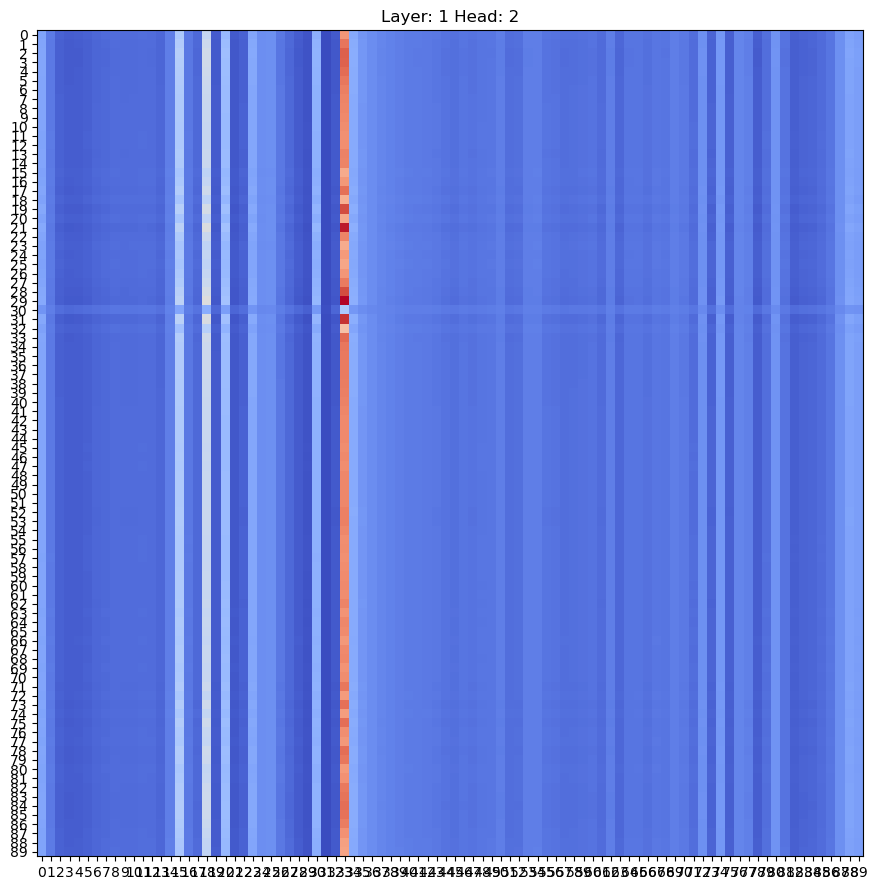

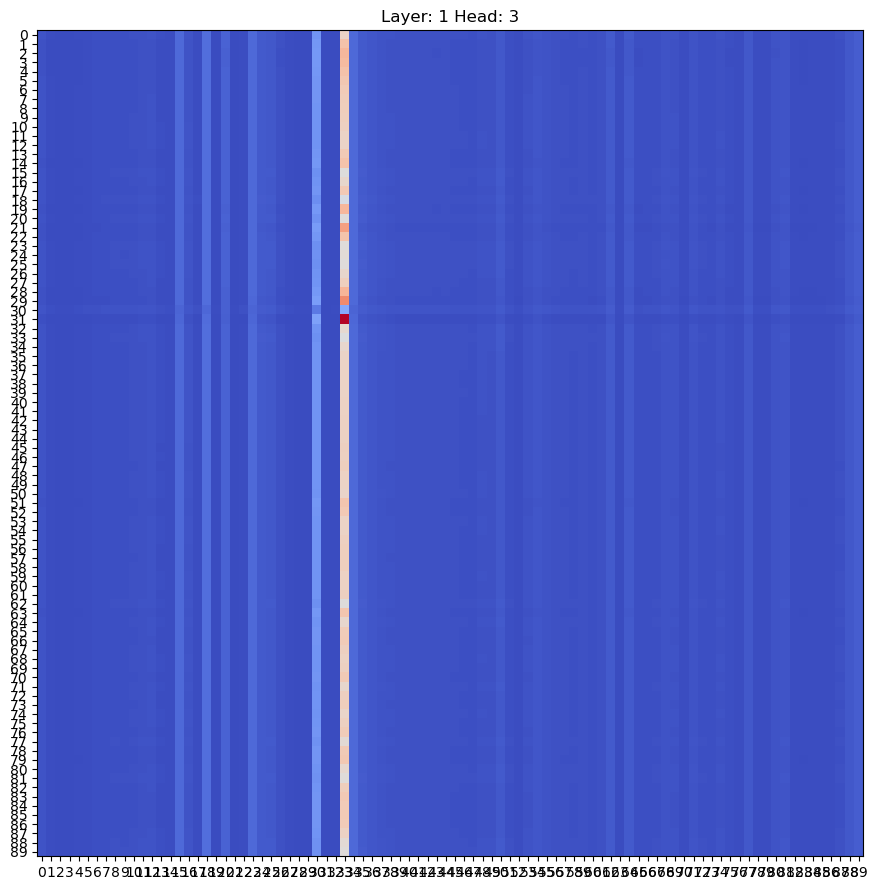

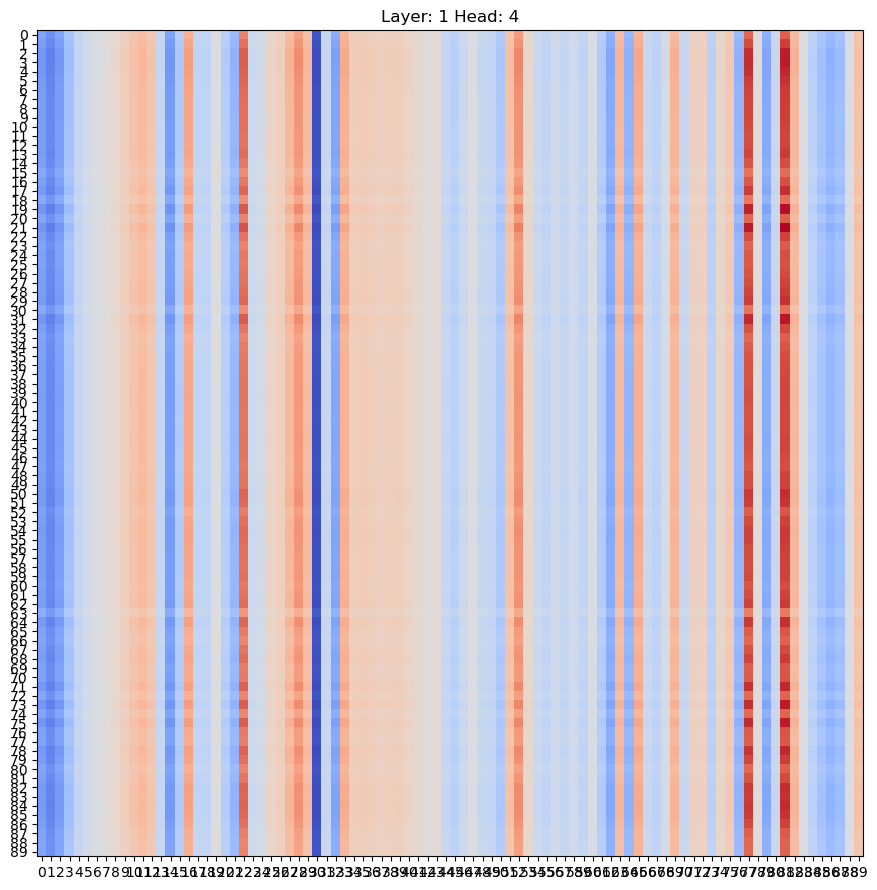

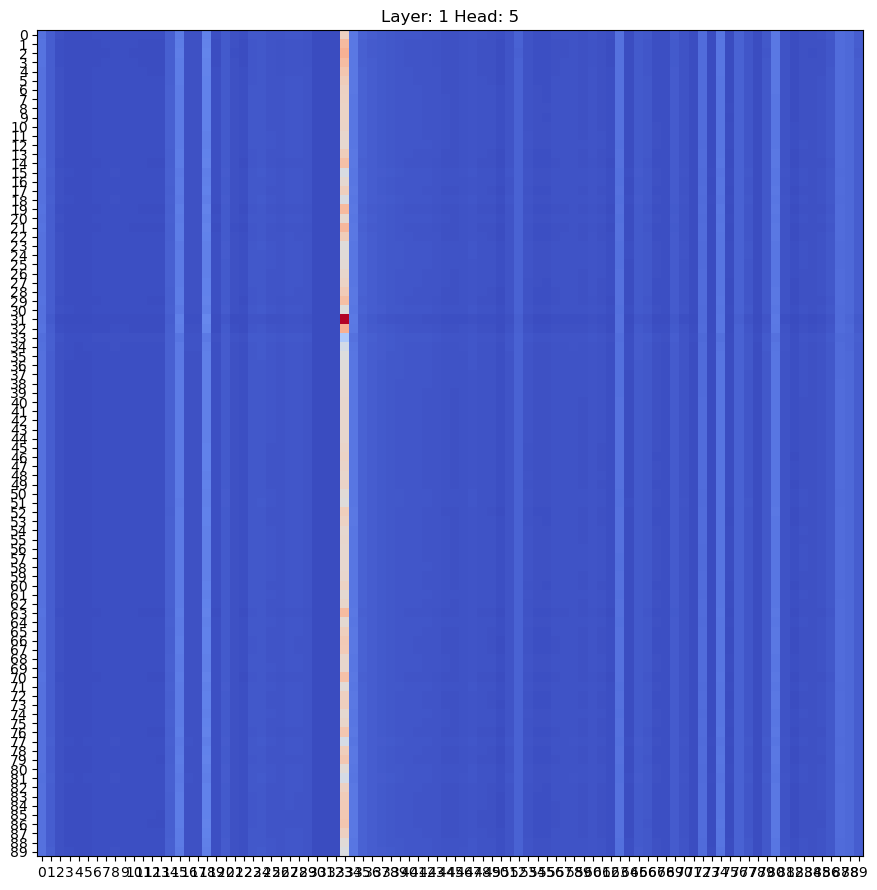

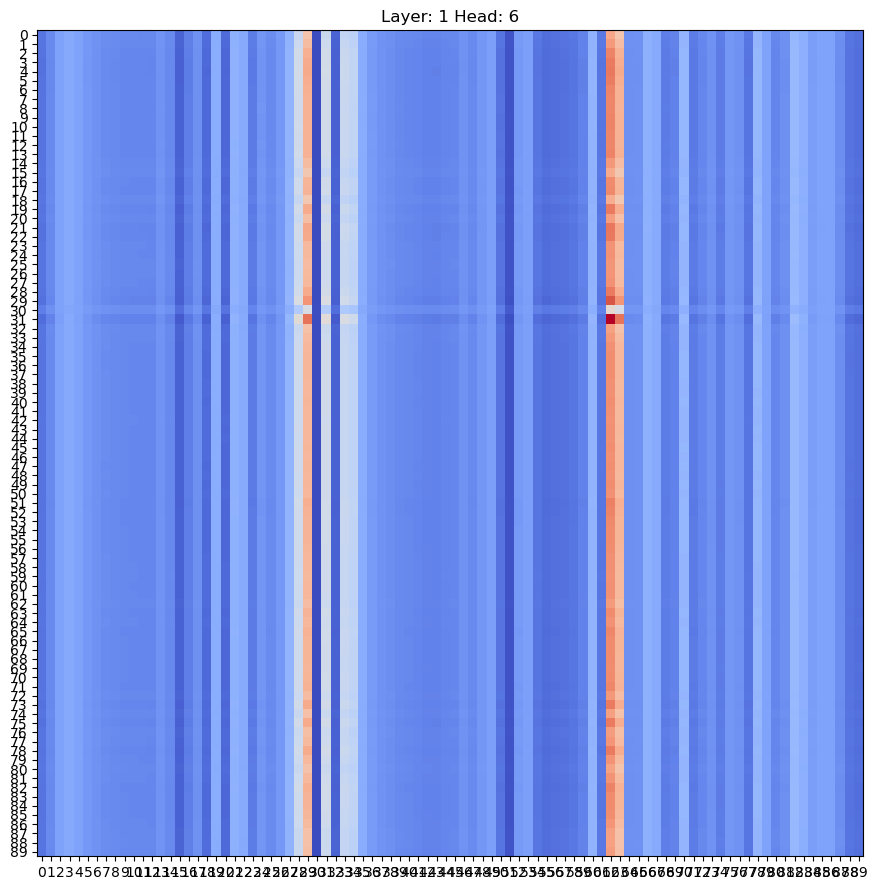

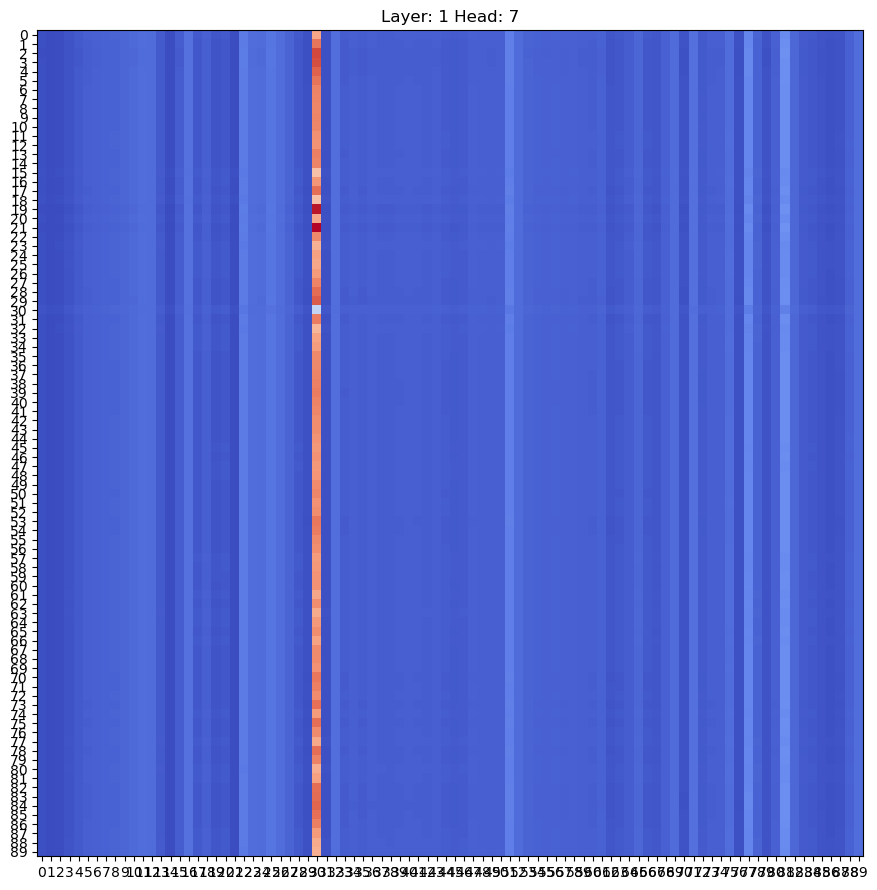

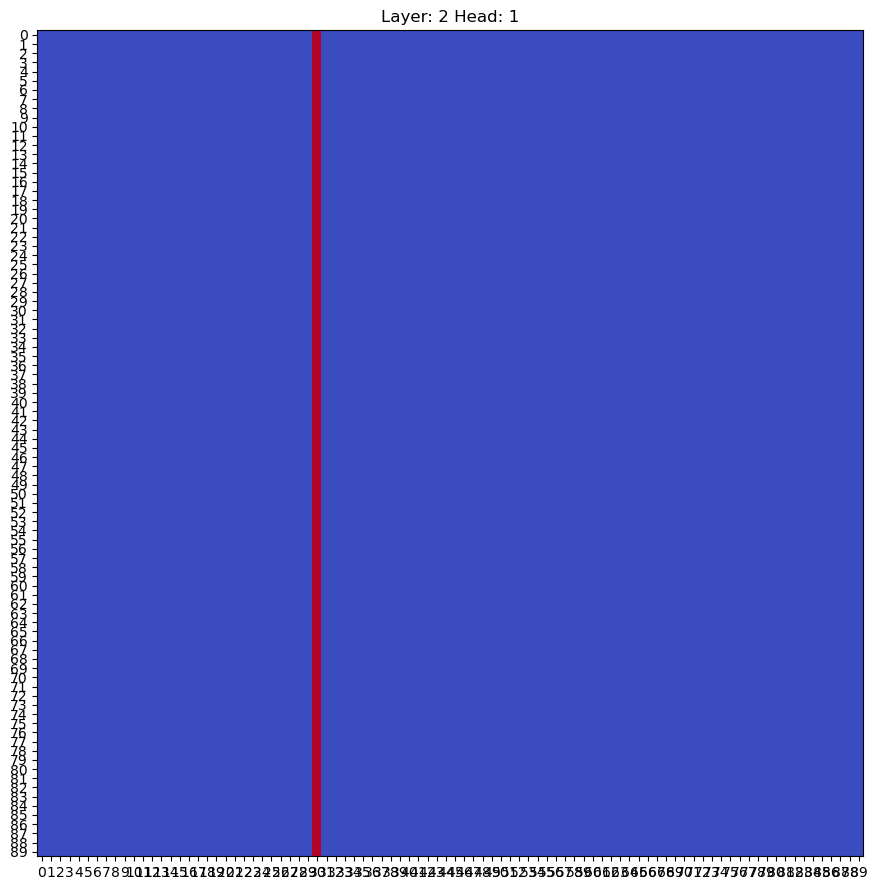

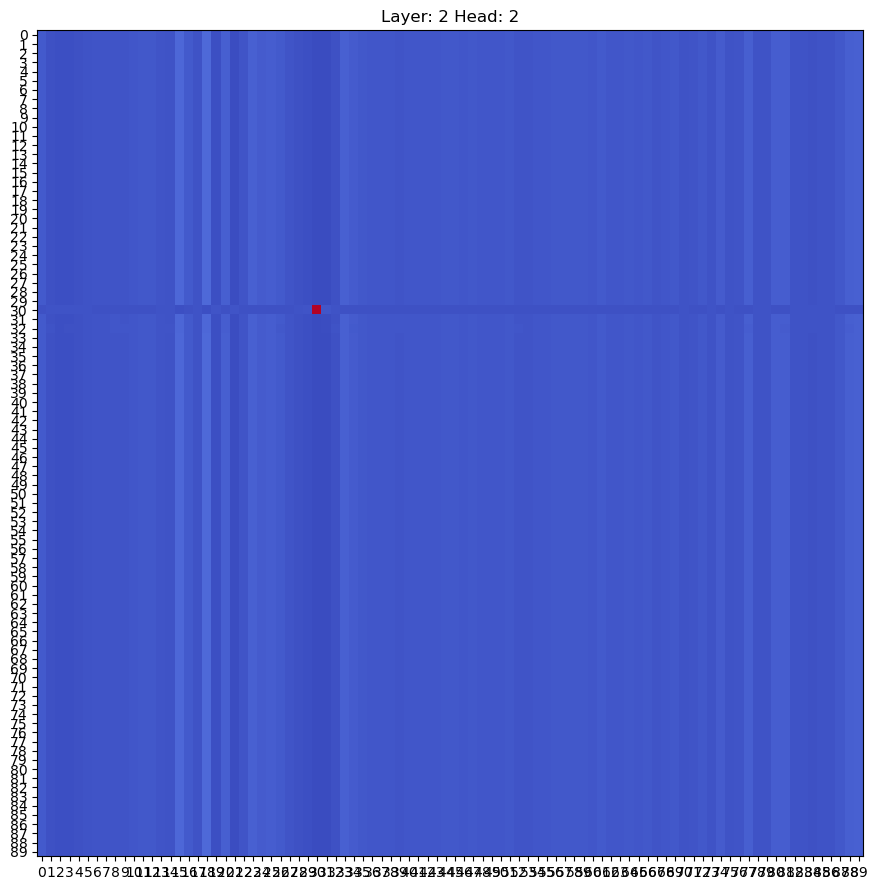

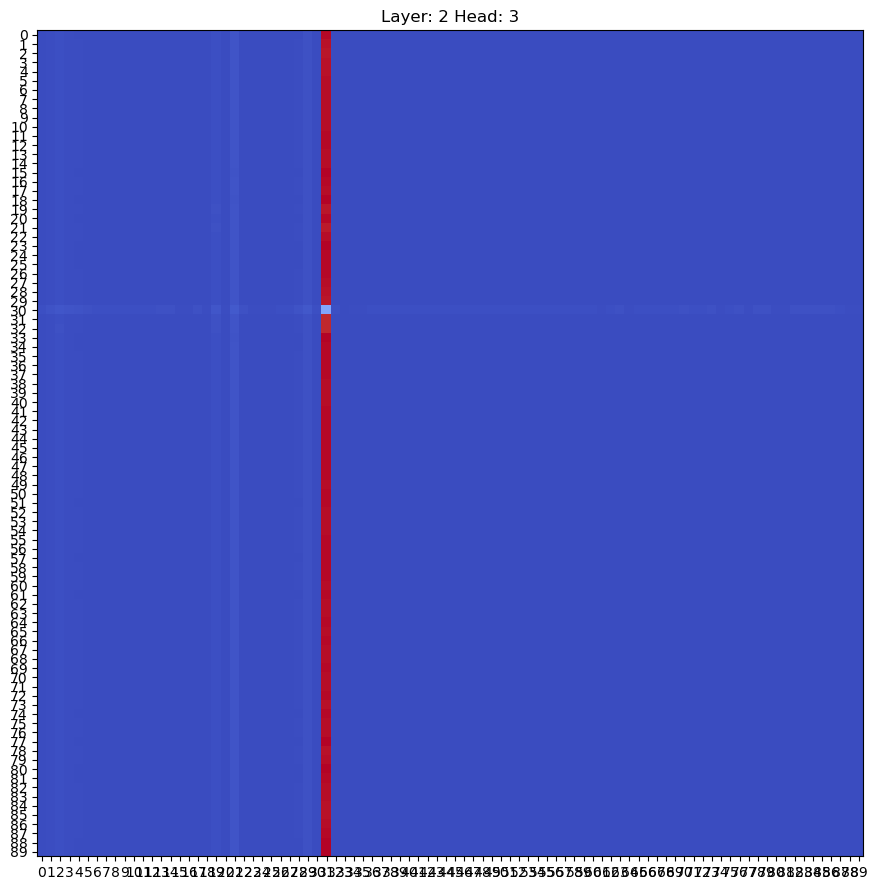

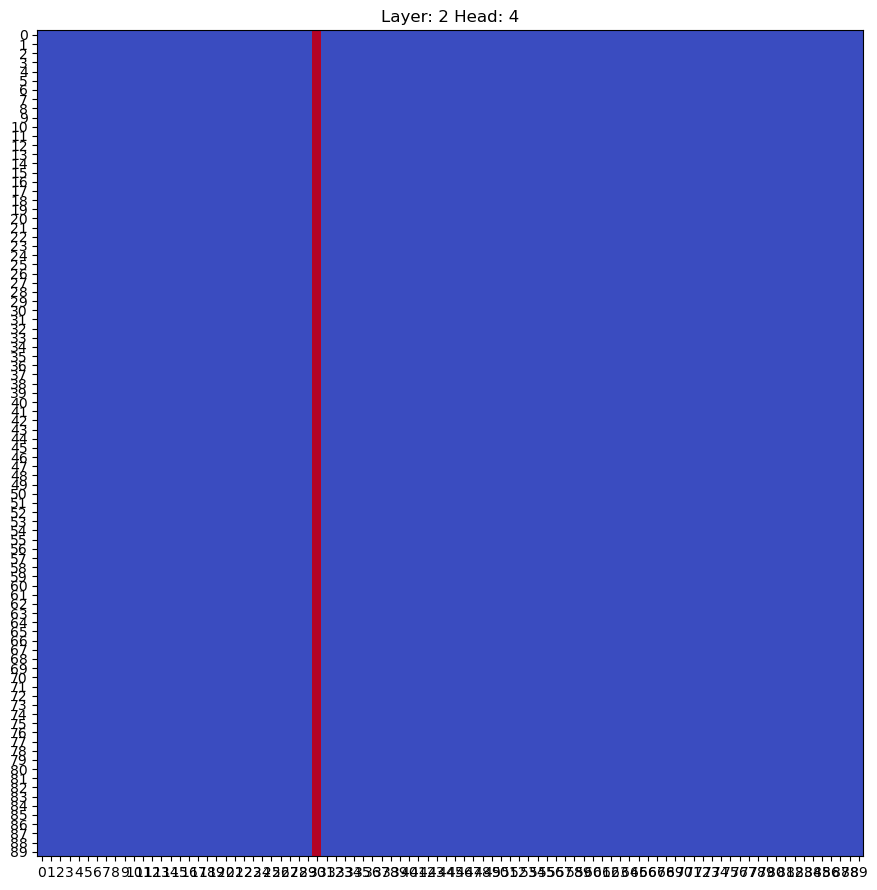

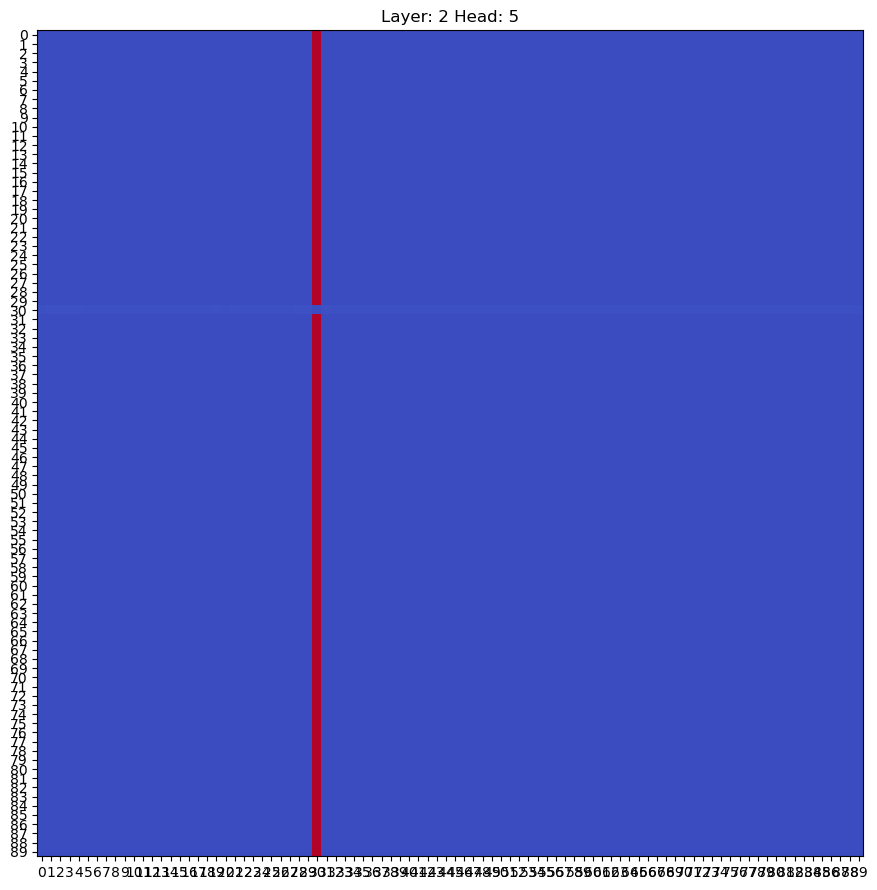

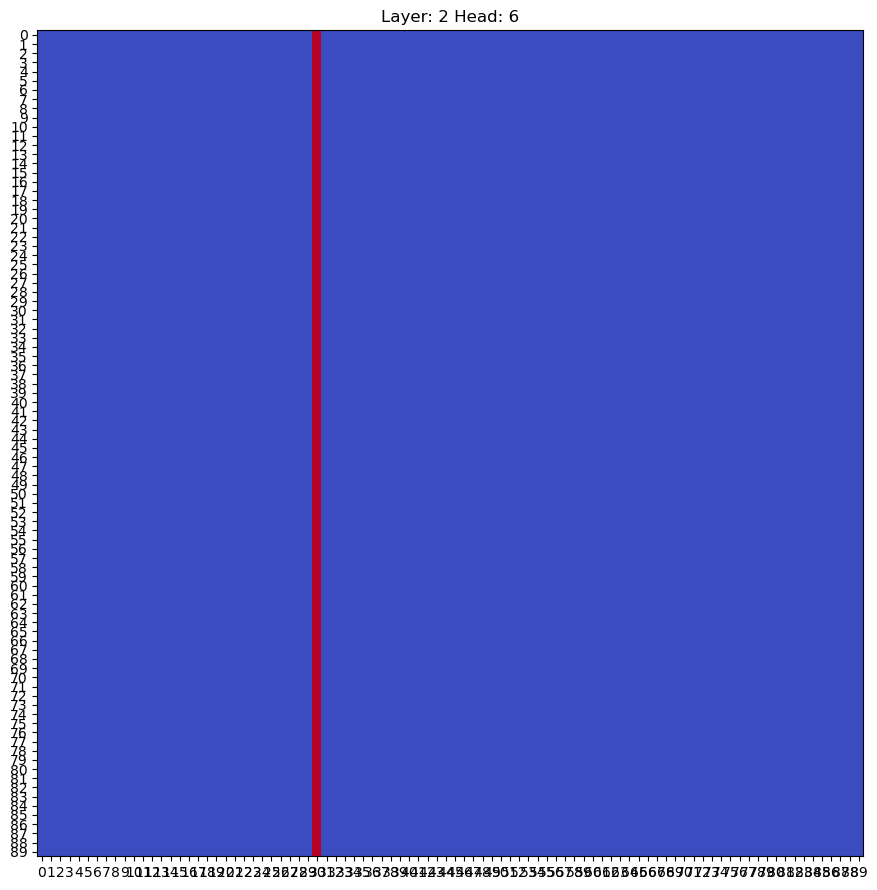

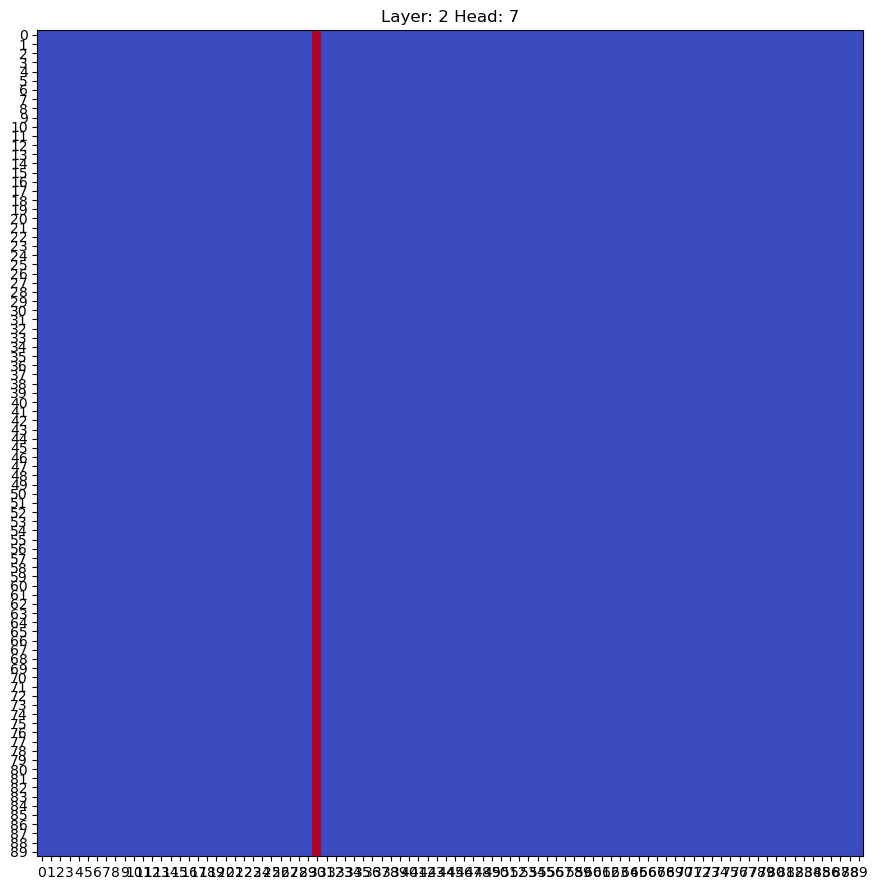

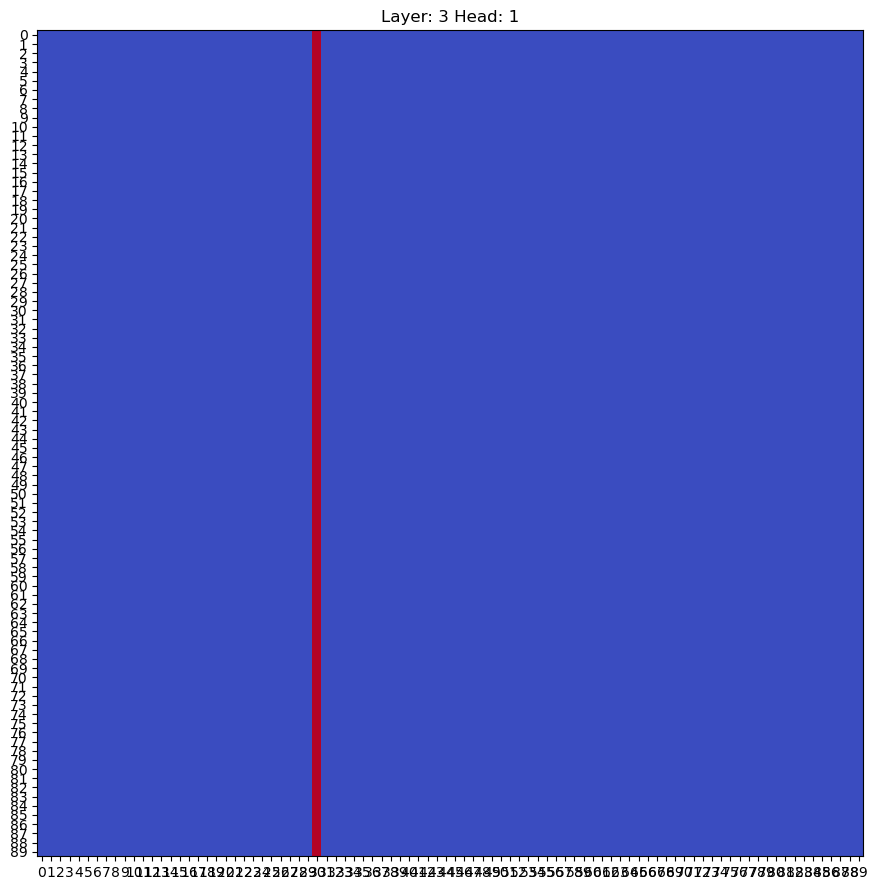

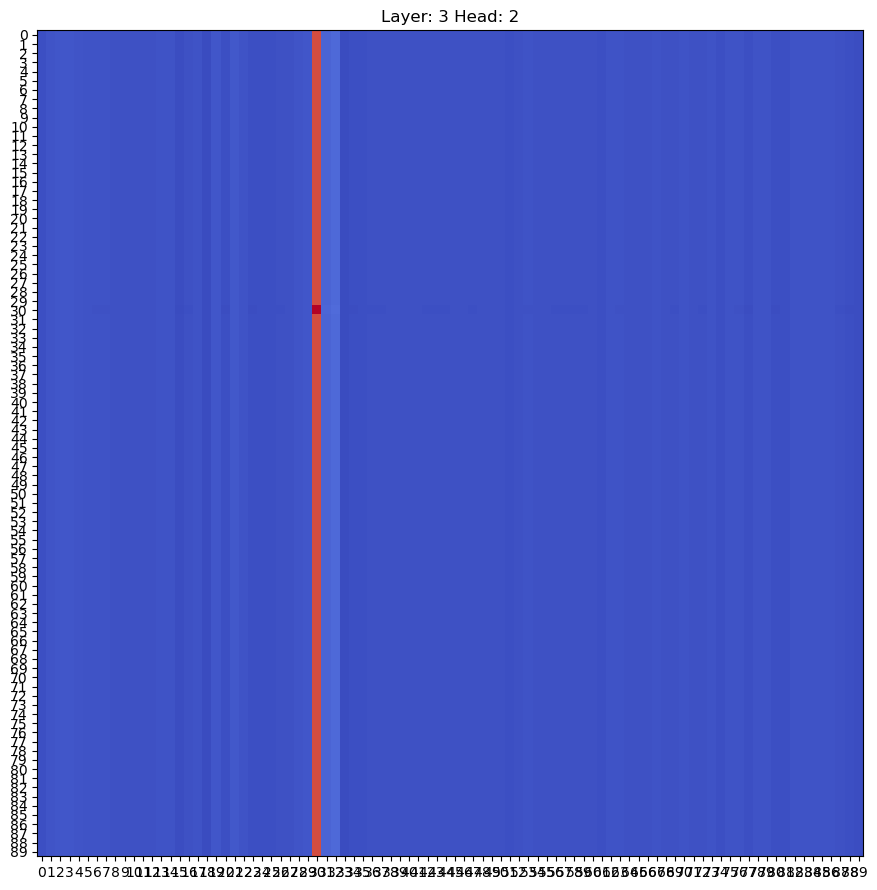

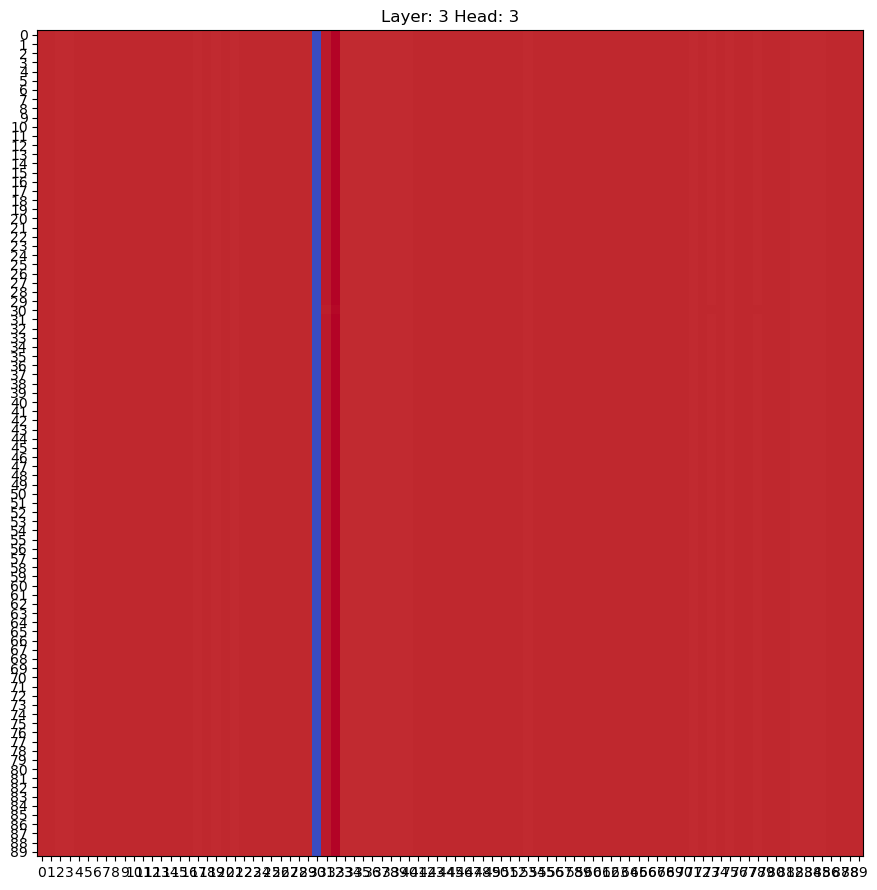

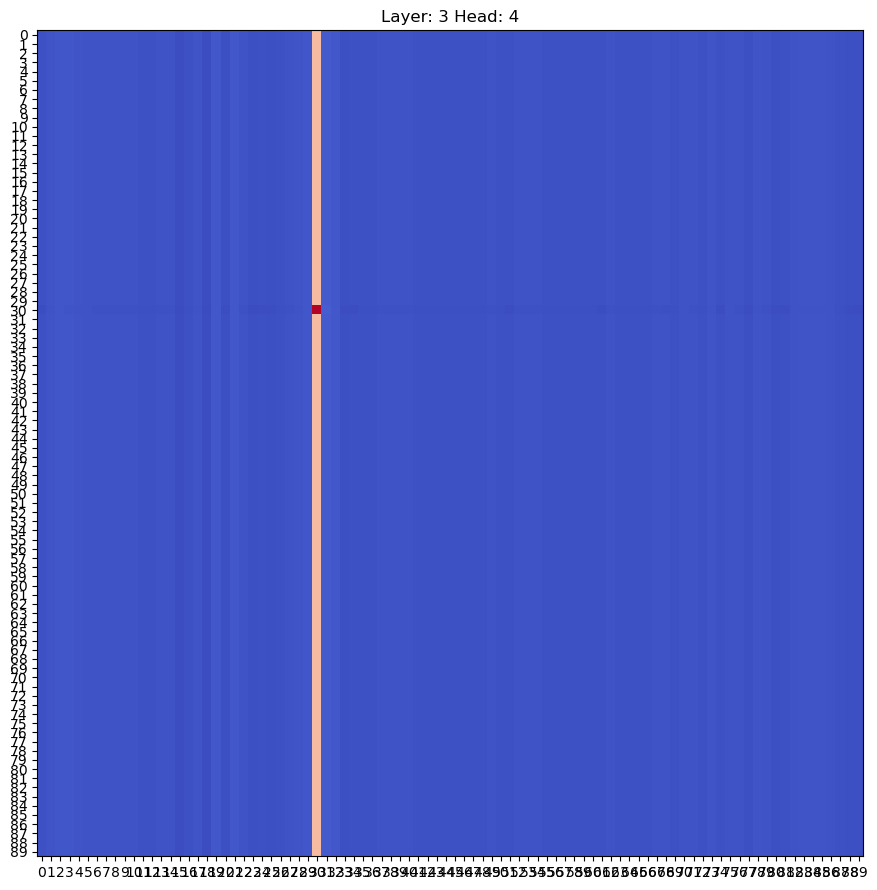

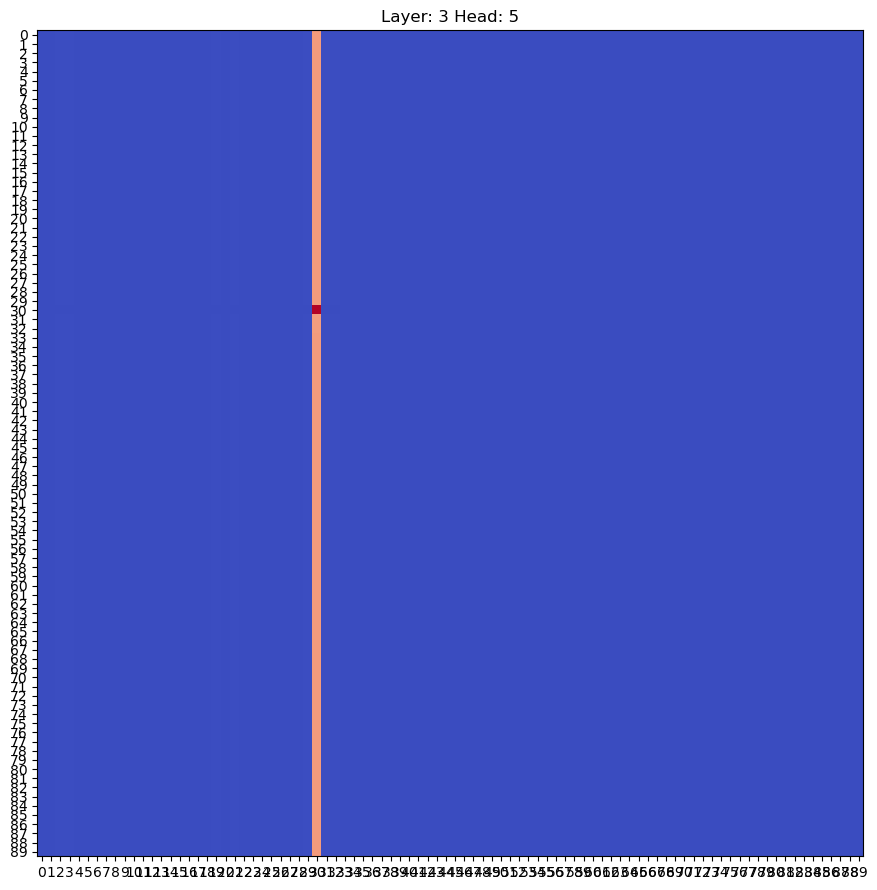

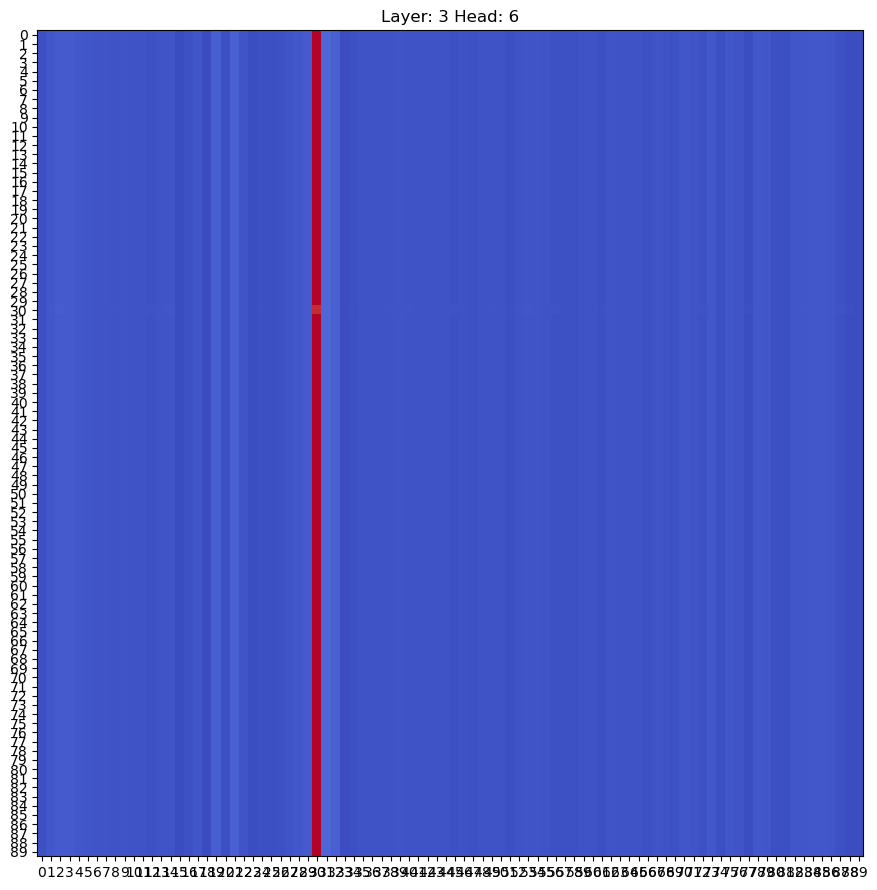

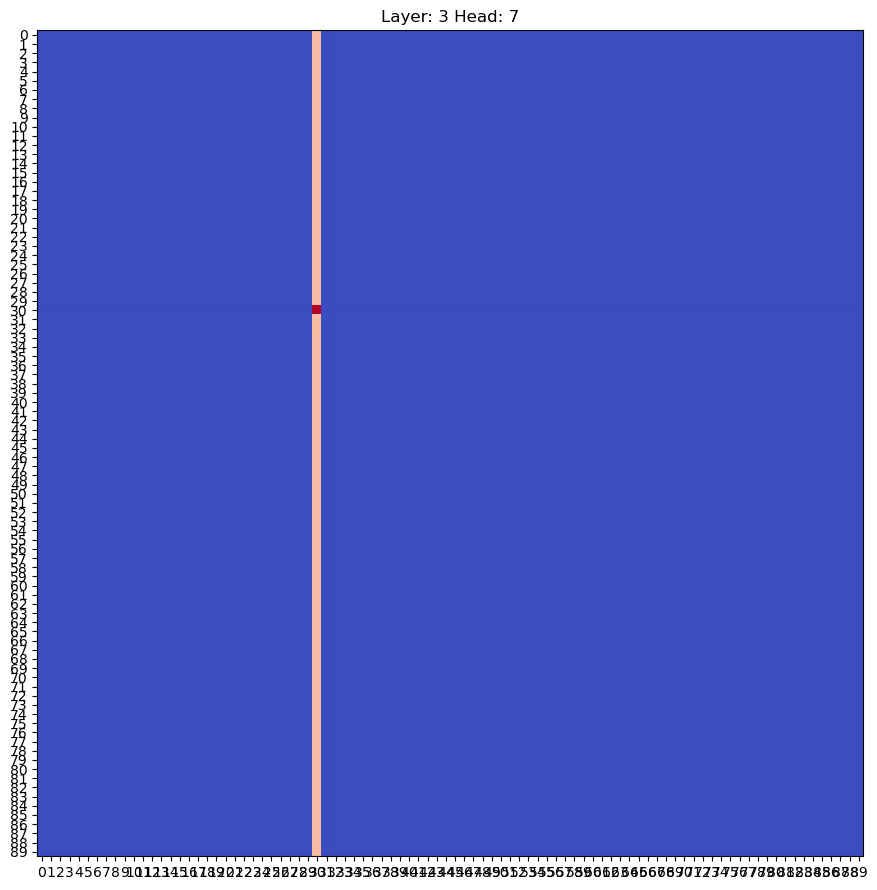

In [181]:
draw_attention_maps(attention_seven_head_multilayer)